In [14]:
TEST = False

## Experiments for NeurIPS

In [15]:
from human_aware_rl.utils import set_style
from human_aware_rl.experiments.bc_experiments import *
from human_aware_rl.experiments.pbt_experiments import *
from human_aware_rl.experiments.ppo_bc_experiments import *
from human_aware_rl.experiments.ppo_sp_experiments import *

In [16]:
best_bc_model_paths = load_pickle("data/bc_runs/best_bc_model_paths")
best_bc_models_performance = load_pickle("data/bc_runs/best_bc_models_performance")

In [17]:
set_style()

# Behavior Cloning

In [18]:
seeds = [9264] if TEST else [5415, 2652, 6440, 1965, 6647]
num_seeds = len(seeds)

params_unident = {"layout_name": "unident_s", "num_epochs": 120, "lr": 1e-3, "adam_eps":1e-8}
params_simple = {"layout_name": "simple", "num_epochs": 100, "lr": 1e-3, "adam_eps":1e-8}
params_random1 = {"layout_name": "random1", "num_epochs": 120, "lr": 1e-3, "adam_eps":1e-8}
params_random0 = {"layout_name": "random0", "num_epochs": 90, "lr": 1e-3, "adam_eps":1e-8}
params_random3 = {"layout_name": "random3", "num_epochs": 110, "lr": 1e-3, "adam_eps":1e-8}
all_params = [params_simple] if TEST else [params_simple, params_random1, params_unident, params_random0, params_random3]

if TEST:
    for p in all_params:
        p['num_epochs'] = 1

### Training

Overfitting tends to give better rewards in the environment.

In [21]:
train_bc_models(all_params, seeds)

Loading data from data/human/clean_train_trials.pkl


FileNotFoundError: [Errno 2] No such file or directory: 'data/human/clean_train_trials.pkl'

### Evaluation

In [4]:
# Evaluate BC models
set_global_seed(64)

num_rounds = 100
bc_models_evaluation = evaluate_all_bc_models(all_params, num_rounds, num_seeds)
save_pickle(bc_models_evaluation, BC_MODELS_EVALUATION_PATH)
print("All BC models evaluation: ", bc_models_evaluation)

NameError: name 'all_params' is not defined

In [9]:
bc_models_evaluation

{'simple': {'train': {0: 100.2, 1: 77.8, 2: 112.0, 3: 106.2, 4: 102.4},
  'test': {0: 116.2, 1: 109.0, 2: 109.2, 3: 99.0, 4: 105.4}},
 'random1': {'train': {0: 67.4, 1: 87.2, 2: 83.2, 3: 79.4, 4: 82.6},
  'test': {0: 78.4, 1: 80.0, 2: 74.8, 3: 79.6, 4: 73.4}},
 'unident_s': {'train': {0: 137.2, 1: 129.0, 2: 115.0, 3: 138.6, 4: 136.4},
  'test': {0: 127.4, 1: 134.4, 2: 130.4, 3: 100.8, 4: 132.4}},
 'random0': {'train': {0: 31.8, 1: 24.0, 2: 25.6, 3: 16.2, 4: 34.4},
  'test': {0: 40.0, 1: 35.8, 2: 42.6, 3: 36.6, 4: 32.8}},
 'random3': {'train': {0: 42.6, 1: 47.0, 2: 43.6, 3: 42.4, 4: 45.8},
  'test': {0: 47.4, 1: 49.2, 2: 46.4, 3: 49.6, 4: 48.0}}}

In [8]:
selected_models = {
    "simple": [2, 0],
    "unident_s": [1, 1],
    "random1": [0, 1],
    "random0": [4, 1],
    "random3": [1, 3]
}

final_bc_model_paths = { "train": {}, "test": {} }
for layout_name, seed_indices in selected_models.items():
    train_idx, test_idx = seed_indices
    final_bc_model_paths["train"][layout_name] = "{}_bc_train_seed{}".format(layout_name, train_idx)
    final_bc_model_paths["test"][layout_name] = "{}_bc_test_seed{}".format(layout_name, test_idx)

In [8]:
set_global_seed(8)
num_rounds = 40
best_bc_models_performance = evaluate_bc_models(final_bc_model_paths, num_rounds)

simple
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.



  0%|          | 0/40 [00:00<?, ?it/s]

Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/simple_am.pkl
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/simple_am.pkl


100%|██████████| 40/40 [00:26<00:00,  1.61it/s]


Avg reward 109.50 (std: 15.48, se: 2.45) over 40 games of avg length 400.0
Loading a model without an environment, this model cannot be trained until it has a valid environment.



  0%|          | 0/40 [00:00<?, ?it/s]

Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/simple_am.pkl
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/simple_am.pkl


100%|██████████| 40/40 [00:25<00:00,  1.61it/s]


Avg reward 115.00 (std: 20.86, se: 3.30) over 40 games of avg length 400.0
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/simple_am.pkl
Loading a model without an environment, this model cannot be trained until it has a valid environment.



  0%|          | 0/40 [00:00<?, ?it/s]

Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/simple_am.pkl


  0%|          | 0/40 [00:00<?, ?it/s]

Avg reward 103.50 (std: 21.40, se: 3.38) over 40 games of avg length 400.0


100%|██████████| 40/40 [00:27<00:00,  1.43it/s]


Avg reward 110.00 (std: 21.45, se: 3.39) over 40 games of avg length 400.0
unident_s
Loading a model without an environment, this model cannot be trained until it has a valid environment.



  0%|          | 0/40 [00:00<?, ?it/s]

Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/unident_s_am.pkl
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/unident_s_am.pkl


100%|██████████| 40/40 [00:29<00:00,  1.38it/s]


Avg reward 136.00 (std: 33.53, se: 5.30) over 40 games of avg length 400.0
Loading a model without an environment, this model cannot be trained until it has a valid environment.



  0%|          | 0/40 [00:00<?, ?it/s]

Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/unident_s_am.pkl
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/unident_s_am.pkl


100%|██████████| 40/40 [00:28<00:00,  1.44it/s]


Avg reward 140.50 (std: 47.43, se: 7.50) over 40 games of avg length 400.0
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/unident_s_am.pkl
Loading a model without an environment, this model cannot be trained until it has a valid environment.



  0%|          | 0/40 [00:00<?, ?it/s]

Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/unident_s_am.pkl


  0%|          | 0/40 [00:00<?, ?it/s]

Avg reward 136.50 (std: 44.25, se: 7.00) over 40 games of avg length 400.0


100%|██████████| 40/40 [00:28<00:00,  1.42it/s]


Avg reward 137.50 (std: 53.14, se: 8.40) over 40 games of avg length 400.0
random1
Loading a model without an environment, this model cannot be trained until it has a valid environment.



  0%|          | 0/40 [00:00<?, ?it/s]

Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random1_am.pkl
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random1_am.pkl


100%|██████████| 40/40 [00:26<00:00,  1.53it/s]


Avg reward 67.00 (std: 32.42, se: 5.13) over 40 games of avg length 400.0
Loading a model without an environment, this model cannot be trained until it has a valid environment.



  0%|          | 0/40 [00:00<?, ?it/s]

Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random1_am.pkl
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random1_am.pkl


100%|██████████| 40/40 [00:26<00:00,  1.52it/s]


Avg reward 67.00 (std: 29.85, se: 4.72) over 40 games of avg length 400.0
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random1_am.pkl
Loading a model without an environment, this model cannot be trained until it has a valid environment.



  0%|          | 0/40 [00:00<?, ?it/s]

Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random1_am.pkl


  0%|          | 0/40 [00:00<?, ?it/s]

Avg reward 59.00 (std: 34.04, se: 5.38) over 40 games of avg length 400.0


100%|██████████| 40/40 [00:27<00:00,  1.47it/s]


Avg reward 70.00 (std: 25.30, se: 4.00) over 40 games of avg length 400.0
random0
Loading a model without an environment, this model cannot be trained until it has a valid environment.



  0%|          | 0/40 [00:00<?, ?it/s]

Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random0_am.pkl
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random0_am.pkl


100%|██████████| 40/40 [00:29<00:00,  1.14it/s]


Avg reward 25.50 (std: 27.56, se: 4.36) over 40 games of avg length 400.0
Loading a model without an environment, this model cannot be trained until it has a valid environment.



  0%|          | 0/40 [00:00<?, ?it/s]

Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random0_am.pkl
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random0_am.pkl


100%|██████████| 40/40 [00:29<00:00,  1.38it/s]


Avg reward 30.00 (std: 27.20, se: 4.30) over 40 games of avg length 400.0
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random0_am.pkl
Loading a model without an environment, this model cannot be trained until it has a valid environment.



  0%|          | 0/40 [00:00<?, ?it/s]

Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random0_am.pkl


  0%|          | 0/40 [00:00<?, ?it/s]

Avg reward 20.50 (std: 27.38, se: 4.33) over 40 games of avg length 400.0


100%|██████████| 40/40 [00:26<00:00,  1.58it/s]


Avg reward 31.00 (std: 31.61, se: 5.00) over 40 games of avg length 400.0
random3
Loading a model without an environment, this model cannot be trained until it has a valid environment.



  0%|          | 0/40 [00:00<?, ?it/s]

Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random3_am.pkl
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random3_am.pkl


100%|██████████| 40/40 [00:26<00:00,  1.47it/s]


Avg reward 48.00 (std: 20.40, se: 3.22) over 40 games of avg length 400.0
Loading a model without an environment, this model cannot be trained until it has a valid environment.



  0%|          | 0/40 [00:00<?, ?it/s]

Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random3_am.pkl
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random3_am.pkl


100%|██████████| 40/40 [00:29<00:00,  1.36it/s]


Avg reward 47.50 (std: 13.18, se: 2.08) over 40 games of avg length 400.0
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random3_am.pkl
Loading a model without an environment, this model cannot be trained until it has a valid environment.



  0%|          | 0/40 [00:00<?, ?it/s]

Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random3_am.pkl


  0%|          | 0/40 [00:00<?, ?it/s]

Avg reward 38.00 (std: 25.22, se: 3.99) over 40 games of avg length 400.0


100%|██████████| 40/40 [00:28<00:00,  1.53it/s]

Avg reward 44.00 (std: 19.08, se: 3.02) over 40 games of avg length 400.0


In [10]:
save_pickle(best_bc_models_performance, BC_SAVE_DIR + "best_bc_models_performance")

In [9]:
best_bc_models_performance

{'simple': {'BC_train+BC_train': (109.5, 2.448213634469018),
  'BC_test+BC_test': (115.0, 3.2977264895682294),
  'BC_train+BC_test_0': (103.5, 3.382861215007201),
  'BC_train+BC_test_1': (110.0, 3.3911649915626336)},
 'unident_s': {'BC_train+BC_train': (136.0, 5.300943312279428),
  'BC_test+BC_test': (140.5, 7.499583321758616),
  'BC_train+BC_test_0': (136.5, 6.9959809891108184),
  'BC_train+BC_test_1': (137.5, 8.40200868840303)},
 'random1': {'BC_train+BC_train': (67.0, 5.12591455254572),
  'BC_test+BC_test': (67.0, 4.719639816765682),
  'BC_train+BC_test_0': (59.0, 5.382843114934708),
  'BC_train+BC_test_1': (70.0, 4.0)},
 'random0': {'BC_train+BC_train': (25.5, 4.358181960405049),
  'BC_test+BC_test': (30.0, 4.301162633521313),
  'BC_train+BC_test_0': (20.5, 4.329405270935028),
  'BC_train+BC_test_1': (31.0, 4.997499374687304)},
 'random3': {'BC_train+BC_train': (48.0, 3.2249030993194197),
  'BC_test+BC_test': (47.5, 2.084166500066633),
  'BC_train+BC_test_0': (38.0, 3.9874804074753

# PBT

## PBT Plotting

In [5]:
layouts = ["simple", "unident_s", "random1", "random0", "random3"]

pbt_model_paths = {
    "simple": "pbt_simple",
    "unident_s": "pbt_unident_s",
    "random1": "pbt_random1",
    "random3": "pbt_random3",
    "random0": "pbt_random0"
}

/Users/micah/miniconda3/envs/hrc/lib/python3.7/site-packages/seaborn-0.9.0-py3.7.egg/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/Users/micah/miniconda3/envs/hrc/lib/python3.7/site-packages/matplotlib-3.0.3-py3.7-macosx-10.7-x86_64.egg/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/micah/miniconda3/envs/hrc/lib/python3.7/site-packages/matplotlib-3.0.3-py3.7-macosx-10.7-x86_64.egg/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


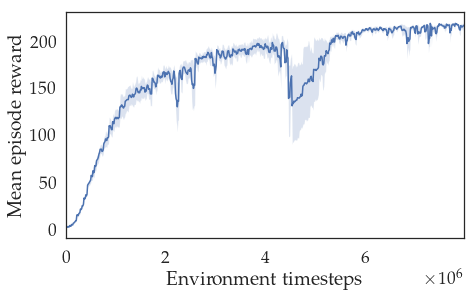

/Users/micah/miniconda3/envs/hrc/lib/python3.7/site-packages/seaborn-0.9.0-py3.7.egg/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


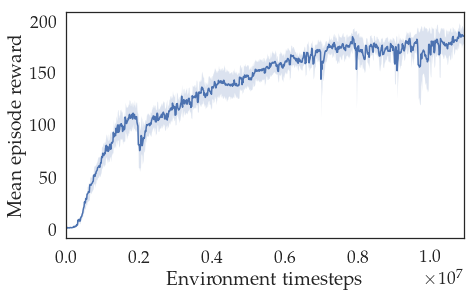

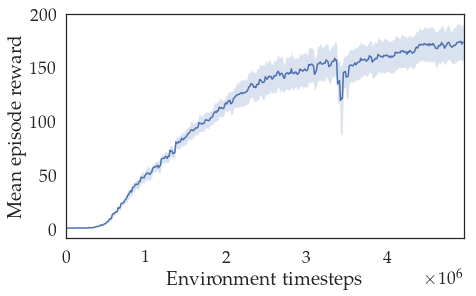

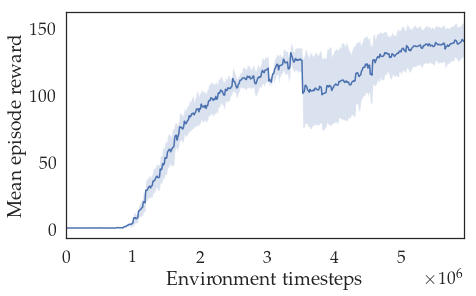

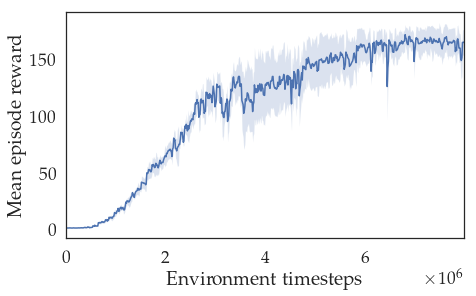

In [6]:
pbt_seeds = [8015, 3554,  581, 5608, 4221]
plot_pbt_runs(pbt_model_paths, pbt_seeds, show=True, single=False)

## Quantitative Eval

In [6]:
set_global_seed(512)
num_rounds = 1
pbt_performance = evaluate_all_pbt_models(pbt_model_paths, best_bc_model_paths, num_rounds, pbt_seeds, best=True)

simple
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/simple_am.pkl
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_simple/seed_8015/agent0/best/variables/variables
INFO:tensorflow:Restoring parameters from d

  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 220.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 100.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 80.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 220.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 120.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 100.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 200.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 120.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 140.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 220.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 40.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 20.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 220.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 80.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


100%|██████████| 1/1 [00:01<00:00,  1.35s/it]


Avg reward 120.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0
unident_s
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/unident_s_am.pkl
INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_unident_s/seed_8015/agent0/best/variables/variables
INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_unident_s/seed_3554/agent0/best/variables/variables
INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_unident_s/seed_581/agent0/best/variables/variables
INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_unident_s/seed_5608/agent0/best/variables/variables
INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_unident_s/seed_4221/agent0/best/variables/variables


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 180.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 60.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 180.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 200.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 0.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 60.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 240.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 40.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 100.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 160.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 0.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 180.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 160.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 100.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


100%|██████████| 1/1 [00:02<00:00,  2.31s/it]


Avg reward 100.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0
random1
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random1_am.pkl
INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_random1/seed_8015/agent0/best/variables/variables
INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_random1/seed_3554/agent0/best/variables/variables
INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_random1/seed_581/agent0/best/variables/variables
INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_random1/seed_5608/agent0/best/variables/variables
INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_random1/seed_4221/agent0/best/variables/variables


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 120.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 100.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 60.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 180.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 40.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 100.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 200.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 60.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 80.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 100.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 60.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 40.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 220.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 120.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


100%|██████████| 1/1 [00:01<00:00,  1.59s/it]


Avg reward 20.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0
random3
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random3_am.pkl
INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_random3/seed_8015/agent0/best/variables/variables
INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_random3/seed_3554/agent0/best/variables/variables
INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_random3/seed_581/agent0/best/variables/variables
INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_random3/seed_5608/agent0/best/variables/variables
INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_random3/seed_4221/agent0/best/variables/variables


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 180.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 40.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 40.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 120.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 60.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 60.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 140.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 20.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 0.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 100.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 20.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 20.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 180.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 20.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


100%|██████████| 1/1 [00:02<00:00,  2.04s/it]


Avg reward 20.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0
random0
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random0_am.pkl
INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_random0/seed_8015/agent0/best/variables/variables
INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_random0/seed_3554/agent0/best/variables/variables
INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_random0/seed_581/agent0/best/variables/variables
INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_random0/seed_5608/agent0/best/variables/variables
INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_random0/seed_4221/agent0/best/variables/variables


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 180.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 20.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 20.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 140.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 0.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 0.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 200.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 0.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 20.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 180.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 0.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 20.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 160.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


  0%|          | 0/1 [00:00<?, ?it/s]

Avg reward 20.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


100%|██████████| 1/1 [00:01<00:00,  1.53s/it]


Avg reward 80.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0


In [7]:
pbt_performance = prepare_nested_default_dict_for_pickle(pbt_performance)
save_pickle(pbt_performance, "data/pbt_runs/pbt_models_performance")

In [13]:
pbt_performance = load_pickle("data/pbt_runs/pbt_models_performance")
pbt_performance

{'simple': {'PBT+PBT': [213.5, 216.5, 214.0, 220.0, 220.5],
  'PBT+BC_0': [82.5, 78.0, 112.0, 66.0, 82.5],
  'PBT+BC_1': [109.0, 113.5, 142.0, 93.5, 110.0]},
 'unident_s': {'PBT+PBT': [196.0, 186.5, 223.5, 178.0, 166.5],
  'PBT+BC_0': [38.0, 59.5, 37.0, 28.5, 120.0],
  'PBT+BC_1': [90.5, 92.0, 103.5, 98.0, 81.0]},
 'random1': {'PBT+PBT': [169.5, 183.5, 193.0, 100.0, 223.0],
  'PBT+BC_0': [79.0, 46.0, 72.0, 76.5, 80.5],
  'PBT+BC_1': [93.5, 64.0, 85.0, 74.0, 83.0]},
 'random3': {'PBT+PBT': [177.0, 117.5, 112.0, 115.0, 179.0],
  'PBT+BC_0': [45.5, 37.0, 21.0, 48.0, 47.5],
  'PBT+BC_1': [32.5, 43.0, 18.0, 39.5, 30.0]},
 'random0': {'PBT+PBT': [172.5, 130.5, 199.5, 179.5, 165.5],
  'PBT+BC_0': [14.5, 6.5, 13.0, 17.0, 18.0],
  'PBT+BC_1': [27.5, 6.0, 23.0, 36.5, 49.0]}}

# PPO_BC

## PPO_BC training curves visualization

In [14]:
reset_tf()

ppo_bc_seeds = {
    "bc_train": [9456, 1887, 5578, 5987,  516],
    "bc_test": [2888, 7424, 7360, 4467,  184]
}

ppo_bc_model_paths = {
    'bc_train': {
        "simple": "ppo_bc_train_simple", 
        "unident_s": "ppo_bc_train_unident_s",
        "random1": "ppo_bc_train_random1",
        "random0": "ppo_bc_train_random0",
        "random3": "ppo_bc_train_random3"
    },
    'bc_test':{
        "simple": "ppo_bc_test_simple",
        "unident_s": "ppo_bc_test_unident_s",
        "random1": "ppo_bc_test_random1",
        "random0": "ppo_bc_test_random0",
        "random3": "ppo_bc_test_random3"
    }
}

bc_train
simple


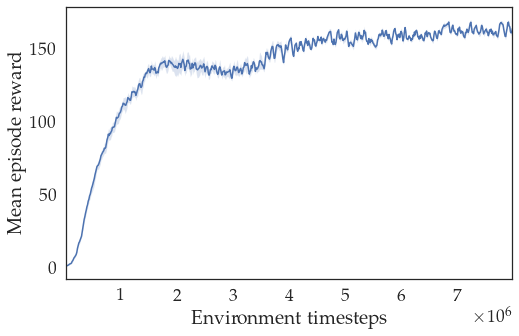

unident_s


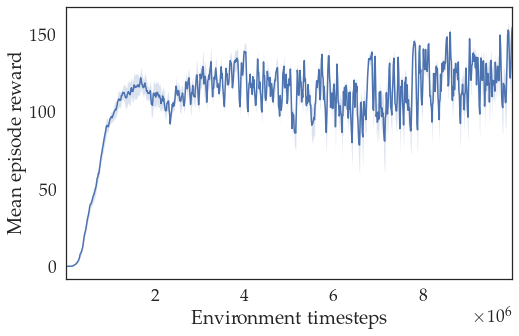

random1


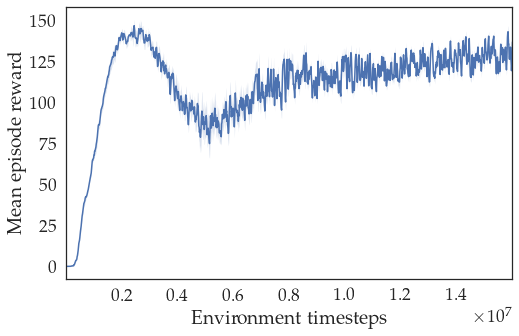

random0


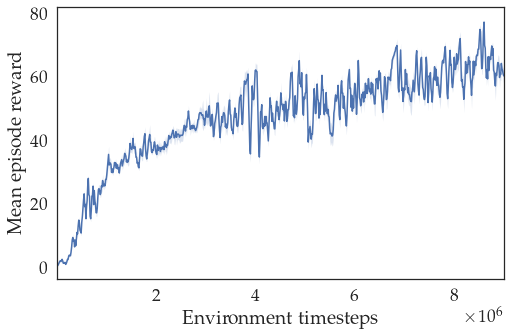

random3


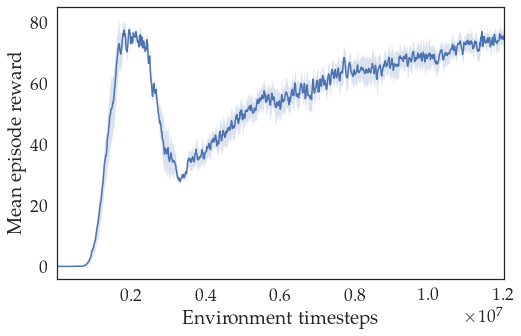

bc_test
simple


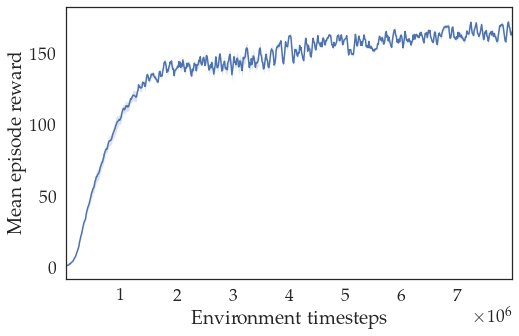

unident_s


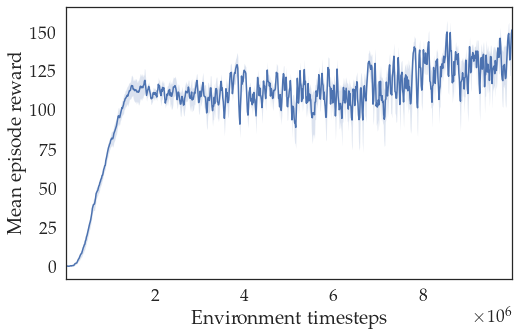

random1


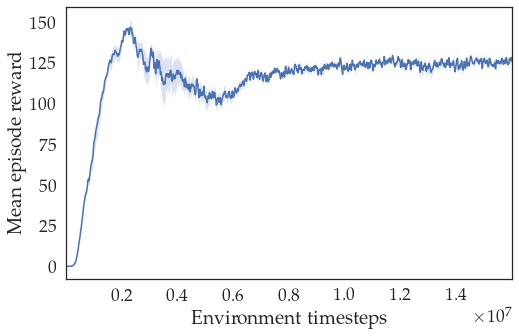

random0


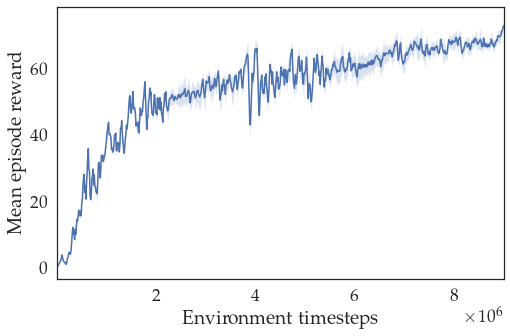

random3


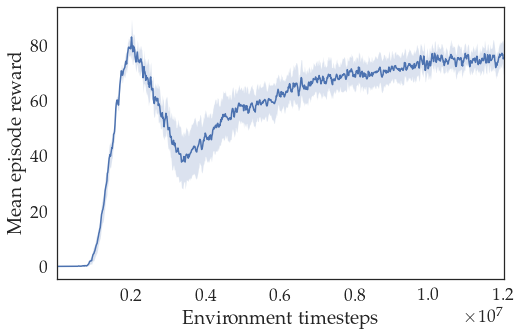

In [15]:
plot_runs_training_curves(ppo_bc_model_paths, ppo_bc_seeds, single=False, show=True)

## PPO_BC Evaluation

In [ ]:
num_rounds = 1 if TEST else 40
ppo_bc_performance = evaluate_all_ppo_bc_models(ppo_bc_model_paths, best_bc_model_paths, num_rounds, ppo_bc_seeds, best=False)
ppo_bc_performance = prepare_nested_default_dict_for_pickle(ppo_bc_performance)

In [11]:
save_pickle(ppo_bc_performance, "data/ppo_runs/ppo_bc_models_performance")

In [88]:
ppo_performance = load_pickle("data/ppo_runs/ppo_bc_models_performance")
ppo_performance

{'simple': {'PPO_BC_train+BC_test_0': [153.0, 157.0, 162.5, 155.0, 154.5],
  'PPO_BC_train+BC_test_1': [161.5, 168.0, 167.5, 158.5, 164.0],
  'PPO_BC_test+BC_test_0': [167.5, 159.0, 162.5, 163.5, 166.0],
  'PPO_BC_test+BC_test_1': [174.5, 169.5, 168.0, 169.0, 168.5]},
 'unident_s': {'PPO_BC_train+BC_test_0': [36.0, 156.5, 49.5, 49.5, 71.5],
  'PPO_BC_train+BC_test_1': [169.5, 186.5, 183.5, 178.5, 176.0],
  'PPO_BC_test+BC_test_0': [179.5, 109.5, 132.0, 108.0, 106.0],
  'PPO_BC_test+BC_test_1': [184.0, 191.0, 156.0, 198.5, 196.5]},
 'random1': {'PPO_BC_train+BC_test_0': [129.5, 113.5, 129.5, 124.5, 135.0],
  'PPO_BC_train+BC_test_1': [124.0, 126.5, 120.0, 140.5, 138.0],
  'PPO_BC_test+BC_test_0': [158.0, 137.0, 149.0, 147.5, 141.0],
  'PPO_BC_test+BC_test_1': [148.0, 136.5, 142.5, 141.5, 141.5]},
 'random0': {'PPO_BC_train+BC_test_0': [47.0, 57.0, 60.5, 64.5, 65.5],
  'PPO_BC_train+BC_test_1': [82.0, 73.5, 70.0, 75.5, 83.5],
  'PPO_BC_test+BC_test_0': [86.5, 76.5, 97.0, 93.0, 101.5],
  

# PPO_SP

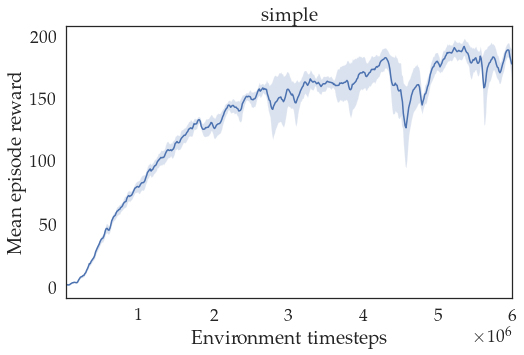

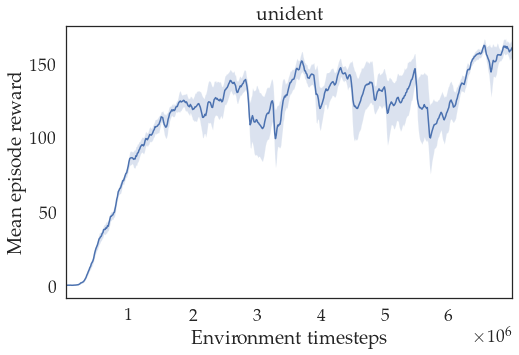

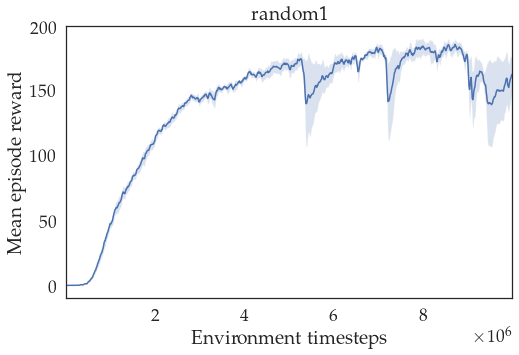

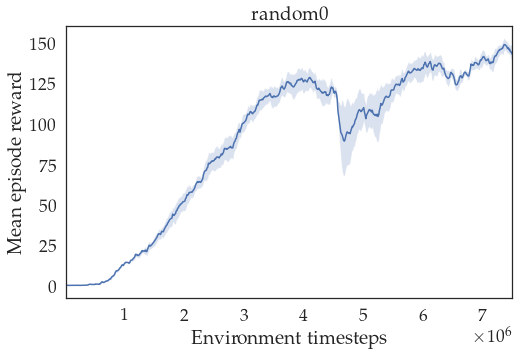

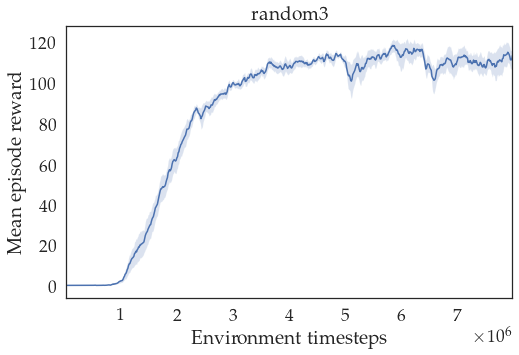

In [17]:
reset_tf()

ppo_sp_seeds = [2229, 7649, 7225, 9807,  386]

ppo_sp_model_paths = {
    "simple": "ppo_sp_simple",
    "unident_s": "ppo_sp_unident_s",
    "random1": "ppo_sp_random1",
    "random0": "ppo_sp_random0",
    "random3": "ppo_sp_random3"
}

plot_ppo_sp_training_curves(ppo_sp_model_paths, ppo_sp_seeds, show=True, single=False)

In [ ]:
set_global_seed(124)
num_rounds = 40
ppo_sp_performance = evaluate_all_sp_ppo_models(ppo_sp_model_paths, best_bc_model_paths['test'], num_rounds, ppo_sp_seeds, best=True)
save_pickle(ppo_sp_performance, PPO_DATA_DIR + "ppo_sp_models_performance")

In [18]:
load_pickle("data/ppo_runs/ppo_sp_models_performance")

{'simple': {'PPO_SP+PPO_SP': [199.0, 182.0, 208.0, 199.5, 205.5],
  'PPO_SP+BC_test_0': [90.5, 106.5, 106.0, 76.5, 104.5],
  'PPO_SP+BC_test_1': [118.0, 104.5, 120.5, 104.5, 108.5]},
 'unident_s': {'PPO_SP+PPO_SP': [176.0, 155.5, 168.5, 175.5, 160.5],
  'PPO_SP+BC_test_0': [29.5, 51.0, 34.5, 48.0, 24.5],
  'PPO_SP+BC_test_1': [98.5, 116.0, 100.0, 98.5, 103.0]},
 'random1': {'PPO_SP+PPO_SP': [196.5, 203.0, 193.5, 175.5, 185.5],
  'PPO_SP+BC_test_0': [35.5, 108.5, 50.0, 64.5, 76.0],
  'PPO_SP+BC_test_1': [46.0, 113.5, 59.5, 65.5, 79.5]},
 'random0': {'PPO_SP+PPO_SP': [153.5, 150.5, 140.5, 163.5, 151.5],
  'PPO_SP+BC_test_0': [24.0, 26.5, 20.5, 31.5, 13.5],
  'PPO_SP+BC_test_1': [38.0, 42.0, 35.5, 63.0, 11.0]},
 'random3': {'PPO_SP+PPO_SP': [110.0, 131.0, 131.0, 115.0, 124.5],
  'PPO_SP+BC_test_0': [33.0, 32.0, 25.0, 29.5, 35.5],
  'PPO_SP+BC_test_1': [31.5, 32.5, 25.0, 25.5, 45.5]}}

# CP evaluation

In [60]:
layouts = ['simple', 'unident_s']
delivery_horizon_dict = {"simple": 2, "unident_s": 3}
cp_performance = {}

In [61]:
for layout in layouts:
    ae = AgentEvaluator(mdp_params={'layout_name': layout}, env_params={'horizon': 100})
    traj = ae.evaluate_optimal_pair(delivery_horizon=delivery_horizon_dict[layout])
    cp_performance[layout] = traj['ep_returns'][0]



  0%|          | 0/1 [00:00<?, ?it/s]

Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/human_aware_rl/overcooked_ai/overcooked_ai_py/data/planners/simple_am.pkl
If the two planning agents have same params, consider using CoupledPlanningPair instead to reduce computation time by a factor of 2
X X P X X 
O     ↑1O 
X ↑0    X 
X D X S X 

Found goal after: 	1.69 seconds,   	7797 state expanded (0.33 unique) 	 ~4601.93 expansions/s
First motion goal:  (((1, 1), (-1, 0)), ((3, 1), (1, 0)))
Found goal after: 	1.76 seconds,   	7797 state expanded (0.33 unique) 	 ~4439.26 expansions/s
First motion goal:  (((1, 1), (-1, 0)), ((3, 1), (1, 0)))
Timestep: 1
Joint action taken: ('↑', '→') 	 Reward: 0 + shape * 0 
X X P X X 
O ↑0  →1O 
X       X 
X D X S X 


Found goal after: 	1.74 seconds,   	7866 state expanded (0.32 unique) 	 ~4525.76 expansions/s
First motion goal:  (((3, 1), (1, 0)), ((3, 1), (1, 0)))
Found goal after: 	1.80 seconds,   	7866 state expanded (0.32 unique) 	 ~4362.88 expansions/s
First motion goal:

Found goal after: 	0.74 seconds,   	3357 state expanded (0.33 unique) 	 ~4507.46 expansions/s
First motion goal:  (((1, 1), (-1, 0)), ((2, 1), (0, -1)))
Found goal after: 	0.72 seconds,   	3357 state expanded (0.33 unique) 	 ~4635.54 expansions/s
First motion goal:  (((1, 1), (-1, 0)), ((2, 1), (0, -1)))
Timestep: 20
Joint action taken: ('interact', 'interact') 	 Reward: 0 + shape * 0 
X X ø10X X 
O ←o↑d  O 
X       X 
X D X S X 


Found goal after: 	0.74 seconds,   	3355 state expanded (0.33 unique) 	 ~4522.90 expansions/s
First motion goal:  (((1, 1), (-1, 0)), ((2, 1), (0, -1)))
Found goal after: 	0.76 seconds,   	3355 state expanded (0.33 unique) 	 ~4420.21 expansions/s
First motion goal:  (((1, 1), (-1, 0)), ((2, 1), (0, -1)))
Timestep: 21
Joint action taken: ('interact', 'interact') 	 Reward: 0 + shape * 0 
X X ø11X X 
O ←o↑d  O 
X       X 
X D X S X 


Found goal after: 	0.85 seconds,   	3353 state expanded (0.33 unique) 	 ~3955.64 expansions/s
First motion goal:  (((1, 1), (-1,

Found goal after: 	1.05 seconds,   	4978 state expanded (0.33 unique) 	 ~4748.31 expansions/s
First motion goal:  (((2, 1), (0, -1)), ((2, 1), (0, -1)))
Found goal after: 	1.19 seconds,   	4978 state expanded (0.33 unique) 	 ~4179.38 expansions/s
First motion goal:  (((2, 1), (0, -1)), ((2, 1), (0, -1)))
Timestep: 39
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X X ø=X X 
O   ↑0→oO 
X       X 
X D X S X 


Found goal after: 	1.08 seconds,   	4977 state expanded (0.33 unique) 	 ~4601.64 expansions/s
First motion goal:  (((1, 2), (0, 1)), ((2, 1), (0, -1)))
Found goal after: 	1.15 seconds,   	4977 state expanded (0.33 unique) 	 ~4336.65 expansions/s
First motion goal:  (((1, 2), (0, 1)), ((2, 1), (0, -1)))
Timestep: 40
Joint action taken: ('←', '←') 	 Reward: 0 + shape * 0 
X X ø=X X 
O ←0←o  O 
X       X 
X D X S X 


Found goal after: 	1.08 seconds,   	5286 state expanded (0.33 unique) 	 ~4896.86 expansions/s
First motion goal:  (((1, 1), (-1, 0)), ((2, 1), (0, -1)

Found goal after: 	0.74 seconds,   	3343 state expanded (0.33 unique) 	 ~4505.18 expansions/s
First motion goal:  (((1, 1), (-1, 0)), ((2, 1), (0, -1)))
Found goal after: 	0.73 seconds,   	3343 state expanded (0.33 unique) 	 ~4555.63 expansions/s
First motion goal:  (((1, 1), (-1, 0)), ((2, 1), (0, -1)))
Timestep: 58
Joint action taken: ('interact', 'interact') 	 Reward: 0 + shape * 0 
X X ø17X X 
O ←o↑d  O 
X       X 
X D X S X 


Found goal after: 	0.75 seconds,   	3341 state expanded (0.33 unique) 	 ~4472.55 expansions/s
First motion goal:  (((1, 1), (-1, 0)), ((2, 1), (0, -1)))
Found goal after: 	0.74 seconds,   	3341 state expanded (0.33 unique) 	 ~4523.32 expansions/s
First motion goal:  (((1, 1), (-1, 0)), ((2, 1), (0, -1)))
Timestep: 59
Joint action taken: ('interact', 'interact') 	 Reward: 0 + shape * 0 
X X ø18X X 
O ←o↑d  O 
X       X 
X D X S X 


Found goal after: 	0.96 seconds,   	3339 state expanded (0.33 unique) 	 ~3483.03 expansions/s
First motion goal:  (((1, 1), (-1,

Found goal after: 	0.84 seconds,   	3852 state expanded (0.33 unique) 	 ~4570.69 expansions/s
First motion goal:  (((1, 1), (-1, 0)), ((1, 2), (0, 1)))
Timestep: 77
Joint action taken: ('interact', 'interact') 	 Reward: 0 + shape * 0 
X X ø5X X 
O ←o    O 
X ↓d    X 
X D X S X 


Found goal after: 	0.82 seconds,   	3423 state expanded (0.33 unique) 	 ~4177.79 expansions/s
First motion goal:  (((1, 1), (-1, 0)), ((2, 1), (0, -1)))
Found goal after: 	0.81 seconds,   	3423 state expanded (0.33 unique) 	 ~4244.47 expansions/s
First motion goal:  (((1, 1), (-1, 0)), ((2, 1), (0, -1)))
Timestep: 78
Joint action taken: ('interact', '→') 	 Reward: 0 + shape * 0 
X X ø6X X 
O ←o    O 
X   →d  X 
X D X S X 


Found goal after: 	0.75 seconds,   	3363 state expanded (0.33 unique) 	 ~4510.54 expansions/s
First motion goal:  (((1, 1), (-1, 0)), ((2, 1), (0, -1)))
Found goal after: 	0.77 seconds,   	3363 state expanded (0.33 unique) 	 ~4386.43 expansions/s
First motion goal:  (((1, 1), (-1, 0)), ((2,

Found goal after: 	0.84 seconds,   	3333 state expanded (0.33 unique) 	 ~3954.46 expansions/s
First motion goal:  (((2, 1), (0, -1)), ((3, 2), (0, 1)))
Timestep: 96
Joint action taken: ('interact', 'interact') 	 Reward: 20 + shape * 0 
X X ø-X X 
O   ↑0  O 
X     ↓1X 
X D X S X 


Found goal after: 	1.66 seconds,   	7479 state expanded (0.32 unique) 	 ~4493.79 expansions/s
First motion goal:  (((1, 1), (-1, 0)), ((3, 1), (1, 0)))
Found goal after: 	1.65 seconds,   	7479 state expanded (0.32 unique) 	 ~4519.29 expansions/s
First motion goal:  (((1, 1), (-1, 0)), ((3, 1), (1, 0)))
Timestep: 97
Joint action taken: ('←', '↑') 	 Reward: 0 + shape * 0 
X X ø-X X 
O ←0  ↑1O 
X       X 
X D X S X 


Found goal after: 	1.63 seconds,   	7481 state expanded (0.32 unique) 	 ~4590.03 expansions/s
First motion goal:  (((1, 1), (-1, 0)), ((3, 1), (1, 0)))
Found goal after: 	1.76 seconds,   	7481 state expanded (0.32 unique) 	 ~4242.68 expansions/s
First motion goal:  (((1, 1), (-1, 0)), ((3, 1), (1, 



100%|██████████| 1/1 [03:19<00:00, 199.02s/it]

Found goal after: 	1.03 seconds,   	4978 state expanded (0.33 unique) 	 ~4837.80 expansions/s
First motion goal:  (((2, 1), (0, -1)), ((2, 1), (0, -1)))
Timestep: 100
Joint action taken: ('↑', 'stay') 	 Reward: 0 + shape * 0 
X X ø-X X 
O   ↑o→oO 
X       X 
X D X S X 


Avg reward 60.00 (std: 0.00, se: 0.00) over 1 games of avg length 100.0
[Errno 2] No such file or directory: '/Users/micah/Developer/Research/CHAI/human_aware_rl/overcooked_ai/overcooked_ai_py/data/planners/unident_s_am.pkl'
Computing MediumLevelPlanner to be saved in /Users/micah/Developer/Research/CHAI/human_aware_rl/overcooked_ai/overcooked_ai_py/data/planners/unident_s_am.pkl




  0%|          | 0/1 [00:00<?, ?it/s]

It took 0.3141767978668213 seconds to create mlp
If the two planning agents have same params, consider using CoupledPlanningPair instead to reduce computation time by a factor of 2
X X X X X X X X X 
O   X S X O X   S 
X       P   ↑0  X 
X ↑1    P       X 
X X X D X D X X X 

Found goal after: 	92.00 seconds,   	404551 state expanded (0.31 unique) 	 ~4397.48 expansions/s
First motion goal:  (((5, 2), (0, -1)), ((1, 1), (-1, 0)))
Found goal after: 	89.83 seconds,   	404551 state expanded (0.31 unique) 	 ~4503.35 expansions/s
First motion goal:  (((5, 2), (0, -1)), ((1, 1), (-1, 0)))
Timestep: 1
Joint action taken: ('←', '↑') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X ↑1    P ←0    X 
X       P       X 
X X X D X D X X X 


Found goal after: 	1232.07 seconds,   	404801 state expanded (0.31 unique) 	 ~328.55 expansions/s
First motion goal:  (((5, 2), (0, -1)), ((1, 1), (-1, 0)))
Found goal after: 	87.19 seconds,   	404801 state expanded (0.31 unique) 	 ~4642.85 expan

Found goal after: 	11.68 seconds,   	50528 state expanded (0.37 unique) 	 ~4325.84 expansions/s
First motion goal:  (((5, 3), (-1, 0)), ((3, 3), (1, 0)))
Found goal after: 	11.45 seconds,   	50528 state expanded (0.37 unique) 	 ~4414.51 expansions/s
First motion goal:  (((5, 3), (-1, 0)), ((3, 3), (1, 0)))
Timestep: 18
Joint action taken: ('←', '↓') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø10      X 
X   ↓o  ø-←o    X 
X X X D X D X X X 


Found goal after: 	11.08 seconds,   	50528 state expanded (0.37 unique) 	 ~4560.00 expansions/s
First motion goal:  (((5, 3), (-1, 0)), ((3, 3), (1, 0)))
Found goal after: 	11.03 seconds,   	50528 state expanded (0.37 unique) 	 ~4581.10 expansions/s
First motion goal:  (((5, 3), (-1, 0)), ((3, 3), (1, 0)))
Timestep: 19
Joint action taken: ('interact', '→') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø11      X 
X     →oø=←0    X 
X X X D X D X X X 


Found goal after: 	10.78 seconds,   	50527 

Found goal after: 	20.31 seconds,   	96540 state expanded (0.32 unique) 	 ~4753.95 expansions/s
First motion goal:  (((5, 2), (-1, 0)), ((3, 3), (1, 0)))
Found goal after: 	20.55 seconds,   	96540 state expanded (0.32 unique) 	 ~4697.54 expansions/s
First motion goal:  (((5, 2), (-1, 0)), ((3, 3), (1, 0)))
Timestep: 35
Joint action taken: ('interact', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø=←0    X 
X     →dø16      X 
X X X D X D X X X 


Found goal after: 	20.16 seconds,   	96530 state expanded (0.32 unique) 	 ~4788.84 expansions/s
First motion goal:  (((5, 2), (0, -1)), ((3, 3), (1, 0)))
Found goal after: 	19.59 seconds,   	96530 state expanded (0.32 unique) 	 ~4927.19 expansions/s
First motion goal:  (((5, 2), (0, -1)), ((3, 3), (1, 0)))
Timestep: 36
Joint action taken: ('↑', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø=↑0    X 
X     →dø17      X 
X X X D X D X X X 


Found goal after: 	664.27 sec

Found goal after: 	10.90 seconds,   	50527 state expanded (0.37 unique) 	 ~4635.66 expansions/s
First motion goal:  (((5, 2), (0, -1)), ((3, 3), (1, 0)))
Found goal after: 	11.52 seconds,   	50527 state expanded (0.37 unique) 	 ~4384.16 expansions/s
First motion goal:  (((5, 2), (0, -1)), ((3, 3), (1, 0)))
Timestep: 52
Joint action taken: ('↑', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø12↑0    X 
X     →1ø1      X 
X X X D X D X X X 


Found goal after: 	10.96 seconds,   	50294 state expanded (0.37 unique) 	 ~4588.40 expansions/s
First motion goal:  (((5, 2), (0, -1)), ((3, 3), (0, 1)))
Found goal after: 	11.01 seconds,   	50294 state expanded (0.37 unique) 	 ~4566.57 expansions/s
First motion goal:  (((5, 2), (0, -1)), ((3, 3), (0, 1)))
Timestep: 53
Joint action taken: ('interact', '↓') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø13↑o    X 
X     ↓1ø2      X 
X X X D X D X X X 


Found goal after: 	8.89 seconds,   	

Found goal after: 	19.77 seconds,   	96048 state expanded (0.32 unique) 	 ~4857.92 expansions/s
First motion goal:  (((5, 3), (0, 1)), ((3, 3), (1, 0)))
Found goal after: 	25.43 seconds,   	96048 state expanded (0.32 unique) 	 ~3777.43 expansions/s
First motion goal:  (((5, 3), (0, 1)), ((3, 3), (1, 0)))
Timestep: 69
Joint action taken: ('↓', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø=      X 
X     →dø18↓0    X 
X X X D X D X X X 


Found goal after: 	19.77 seconds,   	89751 state expanded (0.32 unique) 	 ~4540.49 expansions/s
First motion goal:  (((5, 2), (0, -1)), ((3, 3), (1, 0)))
Found goal after: 	18.63 seconds,   	89751 state expanded (0.32 unique) 	 ~4816.92 expansions/s
First motion goal:  (((5, 2), (0, -1)), ((3, 3), (1, 0)))
Timestep: 70
Joint action taken: ('↑', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø=↑0    X 
X     →dø19      X 
X X X D X D X X X 


Found goal after: 	18.68 seconds,   	8

Found goal after: 	8.59 seconds,   	38103 state expanded (0.38 unique) 	 ~4435.52 expansions/s
First motion goal:  (((5, 2), (0, -1)), ((1, 1), (-1, 0)))
Timestep: 86
Joint action taken: ('interact', '↑') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     ↑1ø14↑o    X 
X       ø3      X 
X X X D X D X X X 


Found goal after: 	8.49 seconds,   	38076 state expanded (0.38 unique) 	 ~4486.38 expansions/s
First motion goal:  (((5, 2), (0, -1)), ((3, 3), (0, 1)))
Found goal after: 	8.76 seconds,   	38076 state expanded (0.38 unique) 	 ~4346.72 expansions/s
First motion goal:  (((5, 2), (0, -1)), ((3, 3), (0, 1)))
Timestep: 87
Joint action taken: ('interact', '↓') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø15↑o    X 
X     ↓1ø4      X 
X X X D X D X X X 


Found goal after: 	8.90 seconds,   	38030 state expanded (0.38 unique) 	 ~4272.47 expansions/s
First motion goal:  (((5, 2), (0, -1)), ((3, 3), (0, 1)))
Found goal after: 	8.68 seconds,   	380



100%|██████████| 1/1 [16:36:05<00:00, 59765.21s/it]

Found goal after: 	19.67 seconds,   	96530 state expanded (0.32 unique) 	 ~4908.50 expansions/s
First motion goal:  (((5, 2), (0, -1)), ((3, 3), (1, 0)))
Timestep: 100
Joint action taken: ('↑', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø=↑0    X 
X     →dø17      X 
X X X D X D X X X 


Avg reward 100.00 (std: 0.00, se: 0.00) over 1 games of avg length 100.0


CP+CP

100 horizon, 3 order horizon
simple 60   -> 240
unident 100 -> 400

400 horizon, 3 order horizon
simple  240
unident 480

# P_BC Planning evaluation

In [81]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [82]:
from human_aware_rl.experiments.planning_experiments import P_BC_evaluation

In [83]:
layouts = ['simple', 'unident_s']

best_bc_model_paths = load_pickle("data/bc_runs/best_bc_model_paths")

In [84]:
p_bc_evaluation = P_BC_evaluation(best_bc_model_paths)

Delivery horizon for layout simple: 2
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/human_aware_rl/overcooked_ai/overcooked_ai_py/data/planners/simple_am.pkl
Loading a model without an environment, this model cannot be trained until it has a valid environment.







  0%|          | 0/1 [00:00<?, ?it/s]

Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/human_aware_rl/overcooked_ai/overcooked_ai_py/data/planners/simple_am.pkl
X X P X X 
O     ↑1O 
X ↑0    X 
X D X S X 

Found goal after: 	8.57 seconds,   	1259 state expanded (0.95 unique) 	 ~146.96 expansions/s
Timestep: 1
Joint action taken: ('↑', 'stay') 	 Reward: 0 + shape * 0 
X X P X X 
O ↑0  ↑1O 
X       X 
X D X S X 


Found goal after: 	6.22 seconds,   	869 state expanded (0.95 unique) 	 ~139.68 expansions/s
Timestep: 2
Joint action taken: ('←', 'stay') 	 Reward: 0 + shape * 0 
X X P X X 
O ←0  ↑1O 
X       X 
X D X S X 


Found goal after: 	3.45 seconds,   	599 state expanded (0.95 unique) 	 ~173.87 expansions/s
Timestep: 3
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X X P X X 
O ←o  ↑1O 
X       X 
X D X S X 


Found goal after: 	2.97 seconds,   	500 state expanded (0.95 unique) 	 ~168.22 expansions/s
Timestep: 4
Joint action taken: ('→', 'stay') 	 Reward: 0 + shape * 0 
X X P X X 
O   

Found goal after: 	1.69 seconds,   	242 state expanded (0.97 unique) 	 ~142.92 expansions/s
Timestep: 39
Joint action taken: ('↓', 'stay') 	 Reward: 0 + shape * 0 
X X P XoX 
O   ←o  O 
X     ↓sX 
X D X S X 


Found goal after: 	0.93 seconds,   	206 state expanded (0.96 unique) 	 ~221.81 expansions/s
Timestep: 40
Joint action taken: ('interact', 'stay') 	 Reward: 20 + shape * 0 
X X P XoX 
O   ←o  O 
X     ↓0X 
X D X S X 


Found goal after: 	5.31 seconds,   	799 state expanded (0.95 unique) 	 ~150.54 expansions/s
Timestep: 41
Joint action taken: ('←', '↑') 	 Reward: 0 + shape * 0 
X X P XoX 
O   ↑o  O 
X   ←0  X 
X D X S X 


Found goal after: 	5.02 seconds,   	604 state expanded (0.94 unique) 	 ~120.37 expansions/s
Timestep: 42
Joint action taken: ('→', 'interact') 	 Reward: 0 + shape * 0 
X X ø-XoX 
O   ↑1  O 
X     →0X 
X D X S X 


Found goal after: 	3.75 seconds,   	653 state expanded (0.97 unique) 	 ~173.96 expansions/s
Timestep: 43
Joint action taken: ('↑', 'stay') 	 Reward: 0 

Found goal after: 	2.01 seconds,   	286 state expanded (0.97 unique) 	 ~142.30 expansions/s
Timestep: 78
Joint action taken: ('→', 'stay') 	 Reward: 0 + shape * 0 
X X P XoX 
O     ↑oO 
X     →sX 
X D X S X 


Found goal after: 	0.96 seconds,   	189 state expanded (0.96 unique) 	 ~196.18 expansions/s
Timestep: 79
Joint action taken: ('↓', 'stay') 	 Reward: 0 + shape * 0 
X X P XoX 
O     ↑oO 
X     ↓sX 
X D X S X 


Found goal after: 	0.96 seconds,   	189 state expanded (0.96 unique) 	 ~197.14 expansions/s
Timestep: 80
Joint action taken: ('interact', 'stay') 	 Reward: 20 + shape * 0 
X X P XoX 
O     ↑oO 
X     ↓0X 
X D X S X 


Found goal after: 	8.78 seconds,   	1110 state expanded (0.95 unique) 	 ~126.41 expansions/s
Timestep: 81
Joint action taken: ('←', '←') 	 Reward: 0 + shape * 0 
X X P XoX 
O   ←o  O 
X   ←0  X 
X D X S X 


Found goal after: 	7.24 seconds,   	1023 state expanded (0.94 unique) 	 ~141.22 expansions/s
Timestep: 82
Joint action taken: ('↑', 'stay') 	 Reward: 0 + 

Found goal after: 	1.91 seconds,   	290 state expanded (0.97 unique) 	 ~151.59 expansions/s
Timestep: 117
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X X ø18XoX 
O   ↑d←oO 
X       X 
X D X S X 


Found goal after: 	1.19 seconds,   	216 state expanded (0.97 unique) 	 ~181.84 expansions/s
Timestep: 118
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X X ø19XoX 
O   ↑d←oO 
X       X 
X D X S X 


Found goal after: 	3.08 seconds,   	322 state expanded (0.98 unique) 	 ~104.39 expansions/s
Timestep: 119
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X X ø20XoX 
O   ↑d←oO 
X       X 
X D X S X 


Found goal after: 	2.10 seconds,   	316 state expanded (0.97 unique) 	 ~150.23 expansions/s
Timestep: 120
Joint action taken: ('interact', '←') 	 Reward: 0 + shape * 0 
X X P XoX 
O   ↑s←oO 
X       X 
X D X S X 


Found goal after: 	1.90 seconds,   	286 state expanded (0.97 unique) 	 ~150.36 expansions/s
Timestep: 121
Joint action taken: ('

Found goal after: 	1.86 seconds,   	295 state expanded (0.97 unique) 	 ~158.32 expansions/s
Timestep: 156
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X X ø13XoX 
O   ↑d→oO 
X       X 
X D X S X 


Found goal after: 	1.14 seconds,   	221 state expanded (0.97 unique) 	 ~193.38 expansions/s
Timestep: 157
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X X ø14XoX 
O   ↑d→oO 
X       X 
X D X S X 


Found goal after: 	2.47 seconds,   	327 state expanded (0.98 unique) 	 ~132.51 expansions/s
Timestep: 158
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X X ø15XoX 
O   ↑d→oO 
X       X 
X D X S X 


Found goal after: 	2.08 seconds,   	321 state expanded (0.97 unique) 	 ~154.52 expansions/s
Timestep: 159
Joint action taken: ('interact', 'interact') 	 Reward: 0 + shape * 0 
X X ø16XoX 
O   ↑d→oO 
X       X 
X D X S X 


Found goal after: 	1.85 seconds,   	291 state expanded (0.97 unique) 	 ~157.54 expansions/s
Timestep: 160
Joint action t

Found goal after: 	1.02 seconds,   	201 state expanded (0.97 unique) 	 ~196.24 expansions/s
Timestep: 195
Joint action taken: ('↑', 'stay') 	 Reward: 0 + shape * 0 
X X ø8XoX 
O   ↑o  O 
X   ↑d  X 
X D X S X 


Found goal after: 	1.95 seconds,   	297 state expanded (0.97 unique) 	 ~152.51 expansions/s
Timestep: 196
Joint action taken: ('↓', 'stay') 	 Reward: 0 + shape * 0 
X X ø9XoX 
O   ↑o  O 
X   ↓d  X 
X D X S X 


Found goal after: 	1.21 seconds,   	222 state expanded (0.97 unique) 	 ~183.28 expansions/s
Timestep: 197
Joint action taken: ('↑', 'stay') 	 Reward: 0 + shape * 0 
X X ø10XoX 
O   ↑o  O 
X   ↑d  X 
X D X S X 


Found goal after: 	1.88 seconds,   	295 state expanded (0.97 unique) 	 ~156.88 expansions/s
Timestep: 198
Joint action taken: ('↓', 'interact') 	 Reward: 0 + shape * 0 
X X ø11XoX 
O   ↑o  O 
X   ↓d  X 
X D X S X 


Found goal after: 	2.36 seconds,   	294 state expanded (0.97 unique) 	 ~124.81 expansions/s
Timestep: 199
Joint action taken: ('↑', '→') 	 Reward: 0 +

Found goal after: 	1.69 seconds,   	309 state expanded (0.96 unique) 	 ~183.25 expansions/s
Timestep: 234
Joint action taken: ('↓', '←') 	 Reward: 0 + shape * 0 
X X ø3XoX 
O   ←o  O 
X ↓0    X 
X D X S X 


Found goal after: 	1.65 seconds,   	336 state expanded (0.98 unique) 	 ~203.53 expansions/s
Timestep: 235
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X X ø4XoX 
O   ←o  O 
X ↓d    X 
X D X S X 


Found goal after: 	1.33 seconds,   	256 state expanded (0.97 unique) 	 ~193.09 expansions/s
Timestep: 236
Joint action taken: ('→', 'stay') 	 Reward: 0 + shape * 0 
X X ø5XoX 
O   ←o  O 
X   →d  X 
X D X S X 


Found goal after: 	1.12 seconds,   	184 state expanded (0.96 unique) 	 ~165.02 expansions/s
Timestep: 237
Joint action taken: ('↓', 'stay') 	 Reward: 0 + shape * 0 
X X ø6XoX 
O   ←o  O 
X   ↓d  X 
X D X S X 


Found goal after: 	1.00 seconds,   	202 state expanded (0.97 unique) 	 ~202.00 expansions/s
Timestep: 238
Joint action taken: ('stay', '↑') 	 Reward: 0 

Found goal after: 	1.66 seconds,   	255 state expanded (0.96 unique) 	 ~153.84 expansions/s
Timestep: 273
Joint action taken: ('↑', 'stay') 	 Reward: 0 + shape * 0 
X X ø=XoX 
O   →o  O 
X   ↑o  X 
X D X S X 


Found goal after: 	1.53 seconds,   	255 state expanded (0.96 unique) 	 ~166.79 expansions/s
Timestep: 274
Joint action taken: ('↓', '→') 	 Reward: 0 + shape * 0 
X X ø=XoX 
O     →oO 
X   ↓o  X 
X D X S X 


Found goal after: 	3.20 seconds,   	382 state expanded (0.97 unique) 	 ~119.53 expansions/s
Timestep: 275
Joint action taken: ('↑', 'stay') 	 Reward: 0 + shape * 0 
X X ø=XoX 
O   ↑o→oO 
X       X 
X D X S X 


Found goal after: 	1.78 seconds,   	255 state expanded (0.96 unique) 	 ~142.88 expansions/s
Timestep: 276
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X X ø1XoX 
O   ↑0→oO 
X       X 
X D X S X 


Found goal after: 	3.46 seconds,   	380 state expanded (0.97 unique) 	 ~109.93 expansions/s
Timestep: 277
Joint action taken: ('←', 'stay') 	 Reward: 0 

Found goal after: 	2.87 seconds,   	570 state expanded (0.97 unique) 	 ~198.79 expansions/s
Timestep: 312
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X X ø=XoX 
O ←1↑0  O 
X       X 
X D X S X 


Found goal after: 	1.80 seconds,   	366 state expanded (0.97 unique) 	 ~203.47 expansions/s
Timestep: 313
Joint action taken: ('→', 'interact') 	 Reward: 0 + shape * 0 
X X ø=XoX 
O ←o  →0O 
X       X 
X D X S X 


Found goal after: 	2.07 seconds,   	368 state expanded (0.97 unique) 	 ~178.07 expansions/s
Timestep: 314
Joint action taken: ('interact', '→') 	 Reward: 0 + shape * 0 
X X ø=XoX 
O   →o→oO 
X       X 
X D X S X 


Found goal after: 	2.99 seconds,   	382 state expanded (0.97 unique) 	 ~127.91 expansions/s
Timestep: 315
Joint action taken: ('↓', 'stay') 	 Reward: 0 + shape * 0 
X X ø=XoX 
O   →o  O 
X     ↓oX 
X D X S X 


Found goal after: 	1.65 seconds,   	255 state expanded (0.96 unique) 	 ~154.31 expansions/s
Timestep: 316
Joint action taken: ('←', 'stay') 	

Found goal after: 	3.41 seconds,   	569 state expanded (0.96 unique) 	 ~166.67 expansions/s
Timestep: 351
Joint action taken: ('↑', 'stay') 	 Reward: 0 + shape * 0 
X X P XoX 
O   ↑o↑0O 
X       X 
X D X S X 


Found goal after: 	5.76 seconds,   	779 state expanded (0.95 unique) 	 ~135.15 expansions/s
Timestep: 352
Joint action taken: ('→', 'interact') 	 Reward: 0 + shape * 0 
X X ø-XoX 
O   ↑1→0O 
X       X 
X D X S X 


Found goal after: 	6.90 seconds,   	753 state expanded (0.94 unique) 	 ~109.06 expansions/s
Timestep: 353
Joint action taken: ('interact', '←') 	 Reward: 0 + shape * 0 
X X ø-XoX 
O ←1  →oO 
X       X 
X D X S X 


Found goal after: 	2.80 seconds,   	503 state expanded (0.95 unique) 	 ~179.42 expansions/s
Timestep: 354
Joint action taken: ('←', 'stay') 	 Reward: 0 + shape * 0 
X X ø-XoX 
O ←1←o  O 
X       X 
X D X S X 


Found goal after: 	2.12 seconds,   	367 state expanded (0.97 unique) 	 ~172.85 expansions/s
Timestep: 355
Joint action taken: ('↑', 'stay') 	 Reward

Found goal after: 	6.85 seconds,   	1023 state expanded (0.94 unique) 	 ~149.37 expansions/s
Timestep: 390
Joint action taken: ('↑', 'stay') 	 Reward: 0 + shape * 0 
X X P XoX 
O   ←o  O 
X   ↑0  X 
X D X S X 


Found goal after: 	9.88 seconds,   	1383 state expanded (0.95 unique) 	 ~139.98 expansions/s
Timestep: 391
Joint action taken: ('→', 'stay') 	 Reward: 0 + shape * 0 
X X P XoX 
O   ←o  O 
X     →0X 
X D X S X 


Found goal after: 	5.56 seconds,   	799 state expanded (0.95 unique) 	 ~143.81 expansions/s
Timestep: 392
Joint action taken: ('←', 'stay') 	 Reward: 0 + shape * 0 
X X P XoX 
O   ←o  O 
X   ←0  X 
X D X S X 


Found goal after: 	6.56 seconds,   	1023 state expanded (0.94 unique) 	 ~155.99 expansions/s
Timestep: 393
Joint action taken: ('↑', '↑') 	 Reward: 0 + shape * 0 
X X P XoX 
O   ↑o  O 
X   ↑0  X 
X D X S X 


Found goal after: 	5.01 seconds,   	604 state expanded (0.94 unique) 	 ~120.50 expansions/s
Timestep: 394
Joint action taken: ('→', 'stay') 	 Reward: 0 + sh






100%|██████████| 1/1 [19:29<00:00, 1169.56s/it]




  0%|          | 0/1 [00:00<?, ?it/s]

Found goal after: 	3.41 seconds,   	570 state expanded (0.97 unique) 	 ~167.01 expansions/s
Timestep: 400
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X X ø=XoX 
O ←1↑0  O 
X       X 
X D X S X 


Avg reward 180.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0
X X P X X 
O     ↑1O 
X ↑0    X 
X D X S X 

Found goal after: 	10.34 seconds,   	1193 state expanded (0.94 unique) 	 ~115.41 expansions/s
Timestep: 1
Joint action taken: ('stay', '→') 	 Reward: 0 + shape * 0 
X X P X X 
O     →1O 
X ↑0    X 
X D X S X 


Found goal after: 	7.59 seconds,   	999 state expanded (0.93 unique) 	 ~131.62 expansions/s
Timestep: 2
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X P X X 
O     →oO 
X ↑0    X 
X D X S X 


Found goal after: 	2.68 seconds,   	354 state expanded (0.94 unique) 	 ~132.31 expansions/s
Timestep: 3
Joint action taken: ('stay', '←') 	 Reward: 0 + shape * 0 
X X P X X 
O   ←o  O 
X ↑0    X 
X D X S X 


Found goal after: 	4.83 seco

Found goal after: 	1.25 seconds,   	336 state expanded (0.95 unique) 	 ~269.56 expansions/s
Timestep: 27
Joint action taken: ('→', 'stay') 	 Reward: 0 + shape * 0 
X X ø13X X 
O     →oO 
X   ↓d  X 
X D X S X 


Found goal after: 	1.34 seconds,   	147 state expanded (0.94 unique) 	 ~109.46 expansions/s
Timestep: 28
Joint action taken: ('stay', '↑') 	 Reward: 0 + shape * 0 
X X ø14X X 
O   ↑d→oO 
X       X 
X D X S X 


Found goal after: 	1.95 seconds,   	206 state expanded (0.96 unique) 	 ~105.46 expansions/s
Timestep: 29
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X ø15X X 
O   ↑d→oO 
X       X 
X D X S X 


Found goal after: 	1.64 seconds,   	240 state expanded (0.96 unique) 	 ~146.17 expansions/s
Timestep: 30
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X ø16X X 
O   ↑d→oO 
X       X 
X D X S X 


Found goal after: 	1.60 seconds,   	239 state expanded (0.96 unique) 	 ~149.13 expansions/s
Timestep: 31
Joint action taken: ('interact', 'int

Found goal after: 	0.90 seconds,   	211 state expanded (0.95 unique) 	 ~233.49 expansions/s
Timestep: 53
Joint action taken: ('interact', '→') 	 Reward: 0 + shape * 0 
X X ø4X X 
O     →oO 
X ↓d    X 
X D X S X 


Path for last node expanded:  [None, (((0, 0), 'interact'),), (((0, 0), 'interact'),), (((0, 0), 'interact'),), (((0, -1), 'interact'),), (((0, 0), 'interact'),), (((0, 0), 'interact'),), (((0, 0), 'interact'),), (((1, 0), 'interact'),), (((0, 0), 'interact'),), (((0, 0), 'interact'),), (((0, 0), 'interact'),), (((0, -1), 'interact'),), (((0, 0), 'interact'),), (((0, 0), 'interact'),), (((0, 0), 'interact'),), (('interact', 'interact'),), (((0, -1), 'interact'),)]
State of last node expanded:  Players: ((2, 1) facing (0, -1) holding dish@(2, 1), (3, 1) facing (1, 0) holding onion@(3, 1)), Objects: [soup@(2, 0) with state ('onion', 3, 20)], Order list: ['any', 'any']
Successors for last node expanded:  [((((-1, 0), 'interact'),), <overcooked_ai_py.mdp.overcooked_mdp.Overcooked

Found goal after: 	0.81 seconds,   	198 state expanded (0.94 unique) 	 ~245.65 expansions/s
Timestep: 67
Joint action taken: ('interact', 'interact') 	 Reward: 0 + shape * 0 
X X ø18X X 
O ←o↑d  O 
X       X 
X D X S X 


Path for last node expanded:  [None, (((0, 0), 'interact'),), (((0, 0), 'interact'),), (((0, 0), 'interact'),)]
State of last node expanded:  Players: ((2, 1) facing (0, -1) holding dish@(2, 1), (1, 1) facing (-1, 0) holding onion@(1, 1)), Objects: [soup@(2, 0) with state ('onion', 3, 20)], Order list: ['any', 'any']
Successors for last node expanded:  [((('interact', 'interact'),), <overcooked_ai_py.mdp.overcooked_mdp.OvercookedState object at 0x155454908>, 1)]
A* failed, taking random action
Timestep: 68
Joint action taken: ('↓', '←') 	 Reward: 0 + shape * 0 
X X ø19X X 
O ←o    O 
X   ↓d  X 
X D X S X 


Path for last node expanded:  [None, (((0, 0), 'interact'),), (((0, 0), 'interact'),)]
State of last node expanded:  Players: ((2, 2) facing (0, 1) holding dish@(2

Found goal after: 	2.70 seconds,   	258 state expanded (0.95 unique) 	 ~95.42 expansions/s
Timestep: 92
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X ø2X X 
O   ↑1  O 
X ←0    X 
X D X S X 


Found goal after: 	2.27 seconds,   	255 state expanded (0.95 unique) 	 ~112.19 expansions/s
Timestep: 93
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X ø3X X 
O   ↑1  O 
X ←0    X 
X D X S X 


Found goal after: 	2.21 seconds,   	252 state expanded (0.94 unique) 	 ~113.84 expansions/s
Timestep: 94
Joint action taken: ('↓', 'interact') 	 Reward: 0 + shape * 0 
X X ø4X X 
O   ↑1  O 
X ↓0    X 
X D X S X 


Found goal after: 	0.82 seconds,   	231 state expanded (0.94 unique) 	 ~282.89 expansions/s
Timestep: 95
Joint action taken: ('stay', '←') 	 Reward: 0 + shape * 0 
X X ø5X X 
O ←1    O 
X ↓0    X 
X D X S X 


Found goal after: 	1.35 seconds,   	318 state expanded (0.96 unique) 	 ~235.47 expansions/s
Timestep: 96
Joint action taken: ('interact', '↑') 

Found goal after: 	2.04 seconds,   	258 state expanded (0.95 unique) 	 ~126.28 expansions/s
Timestep: 131
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X ø1XdX 
O   ↑1  O 
X   →o  X 
X D X S X 


Found goal after: 	1.93 seconds,   	257 state expanded (0.95 unique) 	 ~133.40 expansions/s
Timestep: 132
Joint action taken: ('↑', '←') 	 Reward: 0 + shape * 0 
X X ø2XdX 
O ←1↑o  O 
X       X 
X D X S X 


Found goal after: 	1.70 seconds,   	233 state expanded (0.95 unique) 	 ~136.67 expansions/s
Timestep: 133
Joint action taken: ('stay', '↓') 	 Reward: 0 + shape * 0 
X X ø3XdX 
O   ↑o  O 
X ↓1    X 
X D X S X 


Found goal after: 	1.55 seconds,   	257 state expanded (0.96 unique) 	 ~166.00 expansions/s
Timestep: 134
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X ø4XdX 
O   ↑o  O 
X ↓d    X 
X D X S X 


Found goal after: 	1.36 seconds,   	319 state expanded (0.95 unique) 	 ~234.06 expansions/s
Timestep: 135
Joint action taken: ('stay', '↑') 	 Rew

Found goal after: 	1.04 seconds,   	225 state expanded (0.95 unique) 	 ~216.50 expansions/s
Timestep: 169
Joint action taken: ('stay', '↑') 	 Reward: 0 + shape * 0 
X X ø4XdX 
O ←0  ↑oO 
X       X 
X D X S X 


Path for last node expanded:  [None, (((0, 1), (1, 0)), ((0, 1), 'interact')), (((0, 0), 'interact'),), (((-1, 0), 'interact'),), (((0, 0), 'interact'),), (((0, 0), 'interact'),), (((0, 0), 'interact'),), (((0, 1), 'interact'),), (('interact', 'interact'),), (((0, 0), 'interact'),), (((0, 0), 'interact'),), (((0, -1), 'interact'),), (((0, 0), 'interact'),), (((0, 0), 'interact'),), (((0, 0), 'interact'),), (((1, 0), 'interact'),), (((0, 0), 'interact'),)]
State of last node expanded:  Players: ((2, 1) facing (1, 0) holding dish@(2, 1), (3, 1) facing (1, 0) holding onion@(3, 1)), Objects: [dish@(3, 0), soup@(2, 0) with state ('onion', 3, 20)], Order list: ['any', 'any']
Successors for last node expanded:  [((((0, 0), 'interact'),), <overcooked_ai_py.mdp.overcooked_mdp.OvercookedS

Found goal after: 	1.51 seconds,   	242 state expanded (0.93 unique) 	 ~160.13 expansions/s
Timestep: 185
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X ø20XdX 
O   ↓d  O 
X   ↓1  X 
X D XoS X 


Found goal after: 	3.25 seconds,   	289 state expanded (0.94 unique) 	 ~89.00 expansions/s
Timestep: 186
Joint action taken: ('stay', '←') 	 Reward: 0 + shape * 0 
X X ø20XdX 
O   ↓d  O 
X ←1    X 
X D XoS X 


Found goal after: 	1.40 seconds,   	241 state expanded (0.93 unique) 	 ~172.23 expansions/s
Timestep: 187
Joint action taken: ('interact', '↓') 	 Reward: 0 + shape * 0 
X X ø20XdX 
O   ↓d  O 
X ↓1    X 
X D XoS X 


Found goal after: 	1.37 seconds,   	287 state expanded (0.95 unique) 	 ~209.17 expansions/s
Timestep: 188
Joint action taken: ('→', 'interact') 	 Reward: 0 + shape * 0 
X X ø20XdX 
O     →dO 
X ↓d    X 
X D XoS X 


Found goal after: 	1.29 seconds,   	236 state expanded (0.93 unique) 	 ~183.38 expansions/s
Timestep: 189
Joint action taken: ('stay', '→'

Found goal after: 	7.69 seconds,   	619 state expanded (0.94 unique) 	 ~80.48 expansions/s
Timestep: 224
Joint action taken: ('stay', '↑') 	 Reward: 0 + shape * 0 
X X ø=XdX 
O   ↓d  O 
X   ↑o  X 
X D XoS X 


Found goal after: 	6.87 seconds,   	619 state expanded (0.94 unique) 	 ~90.06 expansions/s
Timestep: 225
Joint action taken: ('interact', '↓') 	 Reward: 0 + shape * 0 
X X ø=XdX 
O   ↓d  O 
X   ↓o  X 
X D XoS X 


Found goal after: 	6.79 seconds,   	619 state expanded (0.94 unique) 	 ~91.18 expansions/s
Timestep: 226
Joint action taken: ('→', '↑') 	 Reward: 0 + shape * 0 
X X ø=XdX 
O   ↑o→dO 
X       X 
X D XoS X 


Found goal after: 	6.10 seconds,   	619 state expanded (0.94 unique) 	 ~101.52 expansions/s
Timestep: 227
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X ø1XdX 
O   ↑1→dO 
X       X 
X D XoS X 


Found goal after: 	6.54 seconds,   	619 state expanded (0.94 unique) 	 ~94.63 expansions/s
Timestep: 228
Joint action taken: ('stay', '←') 	 Reward: 0 

Found goal after: 	1.53 seconds,   	322 state expanded (0.93 unique) 	 ~209.77 expansions/s
Timestep: 263
Joint action taken: ('stay', '↑') 	 Reward: 0 + shape * 0 
X X ø-XdX 
O   ↑d↑oO 
X       X 
X D XoS X 


Found goal after: 	1.07 seconds,   	207 state expanded (0.92 unique) 	 ~193.60 expansions/s
Timestep: 264
Joint action taken: ('interact', '↓') 	 Reward: 0 + shape * 0 
X X ø-XdX 
O   ↑d  O 
X     ↓oX 
X D XoS X 


Found goal after: 	1.34 seconds,   	322 state expanded (0.93 unique) 	 ~239.91 expansions/s
Timestep: 265
Joint action taken: ('←', '↑') 	 Reward: 0 + shape * 0 
X X ø-XdX 
O ←d  ↑oO 
X       X 
X D XoS X 


Found goal after: 	1.96 seconds,   	556 state expanded (0.93 unique) 	 ~283.79 expansions/s
Timestep: 266
Joint action taken: ('stay', '←') 	 Reward: 0 + shape * 0 
X X ø-XdX 
O ←d←o  O 
X       X 
X D XoS X 


Found goal after: 	2.85 seconds,   	653 state expanded (0.93 unique) 	 ~228.76 expansions/s
Timestep: 267
Joint action taken: ('stay', '↑') 	 Reward: 0 + s

Found goal after: 	2.89 seconds,   	283 state expanded (0.94 unique) 	 ~98.08 expansions/s
Timestep: 302
Joint action taken: ('←', 'interact') 	 Reward: 0 + shape * 0 
X X ø20XdX 
O   ↑d←dO 
X       X 
X D XoS X 


Found goal after: 	1.40 seconds,   	344 state expanded (0.93 unique) 	 ~246.31 expansions/s
Timestep: 303
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X P XdX 
O   ↑s←dO 
X       X 
X D XoS X 


Found goal after: 	1.39 seconds,   	344 state expanded (0.93 unique) 	 ~246.95 expansions/s
Timestep: 304
Joint action taken: ('stay', '↓') 	 Reward: 0 + shape * 0 
X X P XdX 
O     ←dO 
X   ↓s  X 
X D XoS X 


Found goal after: 	2.80 seconds,   	359 state expanded (0.96 unique) 	 ~128.22 expansions/s
Timestep: 305
Joint action taken: ('stay', '→') 	 Reward: 0 + shape * 0 
X X P XdX 
O     ←dO 
X     →sX 
X D XoS X 


Found goal after: 	2.66 seconds,   	359 state expanded (0.96 unique) 	 ~134.81 expansions/s
Timestep: 306
Joint action taken: ('←', '↓') 	 Reward

Found goal after: 	5.99 seconds,   	619 state expanded (0.94 unique) 	 ~103.42 expansions/s
Timestep: 341
Joint action taken: ('stay', '↓') 	 Reward: 0 + shape * 0 
X X ø3XdX 
O     →dO 
X ↓1    X 
X D XoS X 


Found goal after: 	1.69 seconds,   	337 state expanded (0.93 unique) 	 ~199.78 expansions/s
Timestep: 342
Joint action taken: ('↑', 'interact') 	 Reward: 0 + shape * 0 
X X ø4XdX 
O     ↑dO 
X ↓d    X 
X D XoS X 


Found goal after: 	1.33 seconds,   	358 state expanded (0.93 unique) 	 ~269.12 expansions/s
Timestep: 343
Joint action taken: ('stay', '→') 	 Reward: 0 + shape * 0 
X X ø5XdX 
O     ↑dO 
X   →d  X 
X D XoS X 


Found goal after: 	1.39 seconds,   	359 state expanded (0.93 unique) 	 ~258.08 expansions/s
Timestep: 344
Joint action taken: ('stay', '↑') 	 Reward: 0 + shape * 0 
X X ø6XdX 
O   ↑d↑dO 
X       X 
X D XoS X 


Found goal after: 	1.39 seconds,   	359 state expanded (0.93 unique) 	 ~258.07 expansions/s
Timestep: 345
Joint action taken: ('stay', 'interact') 	 Rew

Found goal after: 	2.85 seconds,   	669 state expanded (0.94 unique) 	 ~234.87 expansions/s
Timestep: 380
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X ø=XdX 
O ←d↑1  O 
X       X 
X D XoS X 


Found goal after: 	2.01 seconds,   	555 state expanded (0.93 unique) 	 ~275.99 expansions/s
Timestep: 381
Joint action taken: ('→', '→') 	 Reward: 0 + shape * 0 
X X ø=XdX 
O   →d→1O 
X       X 
X D XoS X 


Found goal after: 	1.94 seconds,   	441 state expanded (0.93 unique) 	 ~227.08 expansions/s
Timestep: 382
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X ø=XdX 
O   →d→oO 
X       X 
X D XoS X 


Found goal after: 	0.95 seconds,   	242 state expanded (0.94 unique) 	 ~253.81 expansions/s
Timestep: 383
Joint action taken: ('stay', '↓') 	 Reward: 0 + shape * 0 
X X ø=XdX 
O   →d  O 
X     ↓oX 
X D XoS X 


Found goal after: 	0.92 seconds,   	245 state expanded (0.94 unique) 	 ~267.70 expansions/s
Timestep: 384
Joint action taken: ('↑', 'interact') 	






100%|██████████| 1/1 [16:47<00:00, 1007.74s/it]

Found goal after: 	1.39 seconds,   	359 state expanded (0.93 unique) 	 ~257.44 expansions/s
Timestep: 400
Joint action taken: ('stay', '↑') 	 Reward: 0 + shape * 0 
X X ø6XdX 
O   ↑d↑dO 
X       X 
X D XoS X 


Avg reward 160.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0
P_BC_test + BC_test 180.0 160.0
Loading a model without an environment, this model cannot be trained until it has a valid environment.







  0%|          | 0/1 [00:00<?, ?it/s]

Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/human_aware_rl/overcooked_ai/overcooked_ai_py/data/planners/simple_am.pkl
X X P X X 
O     ↑1O 
X ↑0    X 
X D X S X 

Found goal after: 	47.95 seconds,   	2787 state expanded (0.93 unique) 	 ~58.13 expansions/s
Timestep: 1
Joint action taken: ('→', 'stay') 	 Reward: 0 + shape * 0 
X X P X X 
O     ↑1O 
X   →0  X 
X D X S X 


Found goal after: 	26.35 seconds,   	1666 state expanded (0.93 unique) 	 ~63.23 expansions/s
Timestep: 2
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X X P X X 
O     ↑1O 
X   →0  X 
X D X S X 


Found goal after: 	29.35 seconds,   	1666 state expanded (0.93 unique) 	 ~56.76 expansions/s
Timestep: 3
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X X P X X 
O     ↑1O 
X   →0  X 
X D X S X 


Found goal after: 	28.80 seconds,   	1666 state expanded (0.93 unique) 	 ~57.85 expansions/s
Timestep: 4
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0

Found goal after: 	4.64 seconds,   	251 state expanded (0.96 unique) 	 ~54.08 expansions/s
Timestep: 39
Joint action taken: ('interact', 'interact') 	 Reward: 0 + shape * 0 
X X ø10XoX 
O   ↑d→oO 
Xo      X 
X D X S X 


Found goal after: 	3.68 seconds,   	242 state expanded (0.94 unique) 	 ~65.68 expansions/s
Timestep: 40
Joint action taken: ('interact', '←') 	 Reward: 0 + shape * 0 
X X ø11XoX 
O   ↑d←oO 
Xo      X 
X D X S X 


Found goal after: 	3.38 seconds,   	249 state expanded (0.96 unique) 	 ~73.57 expansions/s
Timestep: 41
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X X ø12XoX 
O   ↑d←oO 
Xo      X 
X D X S X 


Found goal after: 	3.39 seconds,   	248 state expanded (0.96 unique) 	 ~73.15 expansions/s
Timestep: 42
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X X ø13XoX 
O   ↑d←oO 
Xo      X 
X D X S X 


Found goal after: 	2.40 seconds,   	170 state expanded (0.96 unique) 	 ~70.84 expansions/s
Timestep: 43
Joint action taken: ('inter

Path for last node expanded:  [None, (((0, -1), (0, 0)), ((1, 0), (0, 0)), ('interact', (0, 0))), (('interact', (0, 0)),), (('interact', (0, 0)),), (('interact', (-1, 0)),), (('interact', (0, 0)),), (('interact', (0, 0)),), (('interact', (0, 0)),), (('interact', (-1, 0)),), (('interact', (0, 1)),), (('interact', (0, 0)),), (('interact', (0, 0)),), (('interact', (0, 0)),), (('interact', 'interact'),), (('interact', (0, -1)),), (('interact', (0, 0)),), (('interact', (0, 0)),)]
State of last node expanded:  Players: ((3, 1) facing (1, 0) holding onion@(3, 1), (1, 1) facing (0, -1) holding dish@(1, 1)), Objects: [onion@(0, 2), onion@(3, 0), soup@(2, 0) with state ('onion', 3, 20)], Order list: ['any', 'any']
Successors for last node expanded:  [((('interact', (0, 0)),), <overcooked_ai_py.mdp.overcooked_mdp.OvercookedState object at 0x155f824a8>, 1)]
A* failed, taking random action
Timestep: 69
Joint action taken: ('↑', 'stay') 	 Reward: 0 + shape * 0 
X X ø4XoX 
O     ↑oO 
Xo  ↓1  X 
X D X

Path for last node expanded:  [None, (((1, 0), (1, 0)), ('interact', (0, 0))), (('interact', (0, 0)),)]
State of last node expanded:  Players: ((3, 1) facing (1, 0) holding onion@(3, 1), (2, 1) facing (1, 0) holding dish@(2, 1)), Objects: [onion@(0, 2), onion@(3, 0), soup@(2, 0) with state ('onion', 3, 20)], Order list: ['any', 'any']
Successors for last node expanded:  [((('interact', (0, -1)),), <overcooked_ai_py.mdp.overcooked_mdp.OvercookedState object at 0x156053a90>, 1)]
A* failed, taking random action
Timestep: 86
Joint action taken: ('↑', 'stay') 	 Reward: 0 + shape * 0 
X X ø20XoX 
O →d  ↑oO 
Xo      X 
X D X S X 


Path for last node expanded:  [None, (((1, 0), (0, 0)), ('interact', (0, 0))), (('interact', (1, 0)),), (('interact', (0, 0)),)]
State of last node expanded:  Players: ((3, 1) facing (1, 0) holding onion@(3, 1), (2, 1) facing (1, 0) holding dish@(2, 1)), Objects: [onion@(0, 2), onion@(3, 0), soup@(2, 0) with state ('onion', 3, 20)], Order list: ['any', 'any']
Succe

Found goal after: 	0.65 seconds,   	151 state expanded (0.93 unique) 	 ~231.49 expansions/s
Timestep: 101
Joint action taken: ('←', '↓') 	 Reward: 0 + shape * 0 
X X P XoX 
O   ←o  O 
Xo  ↓s  X 
X D X S X 


Found goal after: 	0.65 seconds,   	151 state expanded (0.93 unique) 	 ~232.17 expansions/s
Timestep: 102
Joint action taken: ('↑', '→') 	 Reward: 0 + shape * 0 
X X P XoX 
O   ↑o  O 
Xo    →sX 
X D X S X 


Found goal after: 	0.65 seconds,   	151 state expanded (0.93 unique) 	 ~230.74 expansions/s
Timestep: 103
Joint action taken: ('interact', '↓') 	 Reward: 0 + shape * 0 
X X ø-XoX 
O   ↑0  O 
Xo    ↓sX 
X D X S X 


Found goal after: 	1.03 seconds,   	168 state expanded (0.95 unique) 	 ~163.89 expansions/s
Timestep: 104
Joint action taken: ('←', 'stay') 	 Reward: 0 + shape * 0 
X X ø-XoX 
O ←0    O 
Xo    ↓sX 
X D X S X 


Found goal after: 	0.61 seconds,   	148 state expanded (0.94 unique) 	 ~240.78 expansions/s
Timestep: 105
Joint action taken: ('interact', 'stay') 	 Reward: 0

Found goal after: 	8.63 seconds,   	662 state expanded (0.95 unique) 	 ~76.71 expansions/s
Timestep: 140
Joint action taken: ('→', '←') 	 Reward: 0 + shape * 0 
X X ø-XoX 
O ←1  →0O 
X       X 
X D X S X 


Found goal after: 	9.74 seconds,   	873 state expanded (0.92 unique) 	 ~89.61 expansions/s
Timestep: 141
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X X ø-XoX 
O ←1  →oO 
X       X 
X D X S X 


Found goal after: 	4.15 seconds,   	308 state expanded (0.93 unique) 	 ~74.27 expansions/s
Timestep: 142
Joint action taken: ('←', 'stay') 	 Reward: 0 + shape * 0 
X X ø-XoX 
O ←1←o  O 
X       X 
X D X S X 


Found goal after: 	3.38 seconds,   	320 state expanded (0.96 unique) 	 ~94.62 expansions/s
Timestep: 143
Joint action taken: ('↑', 'stay') 	 Reward: 0 + shape * 0 
X X ø-XoX 
O ←1↑o  O 
X       X 
X D X S X 


Found goal after: 	1.03 seconds,   	318 state expanded (0.96 unique) 	 ~309.14 expansions/s
Timestep: 144
Joint action taken: ('interact', 'interact') 	 Rew

Path for last node expanded:  [None, (('interact', (0, 0)),), (('interact', (0, 0)),), (('interact', (0, 0)),), (('interact', (0, 1)),), (('interact', (0, 0)),), (('interact', (0, 0)),), (('interact', (0, 0)),), (('interact', 'interact'),), (('interact', (0, -1)),), (('interact', (0, 0)),), (('interact', (0, 0)),), (('interact', (0, 0)),)]
State of last node expanded:  Players: ((2, 1) facing (0, -1) holding onion@(2, 1), (1, 1) facing (0, -1) holding dish@(1, 1)), Objects: [onion@(3, 0), soup@(2, 0) with state ('onion', 3, 20)], Order list: ['any', 'any']
Successors for last node expanded:  [((('interact', (0, -1)),), <overcooked_ai_py.mdp.overcooked_mdp.OvercookedState object at 0x155d71e80>, 1)]
A* failed, taking random action
Timestep: 159
Joint action taken: ('↑', '↓') 	 Reward: 0 + shape * 0 
X X ø10XoX 
O   ↑o  O 
X ↓1    X 
X D X S X 


Path for last node expanded:  [None, (('interact', (0, 0)),), (('interact', (0, 0)),), (('interact', (0, 0)),), (('interact', 'interact'),), ((

Found goal after: 	0.55 seconds,   	148 state expanded (0.93 unique) 	 ~266.87 expansions/s
Timestep: 172
Joint action taken: ('←', '↓') 	 Reward: 0 + shape * 0 
X X P XoX 
O   ←o  O 
X   ↓s  X 
X D X S X 


Found goal after: 	0.57 seconds,   	148 state expanded (0.93 unique) 	 ~258.10 expansions/s
Timestep: 173
Joint action taken: ('↑', '→') 	 Reward: 0 + shape * 0 
X X P XoX 
O   ↑o  O 
X     →sX 
X D X S X 


Found goal after: 	0.57 seconds,   	148 state expanded (0.93 unique) 	 ~258.18 expansions/s
Timestep: 174
Joint action taken: ('interact', '↓') 	 Reward: 0 + shape * 0 
X X ø-XoX 
O   ↑0  O 
X     ↓sX 
X D X S X 


Found goal after: 	0.75 seconds,   	139 state expanded (0.94 unique) 	 ~186.18 expansions/s
Timestep: 175
Joint action taken: ('←', 'stay') 	 Reward: 0 + shape * 0 
X X ø-XoX 
O ←0    O 
X     ↓sX 
X D X S X 


Found goal after: 	0.49 seconds,   	128 state expanded (0.93 unique) 	 ~262.20 expansions/s
Timestep: 176
Joint action taken: ('interact', 'stay') 	 Reward: 0

Found goal after: 	1.24 seconds,   	110 state expanded (0.94 unique) 	 ~88.78 expansions/s
Timestep: 207
Joint action taken: ('interact', 'stay') 	 Reward: 20 + shape * 0 
X XdP XoX 
O   →o  O 
X     ↓0X 
X D X S X 


Found goal after: 	6.20 seconds,   	420 state expanded (0.95 unique) 	 ~67.70 expansions/s
Timestep: 208
Joint action taken: ('↑', 'stay') 	 Reward: 0 + shape * 0 
X XdP XoX 
O   →o↑0O 
X       X 
X D X S X 


Found goal after: 	6.88 seconds,   	668 state expanded (0.95 unique) 	 ~97.12 expansions/s
Timestep: 209
Joint action taken: ('→', 'stay') 	 Reward: 0 + shape * 0 
X XdP XoX 
O   →o→0O 
X       X 
X D X S X 


Found goal after: 	4.98 seconds,   	390 state expanded (0.92 unique) 	 ~78.29 expansions/s
Timestep: 210
Joint action taken: ('interact', '↑') 	 Reward: 0 + shape * 0 
X XdP XoX 
O   ↑o→oO 
X       X 
X D X S X 


Found goal after: 	2.74 seconds,   	320 state expanded (0.95 unique) 	 ~116.68 expansions/s
Timestep: 211
Joint action taken: ('↓', 'interact') 	 Re

Path for last node expanded:  [None, (((0, -1), (0, 0)), ((0, -1), (1, 0)), ('interact', (0, 0))), (('interact', (0, 0)),), (('interact', (0, 0)),), (('interact', 'interact'),), (('interact', (-1, 0)),), (('interact', (0, 0)),), (('interact', (0, 0)),), (('interact', (0, 0)),), (('interact', (-1, 0)),), (('interact', (0, -1)),), (('interact', (0, 0)),), (('interact', (0, 0)),), (('interact', (0, 0)),), (('interact', 'interact'),), (('interact', (0, 1)),), (('interact', (0, 0)),), (('interact', (0, 0)),)]
State of last node expanded:  Players: ((2, 1) facing (0, -1) holding onion@(2, 1), (3, 2) facing (0, 1) holding onion@(3, 2)), Objects: [onion@(3, 0), dish@(1, 0), soup@(2, 0) with state ('onion', 3, 20)], Order list: ['any', 'any']
Successors for last node expanded:  [((('interact', (0, 0)),), <overcooked_ai_py.mdp.overcooked_mdp.OvercookedState object at 0x156032b70>, 1)]
A* failed, taking random action
Timestep: 227
Joint action taken: ('←', 'stay') 	 Reward: 0 + shape * 0 
X Xdø3X

Successors for last node expanded:  [((('interact', (0, 0)),), <overcooked_ai_py.mdp.overcooked_mdp.OvercookedState object at 0x156032860>, 1)]
A* failed, taking random action
Timestep: 240
Joint action taken: ('↑', 'stay') 	 Reward: 0 + shape * 0 
X Xdø16XoX 
O     ↑oO 
X ↓d    X 
X D X S X 


Path for last node expanded:  [None, (((1, 0), (0, -1)), ('interact', (0, 0))), (('interact', (0, 0)),), (('interact', (0, -1)),), (('interact', (1, 0)),), (('interact', (0, 0)),)]
State of last node expanded:  Players: ((3, 1) facing (1, 0) holding onion@(3, 1), (2, 1) facing (1, 0) holding dish@(2, 1)), Objects: [onion@(3, 0), dish@(1, 0), soup@(2, 0) with state ('onion', 3, 20)], Order list: ['any', 'any']
Successors for last node expanded:  [((('interact', (0, 0)),), <overcooked_ai_py.mdp.overcooked_mdp.OvercookedState object at 0x1560322e8>, 1)]
A* failed, taking random action
Timestep: 241
Joint action taken: ('←', 'stay') 	 Reward: 0 + shape * 0 
X Xdø17XoX 
O   ←o  O 
X ↓d    X 
X D X S 

Found goal after: 	1.03 seconds,   	178 state expanded (0.94 unique) 	 ~172.10 expansions/s
Timestep: 255
Joint action taken: ('→', 'interact') 	 Reward: 0 + shape * 0 
X XdP XoX 
O   ↑s→oO 
X       X 
X D X S X 


Found goal after: 	1.13 seconds,   	176 state expanded (0.94 unique) 	 ~156.42 expansions/s
Timestep: 256
Joint action taken: ('←', 'stay') 	 Reward: 0 + shape * 0 
X XdP XoX 
O   ↑s←oO 
X       X 
X D X S X 


Found goal after: 	1.64 seconds,   	176 state expanded (0.94 unique) 	 ~107.51 expansions/s
Timestep: 257
Joint action taken: ('←', 'stay') 	 Reward: 0 + shape * 0 
X XdP XoX 
O   ↑s←oO 
X       X 
X D X S X 


Found goal after: 	1.12 seconds,   	176 state expanded (0.94 unique) 	 ~157.13 expansions/s
Timestep: 258
Joint action taken: ('←', '↓') 	 Reward: 0 + shape * 0 
X XdP XoX 
O   ←o  O 
X   ↓s  X 
X D X S X 


Found goal after: 	1.14 seconds,   	176 state expanded (0.94 unique) 	 ~153.78 expansions/s
Timestep: 259
Joint action taken: ('↑', '→') 	 Reward: 0 + shap

Found goal after: 	4.01 seconds,   	212 state expanded (0.93 unique) 	 ~52.88 expansions/s
Timestep: 294
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X Xdø20XoX 
O     →dO 
Xd↓d    X 
X D X S X 


Found goal after: 	3.05 seconds,   	221 state expanded (0.95 unique) 	 ~72.52 expansions/s
Timestep: 295
Joint action taken: ('→', 'stay') 	 Reward: 0 + shape * 0 
X Xdø20XoX 
O     →dO 
Xd  →d  X 
X D X S X 


Found goal after: 	2.99 seconds,   	221 state expanded (0.95 unique) 	 ~73.98 expansions/s
Timestep: 296
Joint action taken: ('↑', '↑') 	 Reward: 0 + shape * 0 
X Xdø20XoX 
O   ↑d↑dO 
Xd      X 
X D X S X 


Found goal after: 	3.04 seconds,   	221 state expanded (0.95 unique) 	 ~72.79 expansions/s
Timestep: 297
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X XdP XoX 
O   ↑s↑dO 
Xd      X 
X D X S X 


Found goal after: 	3.73 seconds,   	220 state expanded (0.95 unique) 	 ~58.96 expansions/s
Timestep: 298
Joint action taken: ('↓', 'stay') 	 Rewar

Found goal after: 	3.28 seconds,   	209 state expanded (0.95 unique) 	 ~63.68 expansions/s
Timestep: 333
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X Xdø13XoX 
O ↑d    O 
Xd↑d    X 
X D XdS X 


Found goal after: 	4.19 seconds,   	177 state expanded (0.96 unique) 	 ~42.19 expansions/s
Timestep: 334
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X Xdø14XoX 
O ↑d    O 
Xd↑d    X 
X D XdS X 


Found goal after: 	3.86 seconds,   	176 state expanded (0.96 unique) 	 ~45.65 expansions/s
Timestep: 335
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X Xdø15XoX 
O ↑d    O 
Xd↑d    X 
X D XdS X 


Found goal after: 	3.38 seconds,   	207 state expanded (0.94 unique) 	 ~61.31 expansions/s
Timestep: 336
Joint action taken: ('interact', '↑') 	 Reward: 0 + shape * 0 
X Xdø16XoX 
O ↑d    O 
Xd↑d    X 
X D XdS X 


Found goal after: 	4.38 seconds,   	206 state expanded (0.94 unique) 	 ~47.00 expansions/s
Timestep: 337
Joint action taken: ('inte

Successors for last node expanded:  [((('interact', (0, 0)),), <overcooked_ai_py.mdp.overcooked_mdp.OvercookedState object at 0x155ddea20>, 1)]
A* failed, taking random action
Timestep: 360
Joint action taken: ('←', 'interact') 	 Reward: 0 + shape * 0 
X XdP XoX 
O ←d  →oO 
Xd      X 
X D XdS X 


Path for last node expanded:  [None, (((1, 0), (-1, 0)), ((1, 0), (0, 0)), ((0, -1), (0, 0)), ('interact', (0, 0))), (('interact', (0, 0)),)]
State of last node expanded:  Players: ((2, 1) facing (0, -1) holding dish@(2, 1), (3, 1) facing (-1, 0) holding onion@(3, 1)), Objects: [onion@(3, 0), dish@(1, 0), dish@(0, 2), dish@(2, 3)], Order list: ['any', 'any']
Successors for last node expanded:  [((('interact', (0, 0)),), <overcooked_ai_py.mdp.overcooked_mdp.OvercookedState object at 0x155dde588>, 1)]
A* failed, taking random action
Timestep: 361
Joint action taken: ('stay', '←') 	 Reward: 0 + shape * 0 
X XdP XoX 
O ←d←o  O 
Xd      X 
X D XdS X 


Path for last node expanded:  [None, (((0, 1)

Path for last node expanded:  [None, (((0, -1), (0, 0)), ((-1, 0), (0, -1)), ((1, 0), 'interact'), ((0, -1), (-1, 0)), ('interact', (0, 0))), (('interact', (0, 0)),)]
State of last node expanded:  Players: ((2, 1) facing (0, -1) holding dish@(2, 1), (1, 1) facing (-1, 0) holding None), Objects: [onion@(3, 0), dish@(1, 0), dish@(0, 2), dish@(2, 3), soup@(2, 0) with state ('onion', 2, 0)], Order list: ['any', 'any']
Successors for last node expanded:  [((('interact', 'interact'),), <overcooked_ai_py.mdp.overcooked_mdp.OvercookedState object at 0x15602ae10>, 1)]
A* failed, taking random action
Timestep: 375
Joint action taken: ('↓', 'stay') 	 Reward: 0 + shape * 0 
X Xdø-XoX 
O   ←o  O 
Xd  ↓d  X 
X D XdS X 


Path for last node expanded:  [None, (((0, -1), (0, 0)), ((-1, 0), (0, -1)), ((1, 0), 'interact'), ((0, -1), (-1, 0)), ('interact', (0, 0))), (('interact', (0, 0)),)]
State of last node expanded:  Players: ((2, 1) facing (0, -1) holding dish@(2, 1), (1, 1) facing (-1, 0) holding Non






100%|██████████| 1/1 [23:24<00:00, 1404.25s/it]




  0%|          | 0/1 [00:00<?, ?it/s]

Found goal after: 	1.86 seconds,   	97 state expanded (0.92 unique) 	 ~52.25 expansions/s
Timestep: 400
Joint action taken: ('interact', '→') 	 Reward: 0 + shape * 0 
X Xdø14XoX 
O →o↑d  O 
Xd      Xd
X D XdS X 


Avg reward 160.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0
X X P X X 
O     ↑1O 
X ↑0    X 
X D X S X 

Found goal after: 	9.31 seconds,   	1267 state expanded (0.93 unique) 	 ~136.15 expansions/s
Timestep: 1
Joint action taken: ('stay', '→') 	 Reward: 0 + shape * 0 
X X P X X 
O     →1O 
X ↑0    X 
X D X S X 


Found goal after: 	6.12 seconds,   	1069 state expanded (0.95 unique) 	 ~174.60 expansions/s
Timestep: 2
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X P X X 
O     →oO 
X ↑0    X 
X D X S X 


Found goal after: 	4.12 seconds,   	820 state expanded (0.94 unique) 	 ~199.11 expansions/s
Timestep: 3
Joint action taken: ('stay', '←') 	 Reward: 0 + shape * 0 
X X P X X 
O   ←o  O 
X ↑0    X 
X D X S X 


Found goal after: 	2.72 seconds,

Found goal after: 	1.46 seconds,   	232 state expanded (0.96 unique) 	 ~159.35 expansions/s
Timestep: 38
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X P X X 
O   ↑s→oO 
X       X 
X D X S X 


Found goal after: 	1.86 seconds,   	214 state expanded (0.96 unique) 	 ~115.34 expansions/s
Timestep: 39
Joint action taken: ('stay', '↓') 	 Reward: 0 + shape * 0 
X X P X X 
O     →oO 
X   ↓s  X 
X D X S X 


Found goal after: 	2.06 seconds,   	214 state expanded (0.96 unique) 	 ~104.11 expansions/s
Timestep: 40
Joint action taken: ('←', '→') 	 Reward: 0 + shape * 0 
X X P X X 
O   ←o  O 
X     →sX 
X D X S X 


Found goal after: 	2.26 seconds,   	202 state expanded (0.97 unique) 	 ~89.56 expansions/s
Timestep: 41
Joint action taken: ('↑', '↓') 	 Reward: 0 + shape * 0 
X X P X X 
O   ↑o  O 
X     ↓sX 
X D X S X 


Found goal after: 	1.30 seconds,   	149 state expanded (0.97 unique) 	 ~114.51 expansions/s
Timestep: 42
Joint action taken: ('interact', 'interact') 	 Reward: 

Found goal after: 	1.20 seconds,   	233 state expanded (0.96 unique) 	 ~193.78 expansions/s
Timestep: 77
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X ø20X X 
O   ↑d→oO 
X       X 
X D X S X 


Found goal after: 	1.28 seconds,   	232 state expanded (0.96 unique) 	 ~181.33 expansions/s
Timestep: 78
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X P X X 
O   ↑s→oO 
X       X 
X D X S X 


Found goal after: 	1.72 seconds,   	214 state expanded (0.96 unique) 	 ~124.71 expansions/s
Timestep: 79
Joint action taken: ('stay', '↓') 	 Reward: 0 + shape * 0 
X X P X X 
O     →oO 
X   ↓s  X 
X D X S X 


Found goal after: 	1.64 seconds,   	214 state expanded (0.96 unique) 	 ~130.51 expansions/s
Timestep: 80
Joint action taken: ('←', '→') 	 Reward: 0 + shape * 0 
X X P X X 
O   ←o  O 
X     →sX 
X D X S X 


Found goal after: 	1.22 seconds,   	202 state expanded (0.97 unique) 	 ~165.98 expansions/s
Timestep: 81
Joint action taken: ('↑', '↓') 	 Reward: 0 

Found goal after: 	1.78 seconds,   	235 state expanded (0.96 unique) 	 ~131.76 expansions/s
Timestep: 116
Joint action taken: ('→', 'interact') 	 Reward: 0 + shape * 0 
X X ø19X X 
O   ↑d→oO 
X       X 
X D X S X 


Found goal after: 	1.25 seconds,   	233 state expanded (0.96 unique) 	 ~186.99 expansions/s
Timestep: 117
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X ø20X X 
O   ↑d→oO 
X       X 
X D X S X 


Found goal after: 	1.79 seconds,   	232 state expanded (0.96 unique) 	 ~129.72 expansions/s
Timestep: 118
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X P X X 
O   ↑s→oO 
X       X 
X D X S X 


Found goal after: 	1.69 seconds,   	214 state expanded (0.96 unique) 	 ~126.52 expansions/s
Timestep: 119
Joint action taken: ('stay', '↓') 	 Reward: 0 + shape * 0 
X X P X X 
O     →oO 
X   ↓s  X 
X D X S X 


Found goal after: 	1.65 seconds,   	214 state expanded (0.96 unique) 	 ~129.38 expansions/s
Timestep: 120
Joint action taken: ('←', '→')

Found goal after: 	1.04 seconds,   	227 state expanded (0.96 unique) 	 ~218.43 expansions/s
Timestep: 155
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X ø18X X 
O   ↑d↑oO 
X       X 
X D X S X 


Found goal after: 	1.74 seconds,   	235 state expanded (0.96 unique) 	 ~134.86 expansions/s
Timestep: 156
Joint action taken: ('→', 'interact') 	 Reward: 0 + shape * 0 
X X ø19X X 
O   ↑d→oO 
X       X 
X D X S X 


Found goal after: 	1.31 seconds,   	233 state expanded (0.96 unique) 	 ~178.22 expansions/s
Timestep: 157
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X ø20X X 
O   ↑d→oO 
X       X 
X D X S X 


Found goal after: 	1.30 seconds,   	232 state expanded (0.96 unique) 	 ~177.80 expansions/s
Timestep: 158
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X P X X 
O   ↑s→oO 
X       X 
X D X S X 


Found goal after: 	1.70 seconds,   	214 state expanded (0.96 unique) 	 ~126.14 expansions/s
Timestep: 159
Joint action taken: ('

Found goal after: 	1.54 seconds,   	271 state expanded (0.96 unique) 	 ~175.55 expansions/s
Timestep: 194
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X ø17X X 
O   ↑d↑oO 
X       X 
X D X S X 


Found goal after: 	1.06 seconds,   	227 state expanded (0.96 unique) 	 ~213.15 expansions/s
Timestep: 195
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X ø18X X 
O   ↑d↑oO 
X       X 
X D X S X 


Found goal after: 	1.80 seconds,   	235 state expanded (0.96 unique) 	 ~130.47 expansions/s
Timestep: 196
Joint action taken: ('→', 'interact') 	 Reward: 0 + shape * 0 
X X ø19X X 
O   ↑d→oO 
X       X 
X D X S X 


Found goal after: 	1.23 seconds,   	233 state expanded (0.96 unique) 	 ~188.78 expansions/s
Timestep: 197
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X ø20X X 
O   ↑d→oO 
X       X 
X D X S X 


Found goal after: 	1.28 seconds,   	232 state expanded (0.96 unique) 	 ~181.37 expansions/s
Timestep: 198
Joint action taken: (

Found goal after: 	1.45 seconds,   	193 state expanded (0.98 unique) 	 ~133.32 expansions/s
Timestep: 233
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X ø16X X 
O   ↑d↑oO 
X       X 
X D X S X 


Found goal after: 	1.76 seconds,   	271 state expanded (0.96 unique) 	 ~153.81 expansions/s
Timestep: 234
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X ø17X X 
O   ↑d↑oO 
X       X 
X D X S X 


Found goal after: 	1.22 seconds,   	227 state expanded (0.96 unique) 	 ~185.88 expansions/s
Timestep: 235
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X ø18X X 
O   ↑d↑oO 
X       X 
X D X S X 


Found goal after: 	1.90 seconds,   	235 state expanded (0.96 unique) 	 ~123.81 expansions/s
Timestep: 236
Joint action taken: ('→', 'interact') 	 Reward: 0 + shape * 0 
X X ø19X X 
O   ↑d→oO 
X       X 
X D X S X 


Found goal after: 	1.26 seconds,   	233 state expanded (0.96 unique) 	 ~184.38 expansions/s
Timestep: 237
Joint action taken: (

Found goal after: 	1.94 seconds,   	411 state expanded (0.98 unique) 	 ~211.51 expansions/s
Timestep: 272
Joint action taken: ('↑', 'interact') 	 Reward: 0 + shape * 0 
X X ø15X X 
O   ↑d↑oO 
X       X 
X D X S X 


Found goal after: 	1.20 seconds,   	193 state expanded (0.98 unique) 	 ~160.94 expansions/s
Timestep: 273
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X ø16X X 
O   ↑d↑oO 
X       X 
X D X S X 


Found goal after: 	1.53 seconds,   	271 state expanded (0.96 unique) 	 ~177.28 expansions/s
Timestep: 274
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X ø17X X 
O   ↑d↑oO 
X       X 
X D X S X 


Found goal after: 	1.06 seconds,   	227 state expanded (0.96 unique) 	 ~214.90 expansions/s
Timestep: 275
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X ø18X X 
O   ↑d↑oO 
X       X 
X D X S X 


Found goal after: 	1.68 seconds,   	235 state expanded (0.96 unique) 	 ~139.59 expansions/s
Timestep: 276
Joint action taken: (

Found goal after: 	1.70 seconds,   	412 state expanded (0.98 unique) 	 ~242.99 expansions/s
Timestep: 311
Joint action taken: ('interact', 'interact') 	 Reward: 0 + shape * 0 
X X ø14X X 
O   ↑d←oO 
X       X 
X D X S X 


Found goal after: 	1.69 seconds,   	411 state expanded (0.98 unique) 	 ~243.67 expansions/s
Timestep: 312
Joint action taken: ('↑', 'interact') 	 Reward: 0 + shape * 0 
X X ø15X X 
O   ↑d↑oO 
X       X 
X D X S X 


Found goal after: 	1.13 seconds,   	193 state expanded (0.98 unique) 	 ~171.47 expansions/s
Timestep: 313
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X ø16X X 
O   ↑d↑oO 
X       X 
X D X S X 


Found goal after: 	1.53 seconds,   	271 state expanded (0.96 unique) 	 ~177.70 expansions/s
Timestep: 314
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X ø17X X 
O   ↑d↑oO 
X       X 
X D X S X 


Found goal after: 	1.10 seconds,   	227 state expanded (0.96 unique) 	 ~206.47 expansions/s
Timestep: 315
Joint action take

Found goal after: 	0.66 seconds,   	158 state expanded (0.97 unique) 	 ~239.60 expansions/s
Timestep: 350
Joint action taken: ('←', 'interact') 	 Reward: 0 + shape * 0 
X X ø13X X 
O   ↑d←oO 
X       X 
X D X S X 


Found goal after: 	2.04 seconds,   	412 state expanded (0.98 unique) 	 ~201.59 expansions/s
Timestep: 351
Joint action taken: ('interact', 'interact') 	 Reward: 0 + shape * 0 
X X ø14X X 
O   ↑d←oO 
X       X 
X D X S X 


Found goal after: 	1.88 seconds,   	411 state expanded (0.98 unique) 	 ~218.31 expansions/s
Timestep: 352
Joint action taken: ('↑', 'interact') 	 Reward: 0 + shape * 0 
X X ø15X X 
O   ↑d↑oO 
X       X 
X D X S X 


Found goal after: 	1.23 seconds,   	193 state expanded (0.98 unique) 	 ~156.61 expansions/s
Timestep: 353
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X ø16X X 
O   ↑d↑oO 
X       X 
X D X S X 


Found goal after: 	1.57 seconds,   	271 state expanded (0.96 unique) 	 ~172.46 expansions/s
Timestep: 354
Joint action taken: 

Found goal after: 	1.81 seconds,   	414 state expanded (0.98 unique) 	 ~228.35 expansions/s
Timestep: 389
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X ø12X X 
O   ↑d←oO 
X       X 
X D X S X 


Found goal after: 	0.65 seconds,   	158 state expanded (0.97 unique) 	 ~244.31 expansions/s
Timestep: 390
Joint action taken: ('←', 'interact') 	 Reward: 0 + shape * 0 
X X ø13X X 
O   ↑d←oO 
X       X 
X D X S X 


Found goal after: 	1.72 seconds,   	412 state expanded (0.98 unique) 	 ~239.19 expansions/s
Timestep: 391
Joint action taken: ('interact', 'interact') 	 Reward: 0 + shape * 0 
X X ø14X X 
O   ↑d←oO 
X       X 
X D X S X 


Found goal after: 	1.76 seconds,   	411 state expanded (0.98 unique) 	 ~233.56 expansions/s
Timestep: 392
Joint action taken: ('↑', 'interact') 	 Reward: 0 + shape * 0 
X X ø15X X 
O   ↑d↑oO 
X       X 
X D X S X 


Found goal after: 	1.19 seconds,   	193 state expanded (0.98 unique) 	 ~162.65 expansions/s
Timestep: 393
Joint action taken: 






100%|██████████| 1/1 [13:18<00:00, 798.12s/it]

Found goal after: 	2.07 seconds,   	214 state expanded (0.96 unique) 	 ~103.43 expansions/s
Timestep: 400
Joint action taken: ('←', '→') 	 Reward: 0 + shape * 0 
X X P X X 
O   ←o  O 
X     →sX 
X D X S X 


Avg reward 180.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0
P_BC_train + BC_test 160.0 180.0
Delivery horizon for layout unident_s: 3
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/human_aware_rl/overcooked_ai/overcooked_ai_py/data/planners/unident_s_am.pkl
Loading a model without an environment, this model cannot be trained until it has a valid environment.







  0%|          | 0/1 [00:00<?, ?it/s]

Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/human_aware_rl/overcooked_ai/overcooked_ai_py/data/planners/unident_s_am.pkl
X X X X X X X X X 
O   X S X O X   S 
X       P   ↑0  X 
X ↑1    P       X 
X X X D X D X X X 

Found goal after: 	93.58 seconds,   	8268 state expanded (0.61 unique) 	 ~88.35 expansions/s
Timestep: 1
Joint action taken: ('←', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       P ←0    X 
X ↑1    P       X 
X X X D X D X X X 


Found goal after: 	104.03 seconds,   	9422 state expanded (0.59 unique) 	 ~90.57 expansions/s
Timestep: 2
Joint action taken: ('↑', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       P ↑0    X 
X ↑1    P       X 
X X X D X D X X X 


Found goal after: 	72.93 seconds,   	5332 state expanded (0.62 unique) 	 ~73.11 expansions/s
Timestep: 3
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       P ↑o    X 
X ↑1    

Found goal after: 	0.96 seconds,   	68 state expanded (0.69 unique) 	 ~70.85 expansions/s
Timestep: 32
Joint action taken: ('↑', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø15↑d    X 
X     →dø10      X 
X X X D X D X X X 


Found goal after: 	0.97 seconds,   	51 state expanded (0.78 unique) 	 ~52.69 expansions/s
Timestep: 33
Joint action taken: ('←', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø16←d    X 
X     →dø11      X 
X X X D X D X X X 


Found goal after: 	1.02 seconds,   	54 state expanded (0.76 unique) 	 ~52.88 expansions/s
Timestep: 34
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø17←d    X 
X     →dø12      X 
X X X D X D X X X 


Found goal after: 	0.76 seconds,   	48 state expanded (0.73 unique) 	 ~63.01 expansions/s
Timestep: 35
Joint action taken: ('↓', '→') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø18  

Found goal after: 	38.34 seconds,   	3481 state expanded (0.61 unique) 	 ~90.80 expansions/s
Timestep: 64
Joint action taken: ('←', '↓') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø-←o    X 
X ↓o    ø-      X 
X X X D X D X X X 


Found goal after: 	25.28 seconds,   	2517 state expanded (0.62 unique) 	 ~99.58 expansions/s
Timestep: 65
Joint action taken: ('interact', '↓') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø=←0    X 
X ↓o    ø-      X 
X X X D X D X X X 


Found goal after: 	17.95 seconds,   	1627 state expanded (0.62 unique) 	 ~90.65 expansions/s
Timestep: 66
Joint action taken: ('↑', '↓') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø=↑0    X 
X ↓o    ø-      X 
X X X D X D X X X 


Found goal after: 	16.31 seconds,   	1501 state expanded (0.63 unique) 	 ~92.02 expansions/s
Timestep: 67
Joint action taken: ('interact', '↓') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø

Found goal after: 	0.31 seconds,   	15 state expanded (0.93 unique) 	 ~47.99 expansions/s
Timestep: 96
Joint action taken: ('interact', 'stay') 	 Reward: 20 + shape * 0 
X X X X X X X X X 
O   X S X O X →0S 
X       P       X 
X   →o  ø20      X 
X X X D X D X X X 


Found goal after: 	9.72 seconds,   	954 state expanded (0.75 unique) 	 ~98.18 expansions/s
Timestep: 97
Joint action taken: ('↓', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       P     ↓0X 
X   →o  ø20      X 
X X X D X D X X X 


Found goal after: 	10.28 seconds,   	954 state expanded (0.75 unique) 	 ~92.77 expansions/s
Timestep: 98
Joint action taken: ('←', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       P   ←0  X 
X   →o  ø20      X 
X X X D X D X X X 


Found goal after: 	8.96 seconds,   	906 state expanded (0.72 unique) 	 ~101.17 expansions/s
Timestep: 99
Joint action taken: ('←', '→') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       P 

Found goal after: 	10.22 seconds,   	1052 state expanded (0.74 unique) 	 ~102.99 expansions/s
Timestep: 128
Joint action taken: ('←', '→') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø18      X 
X   →o  P ←o    X 
X X X D X D X X X 


Found goal after: 	10.15 seconds,   	1052 state expanded (0.74 unique) 	 ~103.66 expansions/s
Timestep: 129
Joint action taken: ('interact', '→') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø19      X 
X     →oø-←0    X 
X X X D X D X X X 


Found goal after: 	4.47 seconds,   	317 state expanded (0.80 unique) 	 ~70.96 expansions/s
Timestep: 130
Joint action taken: ('↑', '→') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø20↑0    X 
X     →oø-      X 
X X X D X D X X X 


Found goal after: 	10.16 seconds,   	953 state expanded (0.74 unique) 	 ~93.84 expansions/s
Timestep: 131
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 


Found goal after: 	6.69 seconds,   	926 state expanded (0.63 unique) 	 ~138.39 expansions/s
Timestep: 159
Joint action taken: ('interact', '↑') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     ↑sø=↑o    X 
X       P       X 
X X X D X D X X X 


Found goal after: 	7.81 seconds,   	1017 state expanded (0.65 unique) 	 ~130.20 expansions/s
Timestep: 160
Joint action taken: ('←', '↑') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     ↑sø=←o    X 
X       P       X 
X X X D X D X X X 


Found goal after: 	6.17 seconds,   	783 state expanded (0.67 unique) 	 ~126.89 expansions/s
Timestep: 161
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     ↑sø1←0    X 
X       P       X 
X X X D X D X X X 


Found goal after: 	7.91 seconds,   	544 state expanded (0.59 unique) 	 ~68.78 expansions/s
Timestep: 162
Joint action taken: ('↑', 'interact') 	 Reward: 20 + shape * 0 
X X X X X X X X X 
O   X S X O X   S

Found goal after: 	0.41 seconds,   	19 state expanded (0.89 unique) 	 ~46.02 expansions/s
Timestep: 191
Joint action taken: ('interact', '→') 	 Reward: 20 + shape * 0 
X X X X X X X X X 
O   X S X O X →0S 
X       P       X 
X     →dø16      X 
X X X D X D X X X 


Found goal after: 	10.63 seconds,   	1153 state expanded (0.73 unique) 	 ~108.46 expansions/s
Timestep: 192
Joint action taken: ('↓', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       P     ↓0X 
X     →dø17      X 
X X X D X D X X X 


Found goal after: 	10.40 seconds,   	1128 state expanded (0.73 unique) 	 ~108.51 expansions/s
Timestep: 193
Joint action taken: ('←', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       P   ←0  X 
X     →dø18      X 
X X X D X D X X X 


Found goal after: 	8.27 seconds,   	812 state expanded (0.71 unique) 	 ~98.16 expansions/s
Timestep: 194
Joint action taken: ('←', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X 

Found goal after: 	6.57 seconds,   	322 state expanded (0.70 unique) 	 ~49.00 expansions/s
Timestep: 222
Joint action taken: ('↑', '↓') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø12↑d    X 
X     ↓1ø2      X 
X X X D X D X X X 


Found goal after: 	4.41 seconds,   	217 state expanded (0.74 unique) 	 ~49.24 expansions/s
Timestep: 223
Joint action taken: ('←', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø13←d    X 
X     ↓1ø3      X 
X X X D X D X X X 


Found goal after: 	3.30 seconds,   	149 state expanded (0.76 unique) 	 ~45.17 expansions/s
Timestep: 224
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø14←d    X 
X     ↓1ø4      X 
X X X D X D X X X 


Found goal after: 	2.51 seconds,   	113 state expanded (0.75 unique) 	 ~44.98 expansions/s
Timestep: 225
Joint action taken: ('↓', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       

Found goal after: 	59.07 seconds,   	6147 state expanded (0.60 unique) 	 ~104.06 expansions/s
Timestep: 254
Joint action taken: ('interact', '↑') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O ↑1X S X O X   S 
X       ø-←0    X 
X       P       X 
X X X D X D X X X 


Found goal after: 	45.50 seconds,   	3993 state expanded (0.63 unique) 	 ~87.76 expansions/s
Timestep: 255
Joint action taken: ('↑', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O ↑1X S X O X   S 
X       ø-↑0    X 
X       P       X 
X X X D X D X X X 


Found goal after: 	39.52 seconds,   	4074 state expanded (0.62 unique) 	 ~103.10 expansions/s
Timestep: 256
Joint action taken: ('interact', '←') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O ←1X S X O X   S 
X       ø-↑o    X 
X       P       X 
X X X D X D X X X 


Found goal after: 	31.96 seconds,   	3008 state expanded (0.63 unique) 	 ~94.12 expansions/s
Timestep: 257
Joint action taken: ('↓', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O ←1X S X O X   

Found goal after: 	1.27 seconds,   	66 state expanded (0.77 unique) 	 ~52.02 expansions/s
Timestep: 286
Joint action taken: ('↑', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O ←1X S X O X   S 
X       ø18↑d    X 
X       ø13      X 
X X X D X D X X X 


Found goal after: 	1.67 seconds,   	70 state expanded (0.90 unique) 	 ~42.02 expansions/s
Timestep: 287
Joint action taken: ('←', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O ←oX S X O X   S 
X       ø19←d    X 
X       ø14      X 
X X X D X D X X X 


Found goal after: 	1.32 seconds,   	56 state expanded (0.89 unique) 	 ~42.30 expansions/s
Timestep: 288
Joint action taken: ('interact', '↓') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X ↓o    ø20←d    X 
X       ø15      X 
X X X D X D X X X 


Found goal after: 	0.84 seconds,   	35 state expanded (0.89 unique) 	 ~41.63 expansions/s
Timestep: 289
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S

Found goal after: 	0.39 seconds,   	27 state expanded (0.78 unique) 	 ~68.61 expansions/s
Timestep: 318
Joint action taken: ('→', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O ←oX S X O X →sS 
X       ø10      X 
X       P       X 
X X X D X D X X X 


Found goal after: 	0.38 seconds,   	27 state expanded (0.78 unique) 	 ~71.73 expansions/s
Timestep: 319
Joint action taken: ('interact', '↓') 	 Reward: 20 + shape * 0 
X X X X X X X X X 
O   X S X O X →0S 
X ↓o    ø11      X 
X       P       X 
X X X D X D X X X 


Found goal after: 	7.55 seconds,   	846 state expanded (0.75 unique) 	 ~112.01 expansions/s
Timestep: 320
Joint action taken: ('↓', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X ↓o    ø12    ↓0X 
X       P       X 
X X X D X D X X X 


Found goal after: 	7.14 seconds,   	785 state expanded (0.75 unique) 	 ~109.93 expansions/s
Timestep: 321
Joint action taken: ('←', '↓') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø1

Found goal after: 	6.00 seconds,   	868 state expanded (0.64 unique) 	 ~144.55 expansions/s
Timestep: 350
Joint action taken: ('←', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       P ←o    X 
X     ↓dø19      X 
X X X D X D X X X 


Found goal after: 	5.98 seconds,   	868 state expanded (0.64 unique) 	 ~145.14 expansions/s
Timestep: 351
Joint action taken: ('interact', '→') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø-←0    X 
X     →dø20      X 
X X X D X D X X X 


Found goal after: 	9.00 seconds,   	1194 state expanded (0.67 unique) 	 ~132.62 expansions/s
Timestep: 352
Joint action taken: ('↑', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø-↑0    X 
X     →dø20      X 
X X X D X D X X X 


Found goal after: 	7.96 seconds,   	1147 state expanded (0.66 unique) 	 ~144.14 expansions/s
Timestep: 353
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X 

Found goal after: 	1.49 seconds,   	59 state expanded (0.83 unique) 	 ~39.68 expansions/s
Timestep: 381
Joint action taken: ('interact', '↑') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     ↑dø20      X 
X       ø8←d    X 
X X X D X D X X X 


Found goal after: 	1.59 seconds,   	73 state expanded (0.81 unique) 	 ~45.85 expansions/s
Timestep: 382
Joint action taken: ('↑', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     ↑dø20↑d    X 
X       ø9      X 
X X X D X D X X X 


Found goal after: 	1.25 seconds,   	59 state expanded (0.81 unique) 	 ~47.12 expansions/s
Timestep: 383
Joint action taken: ('←', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     ↑dø20←d    X 
X       ø10      X 
X X X D X D X X X 


Found goal after: 	0.97 seconds,   	46 state expanded (0.85 unique) 	 ~47.42 expansions/s
Timestep: 384
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X   






100%|██████████| 1/1 [1:17:27<00:00, 4647.89s/it]




  0%|          | 0/1 [00:00<?, ?it/s]

Found goal after: 	49.98 seconds,   	4685 state expanded (0.63 unique) 	 ~93.74 expansions/s
Timestep: 400
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     ↑1ø=←0    X 
X       P       X 
X X X D X D X X X 


Avg reward 320.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0
X X X X X X X X X 
O   X S X O X   S 
X       P   ↑0  X 
X ↑1    P       X 
X X X D X D X X X 

Found goal after: 	122.47 seconds,   	4572 state expanded (0.62 unique) 	 ~37.33 expansions/s
Timestep: 1
Joint action taken: ('stay', '↑') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X ↑1    P   ↑0  X 
X       P       X 
X X X D X D X X X 


Found goal after: 	118.66 seconds,   	4446 state expanded (0.63 unique) 	 ~37.47 expansions/s
Timestep: 2
Joint action taken: ('stay', '↑') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O ↑1X S X O X   S 
X       P   ↑0  X 
X       P       X 
X X X D X D X X X 


Found goal after: 	157.15 seconds,   

Found goal after: 	11.41 seconds,   	384 state expanded (0.68 unique) 	 ~33.65 expansions/s
Timestep: 31
Joint action taken: ('↑', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø8↑d    X 
X     →1ø=      X 
X X X D X D X X X 


Found goal after: 	8.70 seconds,   	368 state expanded (0.67 unique) 	 ~42.28 expansions/s
Timestep: 32
Joint action taken: ('stay', '←') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø9↑d    X 
X   ←1  ø=      X 
X X X D X D X X X 


Found goal after: 	8.80 seconds,   	332 state expanded (0.69 unique) 	 ~37.73 expansions/s
Timestep: 33
Joint action taken: ('stay', '↑') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X   ↑1  ø10↑d    X 
X       ø=      X 
X X X D X D X X X 


Found goal after: 	9.00 seconds,   	351 state expanded (0.69 unique) 	 ~39.01 expansions/s
Timestep: 34
Joint action taken: ('stay', '←') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X ←1    ø11↑d

Found goal after: 	32.43 seconds,   	962 state expanded (0.69 unique) 	 ~29.67 expansions/s
Timestep: 63
Joint action taken: ('←', '↓') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       P   ←0  X 
X     ↓dø20      X 
X X X D X D X X X 


Found goal after: 	16.15 seconds,   	427 state expanded (0.67 unique) 	 ~26.45 expansions/s
Timestep: 64
Joint action taken: ('←', '↑') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     ↑dP ←0    X 
X       ø20      X 
X X X D X D X X X 


Found goal after: 	26.06 seconds,   	692 state expanded (0.66 unique) 	 ~26.55 expansions/s
Timestep: 65
Joint action taken: ('↑', '↓') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       P ↑0    X 
X     ↓dø20      X 
X X X D X D X X X 


Found goal after: 	20.30 seconds,   	553 state expanded (0.70 unique) 	 ~27.24 expansions/s
Timestep: 66
Joint action taken: ('interact', '→') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       P ↑o    X

Found goal after: 	8.51 seconds,   	351 state expanded (0.69 unique) 	 ~41.24 expansions/s
Timestep: 95
Joint action taken: ('stay', '←') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X ←1    ø11↑d    X 
X       ø=      X 
X X X D X D X X X 


Found goal after: 	6.16 seconds,   	246 state expanded (0.70 unique) 	 ~39.96 expansions/s
Timestep: 96
Joint action taken: ('↑', '↑') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O ↑1X S X O X   S 
X       ø12↑d    X 
X       ø=      X 
X X X D X D X X X 


Found goal after: 	7.33 seconds,   	289 state expanded (0.69 unique) 	 ~39.43 expansions/s
Timestep: 97
Joint action taken: ('←', '←') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O ←1X S X O X   S 
X       ø13←d    X 
X       ø=      X 
X X X D X D X X X 


Found goal after: 	7.54 seconds,   	271 state expanded (0.70 unique) 	 ~35.94 expansions/s
Timestep: 98
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O ←oX S X O X   S 
X       ø14←d  

Found goal after: 	20.22 seconds,   	553 state expanded (0.70 unique) 	 ~27.35 expansions/s
Timestep: 127
Joint action taken: ('interact', '→') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       P ↑o    X 
X     →dø20      X 
X X X D X D X X X 


Found goal after: 	20.75 seconds,   	667 state expanded (0.64 unique) 	 ~32.14 expansions/s
Timestep: 128
Joint action taken: ('←', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       P ←o    X 
X     →sP       X 
X X X D X D X X X 


Found goal after: 	14.06 seconds,   	436 state expanded (0.66 unique) 	 ~31.00 expansions/s
Timestep: 129
Joint action taken: ('interact', '↑') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     ↑sø-←0    X 
X       P       X 
X X X D X D X X X 


Found goal after: 	13.50 seconds,   	436 state expanded (0.66 unique) 	 ~32.30 expansions/s
Timestep: 130
Joint action taken: ('↑', 'interact') 	 Reward: 20 + shape * 0 
X X X X X X X X X 
O   X S X O 

Found goal after: 	7.54 seconds,   	271 state expanded (0.70 unique) 	 ~35.96 expansions/s
Timestep: 159
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O ←oX S X O X   S 
X       ø14←d    X 
X       ø=      X 
X X X D X D X X X 


Found goal after: 	7.75 seconds,   	321 state expanded (0.64 unique) 	 ~41.40 expansions/s
Timestep: 160
Joint action taken: ('stay', '↓') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X ↓o    ø15←d    X 
X       ø=      X 
X X X D X D X X X 


Found goal after: 	8.13 seconds,   	321 state expanded (0.64 unique) 	 ~39.50 expansions/s
Timestep: 161
Joint action taken: ('stay', '↓') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø16←d    X 
X ↓o    ø=      X 
X X X D X D X X X 


Found goal after: 	7.39 seconds,   	321 state expanded (0.64 unique) 	 ~43.46 expansions/s
Timestep: 162
Joint action taken: ('interact', '→') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X

Found goal after: 	13.54 seconds,   	436 state expanded (0.66 unique) 	 ~32.20 expansions/s
Timestep: 191
Joint action taken: ('↑', 'interact') 	 Reward: 20 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     ↑1ø-↑0    X 
X       P       X 
X X X D X D X X X 


Found goal after: 	87.42 seconds,   	3164 state expanded (0.66 unique) 	 ~36.19 expansions/s
Timestep: 192
Joint action taken: ('stay', '←') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X   ←1  ø-↑0    X 
X       P       X 
X X X D X D X X X 


Found goal after: 	71.75 seconds,   	2548 state expanded (0.63 unique) 	 ~35.51 expansions/s
Timestep: 193
Joint action taken: ('stay', '←') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X ←1    ø-↑0    X 
X       P       X 
X X X D X D X X X 


Found goal after: 	62.11 seconds,   	2146 state expanded (0.62 unique) 	 ~34.55 expansions/s
Timestep: 194
Joint action taken: ('stay', '↑') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O ↑1X S X O X   S 
X  

Found goal after: 	7.42 seconds,   	321 state expanded (0.64 unique) 	 ~43.25 expansions/s
Timestep: 223
Joint action taken: ('interact', '→') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø17←d    X 
X   →o  ø=      X 
X X X D X D X X X 


Found goal after: 	7.40 seconds,   	319 state expanded (0.66 unique) 	 ~43.10 expansions/s
Timestep: 224
Joint action taken: ('↓', '→') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø18      X 
X     →oø=↓d    X 
X X X D X D X X X 


Found goal after: 	3.73 seconds,   	183 state expanded (0.74 unique) 	 ~49.02 expansions/s
Timestep: 225
Joint action taken: ('↑', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø19↑d    X 
X     →1ø1      X 
X X X D X D X X X 


Found goal after: 	3.75 seconds,   	182 state expanded (0.74 unique) 	 ~48.50 expansions/s
Timestep: 226
Joint action taken: ('stay', '↓') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X      

Found goal after: 	62.55 seconds,   	2146 state expanded (0.62 unique) 	 ~34.31 expansions/s
Timestep: 255
Joint action taken: ('stay', '↑') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O ↑1X S X O X   S 
X       ø-↑0    X 
X       P       X 
X X X D X D X X X 


Found goal after: 	64.53 seconds,   	2212 state expanded (0.61 unique) 	 ~34.28 expansions/s
Timestep: 256
Joint action taken: ('interact', '←') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O ←1X S X O X   S 
X       ø-↑o    X 
X       P       X 
X X X D X D X X X 


Found goal after: 	81.70 seconds,   	2934 state expanded (0.67 unique) 	 ~35.91 expansions/s
Timestep: 257
Joint action taken: ('←', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O ←oX S X O X   S 
X       ø-←o    X 
X       P       X 
X X X D X D X X X 


Found goal after: 	64.67 seconds,   	2184 state expanded (0.63 unique) 	 ~33.77 expansions/s
Timestep: 258
Joint action taken: ('stay', '↓') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 

Found goal after: 	3.76 seconds,   	182 state expanded (0.74 unique) 	 ~48.42 expansions/s
Timestep: 287
Joint action taken: ('stay', '↓') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø20↑d    X 
X     ↓1ø2      X 
X X X D X D X X X 


Found goal after: 	3.99 seconds,   	190 state expanded (0.71 unique) 	 ~47.66 expansions/s
Timestep: 288
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø20↑d    X 
X     ↓dø3      X 
X X X D X D X X X 


Found goal after: 	3.28 seconds,   	153 state expanded (0.70 unique) 	 ~46.62 expansions/s
Timestep: 289
Joint action taken: ('stay', '↑') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     ↑dø20↑d    X 
X       ø4      X 
X X X D X D X X X 


Found goal after: 	3.14 seconds,   	151 state expanded (0.72 unique) 	 ~48.08 expansions/s
Timestep: 290
Joint action taken: ('←', '↓') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       

Found goal after: 	65.33 seconds,   	2184 state expanded (0.63 unique) 	 ~33.43 expansions/s
Timestep: 319
Joint action taken: ('stay', '↓') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X ↓o    ø-←o    X 
X       P       X 
X X X D X D X X X 


Found goal after: 	93.82 seconds,   	3341 state expanded (0.66 unique) 	 ~35.61 expansions/s
Timestep: 320
Joint action taken: ('interact', '↓') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø=←0    X 
X ↓o    P       X 
X X X D X D X X X 


Found goal after: 	70.27 seconds,   	2521 state expanded (0.67 unique) 	 ~35.87 expansions/s
Timestep: 321
Joint action taken: ('stay', '↑') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X ↑o    ø=←0    X 
X       P       X 
X X X D X D X X X 


Found goal after: 	84.35 seconds,   	3067 state expanded (0.66 unique) 	 ~36.36 expansions/s
Timestep: 322
Joint action taken: ('↑', '→') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X   →o

Found goal after: 	3.14 seconds,   	151 state expanded (0.72 unique) 	 ~48.06 expansions/s
Timestep: 351
Joint action taken: ('←', '↓') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø20←d    X 
X     ↓dø5      X 
X X X D X D X X X 


Found goal after: 	2.62 seconds,   	125 state expanded (0.74 unique) 	 ~47.77 expansions/s
Timestep: 352
Joint action taken: ('stay', '→') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø20←d    X 
X     →dø6      X 
X X X D X D X X X 


Found goal after: 	3.60 seconds,   	177 state expanded (0.67 unique) 	 ~49.18 expansions/s
Timestep: 353
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø20←d    X 
X     →dø7      X 
X X X D X D X X X 


Found goal after: 	2.79 seconds,   	141 state expanded (0.70 unique) 	 ~50.46 expansions/s
Timestep: 354
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X

Found goal after: 	84.59 seconds,   	3067 state expanded (0.66 unique) 	 ~36.26 expansions/s
Timestep: 383
Joint action taken: ('↑', '→') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X   →o  ø=↑0    X 
X       P       X 
X X X D X D X X X 


Found goal after: 	93.12 seconds,   	3341 state expanded (0.66 unique) 	 ~35.88 expansions/s
Timestep: 384
Joint action taken: ('stay', '↓') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø=↑0    X 
X   ↓o  P       X 
X X X D X D X X X 


Found goal after: 	61.76 seconds,   	1992 state expanded (0.61 unique) 	 ~32.26 expansions/s
Timestep: 385
Joint action taken: ('stay', '→') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø=↑0    X 
X     →oP       X 
X X X D X D X X X 


Found goal after: 	67.27 seconds,   	2375 state expanded (0.64 unique) 	 ~35.30 expansions/s
Timestep: 386
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X  






100%|██████████| 1/1 [3:12:59<00:00, 11579.26s/it]

Found goal after: 	8.48 seconds,   	351 state expanded (0.69 unique) 	 ~41.37 expansions/s
Timestep: 400
Joint action taken: ('stay', '←') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X ←1    ø11↑d    X 
X       ø=      X 
X X X D X D X X X 


Avg reward 240.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0
P_BC_test + BC_test 320.0 240.0
Loading a model without an environment, this model cannot be trained until it has a valid environment.







  0%|          | 0/1 [00:00<?, ?it/s]

Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/human_aware_rl/overcooked_ai/overcooked_ai_py/data/planners/unident_s_am.pkl
X X X X X X X X X 
O   X S X O X   S 
X       P   ↑0  X 
X ↑1    P       X 
X X X D X D X X X 

Found goal after: 	73.46 seconds,   	8188 state expanded (0.59 unique) 	 ~111.47 expansions/s
Timestep: 1
Joint action taken: ('←', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       P ←0    X 
X ↑1    P       X 
X X X D X D X X X 


Found goal after: 	69.85 seconds,   	7731 state expanded (0.59 unique) 	 ~110.68 expansions/s
Timestep: 2
Joint action taken: ('↑', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       P ↑0    X 
X ↑1    P       X 
X X X D X D X X X 


Found goal after: 	71.46 seconds,   	7597 state expanded (0.60 unique) 	 ~106.30 expansions/s
Timestep: 3
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       P ↑o    X 
X ↑1  

Found goal after: 	3.72 seconds,   	221 state expanded (0.72 unique) 	 ~59.42 expansions/s
Timestep: 32
Joint action taken: ('↑', '↑') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O ↑1X S X O X   S 
X       ø11↑d    X 
X       ø6      X 
X X X D X D X X X 


Found goal after: 	2.99 seconds,   	165 state expanded (0.73 unique) 	 ~55.11 expansions/s
Timestep: 33
Joint action taken: ('←', '↑') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O ↑1X S X O X   S 
X       ø12←d    X 
X       ø7      X 
X X X D X D X X X 


Found goal after: 	3.13 seconds,   	173 state expanded (0.74 unique) 	 ~55.19 expansions/s
Timestep: 34
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O ↑1X S X O X   S 
X       ø13←d    X 
X       ø8      X 
X X X D X D X X X 


Found goal after: 	3.14 seconds,   	165 state expanded (0.75 unique) 	 ~52.59 expansions/s
Timestep: 35
Joint action taken: ('interact', '←') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O ←1X S X O X   S 
X       ø14

Found goal after: 	2.82 seconds,   	114 state expanded (0.81 unique) 	 ~40.40 expansions/s
Timestep: 64
Joint action taken: ('interact', '↑') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O ↑oX S X O X   S 
X       ø3      X 
X       ø20↓d    X 
X X X D X D X X X 


Found goal after: 	4.59 seconds,   	92 state expanded (0.83 unique) 	 ~20.06 expansions/s
Timestep: 65
Joint action taken: ('←', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O ↑oX S X O X   S 
X       ø4      X 
X       ø20←d    X 
X X X D X D X X X 


Found goal after: 	2.98 seconds,   	84 state expanded (0.83 unique) 	 ~28.16 expansions/s
Timestep: 66
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O ↑oX S X O X   S 
X       ø5      X 
X       P ←s    X 
X X X D X D X X X 


Found goal after: 	0.60 seconds,   	28 state expanded (0.79 unique) 	 ~46.59 expansions/s
Timestep: 67
Joint action taken: ('→', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O ↑oX S X O X   S 
X       ø

Found goal after: 	7.33 seconds,   	847 state expanded (0.72 unique) 	 ~115.48 expansions/s
Timestep: 96
Joint action taken: ('↓', '↑') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     ↑dP     ↓0X 
X       ø12      X 
X X X D X D X X X 


Found goal after: 	6.48 seconds,   	702 state expanded (0.72 unique) 	 ~108.34 expansions/s
Timestep: 97
Joint action taken: ('←', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     ↑dP   ←0  X 
X       ø13      X 
X X X D X D X X X 


Found goal after: 	5.61 seconds,   	564 state expanded (0.70 unique) 	 ~100.50 expansions/s
Timestep: 98
Joint action taken: ('←', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     ↑dP ←0    X 
X       ø14      X 
X X X D X D X X X 


Found goal after: 	5.58 seconds,   	564 state expanded (0.70 unique) 	 ~101.13 expansions/s
Timestep: 99
Joint action taken: ('↑', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     ↑dP ↑0   

Found goal after: 	2.37 seconds,   	114 state expanded (0.72 unique) 	 ~48.09 expansions/s
Timestep: 128
Joint action taken: ('←', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø19      X 
X ↓o    ø4←d    X 
X X X D X D X X X 


Found goal after: 	2.07 seconds,   	106 state expanded (0.71 unique) 	 ~51.27 expansions/s
Timestep: 129
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø20      X 
X ↓o    ø5←d    X 
X X X D X D X X X 


Found goal after: 	1.90 seconds,   	93 state expanded (0.75 unique) 	 ~48.97 expansions/s
Timestep: 130
Joint action taken: ('↑', '↓') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø20↑d    X 
X ↓o    ø6      X 
X X X D X D X X X 


Found goal after: 	1.43 seconds,   	70 state expanded (0.76 unique) 	 ~48.95 expansions/s
Timestep: 131
Joint action taken: ('←', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     

Found goal after: 	10.35 seconds,   	1150 state expanded (0.62 unique) 	 ~111.07 expansions/s
Timestep: 159
Joint action taken: ('←', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     ↑dø=      X 
X       ø-←o    X 
X XoX D X D X X X 


Found goal after: 	10.18 seconds,   	1108 state expanded (0.62 unique) 	 ~108.84 expansions/s
Timestep: 160
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     ↑dø=      X 
X       ø=←0    X 
X XoX D X D X X X 


Found goal after: 	6.38 seconds,   	701 state expanded (0.61 unique) 	 ~109.90 expansions/s
Timestep: 161
Joint action taken: ('↑', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     ↑dø=↑0    X 
X       ø=      X 
X XoX D X D X X X 


Found goal after: 	5.89 seconds,   	608 state expanded (0.61 unique) 	 ~103.29 expansions/s
Timestep: 162
Joint action taken: ('interact', '↑') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X  

Found goal after: 	0.11 seconds,   	12 state expanded (0.83 unique) 	 ~106.37 expansions/s
Timestep: 191
Joint action taken: ('interact', 'stay') 	 Reward: 20 + shape * 0 
X X X X X X X X X 
O   X S X O X →0S 
X       ø20      X 
X     ↓dP       X 
X XoX D X D X X X 


Found goal after: 	24.66 seconds,   	3039 state expanded (0.64 unique) 	 ~123.22 expansions/s
Timestep: 192
Joint action taken: ('↓', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø20    ↓0X 
X     ↓dP       X 
X XoX D X D X X X 


Found goal after: 	25.22 seconds,   	3039 state expanded (0.64 unique) 	 ~120.49 expansions/s
Timestep: 193
Joint action taken: ('←', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø20  ←0  X 
X     ↓dP       X 
X XoX D X D X X X 


Found goal after: 	15.66 seconds,   	2052 state expanded (0.64 unique) 	 ~131.00 expansions/s
Timestep: 194
Joint action taken: ('←', '↑') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S

Found goal after: 	3.17 seconds,   	112 state expanded (0.76 unique) 	 ~35.32 expansions/s
Timestep: 222
Joint action taken: ('↓', '↑') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     ↑dø2      X 
X       ø14↓0    X 
X XoX D X D X X X 


Found goal after: 	3.80 seconds,   	130 state expanded (0.74 unique) 	 ~34.25 expansions/s
Timestep: 223
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     ↑dø3      X 
X       ø15↓d    X 
X XoX D X D X X X 


Found goal after: 	3.19 seconds,   	115 state expanded (0.69 unique) 	 ~36.09 expansions/s
Timestep: 224
Joint action taken: ('↑', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     ↑dø4↑d    X 
X       ø16      X 
X XoX D X D X X X 


Found goal after: 	3.01 seconds,   	103 state expanded (0.70 unique) 	 ~34.26 expansions/s
Timestep: 225
Joint action taken: ('←', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     ↑d

Found goal after: 	71.77 seconds,   	7816 state expanded (0.59 unique) 	 ~108.90 expansions/s
Timestep: 253
Joint action taken: ('interact', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O ←oX S X O X   S 
X       P ↑o    X 
X       P       X 
X XoX D X D X X X 


Found goal after: 	73.32 seconds,   	7190 state expanded (0.60 unique) 	 ~98.07 expansions/s
Timestep: 254
Joint action taken: ('←', '↓') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X ↓o    P ←o    X 
X       P       X 
X XoX D X D X X X 


Found goal after: 	68.13 seconds,   	7074 state expanded (0.60 unique) 	 ~103.82 expansions/s
Timestep: 255
Joint action taken: ('interact', '↓') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø-←0    X 
X ↓o    P       X 
X XoX D X D X X X 


Found goal after: 	38.38 seconds,   	3494 state expanded (0.62 unique) 	 ~91.04 expansions/s
Timestep: 256
Joint action taken: ('↑', '↓') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X  

Found goal after: 	0.31 seconds,   	15 state expanded (0.87 unique) 	 ~48.64 expansions/s
Timestep: 285
Joint action taken: ('→', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       P     →sX 
X     →oø13      X 
X XoX D X D X X X 


Found goal after: 	0.34 seconds,   	15 state expanded (0.93 unique) 	 ~44.60 expansions/s
Timestep: 286
Joint action taken: ('↑', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X ↑sS 
X       P       X 
X     →oø14      X 
X XoX D X D X X X 


Found goal after: 	0.28 seconds,   	15 state expanded (0.87 unique) 	 ~53.50 expansions/s
Timestep: 287
Joint action taken: ('→', '→') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X →sS 
X       P       X 
X     →oø15      X 
X XoX D X D X X X 


Found goal after: 	0.32 seconds,   	15 state expanded (0.93 unique) 	 ~46.37 expansions/s
Timestep: 288
Joint action taken: ('interact', 'interact') 	 Reward: 20 + shape * 0 
X X X X X X X X X 
O   X S X O X →0S 
X      

Found goal after: 	19.13 seconds,   	2421 state expanded (0.70 unique) 	 ~126.57 expansions/s
Timestep: 317
Joint action taken: ('↑', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø15↑0    X 
X ↓o    P       X 
X XoX D X D X X X 


Found goal after: 	5.89 seconds,   	596 state expanded (0.74 unique) 	 ~101.15 expansions/s
Timestep: 318
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø16↑o    X 
X ↓o    P       X 
X XoX D X D X X X 


Found goal after: 	9.61 seconds,   	930 state expanded (0.70 unique) 	 ~96.74 expansions/s
Timestep: 319
Joint action taken: ('↓', '↓') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø17      X 
X ↓o    P ↓o    X 
X XoX D X D X X X 


Found goal after: 	10.23 seconds,   	1089 state expanded (0.72 unique) 	 ~106.44 expansions/s
Timestep: 320
Joint action taken: ('←', '→') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X   

Found goal after: 	4.66 seconds,   	447 state expanded (0.65 unique) 	 ~95.98 expansions/s
Timestep: 349
Joint action taken: ('interact', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø=↑o    X 
X     →dø20      X 
X XoX D X D X X X 


Found goal after: 	4.99 seconds,   	282 state expanded (0.69 unique) 	 ~56.52 expansions/s
Timestep: 350
Joint action taken: ('←', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø=←o    X 
X     →dø20      X 
X XoX D X D X X X 


Found goal after: 	2.07 seconds,   	277 state expanded (0.61 unique) 	 ~134.09 expansions/s
Timestep: 351
Joint action taken: ('interact', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø1←0    X 
X     →sP       X 
X XoX D X D X X X 


Found goal after: 	4.16 seconds,   	454 state expanded (0.60 unique) 	 ~109.19 expansions/s
Timestep: 352
Joint action taken: ('↑', '↑') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X  

Found goal after: 	6.19 seconds,   	555 state expanded (0.76 unique) 	 ~89.73 expansions/s
Timestep: 381
Joint action taken: ('←', 'stay') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     ↑oP ←0    X 
X       ø16      X 
X XoX D X D X X X 


Found goal after: 	6.21 seconds,   	555 state expanded (0.76 unique) 	 ~89.43 expansions/s
Timestep: 382
Joint action taken: ('↑', '←') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X   ←o  P ↑0    X 
X       ø17      X 
X XoX D X D X X X 


Found goal after: 	9.96 seconds,   	1059 state expanded (0.72 unique) 	 ~106.31 expansions/s
Timestep: 383
Joint action taken: ('interact', '←') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X ←o    P ↑o    X 
X       ø18      X 
X XoX D X D X X X 


Found goal after: 	6.76 seconds,   	496 state expanded (0.76 unique) 	 ~73.38 expansions/s
Timestep: 384
Joint action taken: ('←', '↑') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O ↑oX S X O X   S 
X       P ←o






100%|██████████| 1/1 [1:02:31<00:00, 3751.34s/it]




  0%|          | 0/1 [00:00<?, ?it/s]

Found goal after: 	0.74 seconds,   	49 state expanded (0.78 unique) 	 ~66.65 expansions/s
Timestep: 400
Joint action taken: ('↑', '↑') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O ↑1X S X O X   S 
X       ø5  ↑s  X 
X       P       X 
X XoX D X D X X X 


Avg reward 300.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0
X X X X X X X X X 
O   X S X O X   S 
X       P   ↑0  X 
X ↑1    P       X 
X X X D X D X X X 

Found goal after: 	186.17 seconds,   	6207 state expanded (0.63 unique) 	 ~33.34 expansions/s
Timestep: 1
Joint action taken: ('stay', '↑') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X ↑1    P   ↑0  X 
X       P       X 
X X X D X D X X X 


Found goal after: 	205.71 seconds,   	7061 state expanded (0.62 unique) 	 ~34.33 expansions/s
Timestep: 2
Joint action taken: ('stay', '↑') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O ↑1X S X O X   S 
X       P   ↑0  X 
X       P       X 
X X X D X D X X X 


Found goal after: 	177.68 seconds,   	5845 state e

Found goal after: 	47.90 seconds,   	1767 state expanded (0.68 unique) 	 ~36.89 expansions/s
Timestep: 31
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø5      X 
X     →dø-↓o    X 
X X X D X D X X X 


Found goal after: 	38.44 seconds,   	1465 state expanded (0.66 unique) 	 ~38.11 expansions/s
Timestep: 32
Joint action taken: ('←', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø6      X 
X     →dø-←o    X 
X X X D X D X X X 


Found goal after: 	43.13 seconds,   	1580 state expanded (0.68 unique) 	 ~36.63 expansions/s
Timestep: 33
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø7      X 
X     →dø-←o    X 
X X X D X D X X X 


Found goal after: 	37.70 seconds,   	1439 state expanded (0.67 unique) 	 ~38.17 expansions/s
Timestep: 34
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X

Found goal after: 	26.61 seconds,   	771 state expanded (0.69 unique) 	 ~28.97 expansions/s
Timestep: 63
Joint action taken: ('interact', '↓') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X ↓o    P ←d    X 
X       ø15      X 
X X X D X D X X X 


Found goal after: 	14.50 seconds,   	462 state expanded (0.71 unique) 	 ~31.86 expansions/s
Timestep: 64
Joint action taken: ('↓', '→') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X   →o  P       X 
X       ø16↓d    X 
X X X D X D X X X 


Found goal after: 	15.08 seconds,   	452 state expanded (0.69 unique) 	 ~29.97 expansions/s
Timestep: 65
Joint action taken: ('stay', '→') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     →oP       X 
X       ø17↓d    X 
X X X D X D X X X 


Found goal after: 	15.62 seconds,   	452 state expanded (0.69 unique) 	 ~28.95 expansions/s
Timestep: 66
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X   

Found goal after: 	47.29 seconds,   	1559 state expanded (0.66 unique) 	 ~32.97 expansions/s
Timestep: 95
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O ←oX S X O X   S 
X       ø12←d    X 
X       P       X 
X X X D X D X X X 


Found goal after: 	14.37 seconds,   	527 state expanded (0.67 unique) 	 ~36.66 expansions/s
Timestep: 96
Joint action taken: ('stay', '↓') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X ↓o    ø13←d    X 
X       P       X 
X X X D X D X X X 


Found goal after: 	28.13 seconds,   	915 state expanded (0.68 unique) 	 ~32.53 expansions/s
Timestep: 97
Joint action taken: ('interact', '↓') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø14←d    X 
X ↓o    P       X 
X X X D X D X X X 


Found goal after: 	15.67 seconds,   	605 state expanded (0.68 unique) 	 ~38.62 expansions/s
Timestep: 98
Joint action taken: ('↓', '→') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X  

Found goal after: 	47.30 seconds,   	1302 state expanded (0.66 unique) 	 ~27.53 expansions/s
Timestep: 127
Joint action taken: ('↑', '↑') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     ↑dP ↑0    X 
X       ø6      X 
X X X D X D X X X 


Found goal after: 	51.62 seconds,   	1354 state expanded (0.66 unique) 	 ~26.23 expansions/s
Timestep: 128
Joint action taken: ('stay', '↓') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       P ↑0    X 
X     ↓dø7      X 
X X X D X D X X X 


Found goal after: 	56.14 seconds,   	1466 state expanded (0.65 unique) 	 ~26.11 expansions/s
Timestep: 129
Joint action taken: ('stay', '→') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       P ↑0    X 
X     →dø8      X 
X X X D X D X X X 


Found goal after: 	43.03 seconds,   	1202 state expanded (0.65 unique) 	 ~27.93 expansions/s
Timestep: 130
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X  

Found goal after: 	42.78 seconds,   	1642 state expanded (0.66 unique) 	 ~38.38 expansions/s
Timestep: 158
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø8      X 
X     →dø-↓o    X 
X X X D X D X X X 


Found goal after: 	39.30 seconds,   	1494 state expanded (0.67 unique) 	 ~38.01 expansions/s
Timestep: 159
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø9      X 
X     →dø-↓o    X 
X X X D X D X X X 


Found goal after: 	42.06 seconds,   	1534 state expanded (0.66 unique) 	 ~36.47 expansions/s
Timestep: 160
Joint action taken: ('←', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø10      X 
X     →dø-←o    X 
X X X D X D X X X 


Found goal after: 	41.48 seconds,   	1494 state expanded (0.68 unique) 	 ~36.02 expansions/s
Timestep: 161
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 


Found goal after: 	27.48 seconds,   	739 state expanded (0.67 unique) 	 ~26.89 expansions/s
Timestep: 189
Joint action taken: ('←', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø-←o    X 
X     →dø17      X 
X X X D X D X X X 


Found goal after: 	19.12 seconds,   	672 state expanded (0.65 unique) 	 ~35.14 expansions/s
Timestep: 190
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø-←o    X 
X     →dø18      X 
X X X D X D X X X 


Found goal after: 	23.81 seconds,   	820 state expanded (0.64 unique) 	 ~34.44 expansions/s
Timestep: 191
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø-←o    X 
X     →dø19      X 
X X X D X D X X X 


Found goal after: 	24.68 seconds,   	653 state expanded (0.73 unique) 	 ~26.45 expansions/s
Timestep: 192
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O 

Found goal after: 	13.42 seconds,   	542 state expanded (0.66 unique) 	 ~40.37 expansions/s
Timestep: 220
Joint action taken: ('interact', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     →dø18↑o    X 
X       ø=      X 
X X X D X D X X X 


Found goal after: 	7.93 seconds,   	324 state expanded (0.64 unique) 	 ~40.84 expansions/s
Timestep: 221
Joint action taken: ('↓', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     →dø19      X 
X       ø=↓o    X 
X X X D X D X X X 


Found goal after: 	9.16 seconds,   	365 state expanded (0.64 unique) 	 ~39.83 expansions/s
Timestep: 222
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     →dø20      X 
X       ø=↓o    X 
X X X D X D X X X 


Found goal after: 	11.80 seconds,   	464 state expanded (0.63 unique) 	 ~39.34 expansions/s
Timestep: 223
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 


Found goal after: 	68.93 seconds,   	2381 state expanded (0.63 unique) 	 ~34.54 expansions/s
Timestep: 251
Joint action taken: ('←', '→') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     →1ø=←o    X 
X       P       X 
X X X D X D X X X 


Found goal after: 	50.30 seconds,   	1843 state expanded (0.67 unique) 	 ~36.64 expansions/s
Timestep: 252
Joint action taken: ('stay', '←') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X   ←1  ø=←o    X 
X       P       X 
X X X D X D X X X 


Found goal after: 	76.81 seconds,   	2564 state expanded (0.64 unique) 	 ~33.38 expansions/s
Timestep: 253
Joint action taken: ('stay', '→') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     →1ø=←o    X 
X       P       X 
X X X D X D X X X 


Found goal after: 	50.20 seconds,   	1843 state expanded (0.67 unique) 	 ~36.71 expansions/s
Timestep: 254
Joint action taken: ('stay', '←') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X   ←1  ø=

Found goal after: 	63.54 seconds,   	1785 state expanded (0.64 unique) 	 ~28.09 expansions/s
Timestep: 282
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       P ↑0    X 
X     →dø6      X 
X X X D X D X X X 


Found goal after: 	56.58 seconds,   	1528 state expanded (0.65 unique) 	 ~27.01 expansions/s
Timestep: 283
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       P ↑0    X 
X     →dø7      X 
X X X D X D X X X 


Found goal after: 	54.78 seconds,   	1395 state expanded (0.66 unique) 	 ~25.46 expansions/s
Timestep: 284
Joint action taken: ('interact', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       P ↑o    X 
X     →dø8      X 
X X X D X D X X X 


Found goal after: 	47.55 seconds,   	1192 state expanded (0.66 unique) 	 ~25.07 expansions/s
Timestep: 285
Joint action taken: ('←', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X 

Found goal after: 	28.81 seconds,   	1051 state expanded (0.68 unique) 	 ~36.48 expansions/s
Timestep: 313
Joint action taken: ('↓', '↓') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X ↓o    ø7      X 
X       P ↓o    X 
X X X D X D X X X 


Found goal after: 	29.06 seconds,   	1051 state expanded (0.68 unique) 	 ~36.17 expansions/s
Timestep: 314
Joint action taken: ('stay', '↓') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø8      X 
X ↓o    P ↓o    X 
X X X D X D X X X 


Found goal after: 	28.29 seconds,   	1051 state expanded (0.68 unique) 	 ~37.15 expansions/s
Timestep: 315
Joint action taken: ('stay', '→') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø9      X 
X   →o  P ↓o    X 
X X X D X D X X X 


Found goal after: 	28.30 seconds,   	1051 state expanded (0.68 unique) 	 ~37.14 expansions/s
Timestep: 316
Joint action taken: ('←', '→') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø10  

Found goal after: 	27.95 seconds,   	725 state expanded (0.66 unique) 	 ~25.94 expansions/s
Timestep: 344
Joint action taken: ('interact', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø-↑o    X 
X     →dø16      X 
X X X D X D X X X 


Found goal after: 	27.39 seconds,   	739 state expanded (0.67 unique) 	 ~26.98 expansions/s
Timestep: 345
Joint action taken: ('←', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø-←o    X 
X     →dø17      X 
X X X D X D X X X 


Found goal after: 	19.57 seconds,   	672 state expanded (0.65 unique) 	 ~34.34 expansions/s
Timestep: 346
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø-←o    X 
X     →dø18      X 
X X X D X D X X X 


Found goal after: 	23.21 seconds,   	820 state expanded (0.64 unique) 	 ~35.33 expansions/s
Timestep: 347
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X

Found goal after: 	16.47 seconds,   	659 state expanded (0.68 unique) 	 ~40.02 expansions/s
Timestep: 375
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     →dø17↑0    X 
X       ø=      X 
X X X D X D X X X 


Found goal after: 	12.82 seconds,   	542 state expanded (0.66 unique) 	 ~42.27 expansions/s
Timestep: 376
Joint action taken: ('interact', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     →dø18↑o    X 
X       ø=      X 
X X X D X D X X X 


Found goal after: 	8.35 seconds,   	324 state expanded (0.64 unique) 	 ~38.79 expansions/s
Timestep: 377
Joint action taken: ('↓', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X     →dø19      X 
X       ø=↓o    X 
X X X D X D X X X 


Found goal after: 	9.10 seconds,   	365 state expanded (0.64 unique) 	 ~40.12 expansions/s
Timestep: 378
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 







100%|██████████| 1/1 [4:36:45<00:00, 16605.37s/it]

Found goal after: 	24.69 seconds,   	653 state expanded (0.73 unique) 	 ~26.45 expansions/s
Timestep: 400
Joint action taken: ('stay', 'interact') 	 Reward: 0 + shape * 0 
X X X X X X X X X 
O   X S X O X   S 
X       ø-←o    X 
X     →dø20      X 
X X X D X D X X X 


Avg reward 260.00 (std: 0.00, se: 0.00) over 1 games of avg length 400.0
P_BC_train + BC_test 300.0 260.0


In [85]:
p_bc_evaluation

{'simple': {'P_BC_test+BC_test_0': 180.0,
  'P_BC_test+BC_test_1': 160.0,
  'P_BC_train+BC_test_0': 160.0,
  'P_BC_train+BC_test_1': 180.0},
 'unident_s': {'P_BC_test+BC_test_0': 320.0,
  'P_BC_test+BC_test_1': 240.0,
  'P_BC_train+BC_test_0': 300.0,
  'P_BC_train+BC_test_1': 260.0}}

In [87]:
save_pickle(p_bc_evaluation, "data/planning/p_bc_evaluation")

# Final data aggregation

In [123]:
%load_ext autoreload

%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from collections import defaultdict
from human_aware_rl.experiments.graphing import *
from matplotlib.patches import Patch

In [35]:
bc_models_performance = load_pickle("data/bc_runs/best_bc_models_performance")
pbt_performance = load_pickle("data/pbt_runs/pbt_models_performance")
ppo_performance = load_pickle("data/ppo_runs/ppo_bc_models_performance")
sp_ppo_performance = load_pickle("data/ppo_runs/ppo_sp_models_performance")
humanai_performance = load_pickle("data/human/anonymized/humanai_performance")
hh_performance = load_pickle("data/human/anonymized/hh_performance")

In [36]:
final_data = defaultdict(lambda: defaultdict(int))

In [37]:
ordered_layouts = ["simple", "unident_s", "random1", "random0", "random3"]

In [38]:
for layout_name in ordered_layouts:
    
    for algo_name, algo_data in bc_models_performance[layout_name].items():
        final_data[layout_name][algo_name] = algo_data
        
    for algo_name, algo_data in pbt_performance[layout_name].items():
        final_data[layout_name][algo_name] = (np.mean(algo_data), np.std(algo_data) / np.sqrt(len(algo_data)))
    
    for algo_name, algo_data in ppo_performance[layout_name].items():
        final_data[layout_name][algo_name] = (np.mean(algo_data), np.std(algo_data) / np.sqrt(len(algo_data)))
        
    for algo_name, algo_data in sp_ppo_performance[layout_name].items():
        final_data[layout_name][algo_name] = (np.mean(algo_data), np.std(algo_data) / np.sqrt(len(algo_data)))
    
    for algo_name, algo_data in humanai_performance[layout_name].items():
        final_data[layout_name][algo_name] = (algo_data[0], algo_data[1])
    
    final_data[layout_name]["H+H"] = hh_performance[layout_name]

In [39]:
final_data['simple']['P+BC_train'] = (160, 0)
final_data['simple']['P+BC_test'] = (160, 0)
final_data['simple']['CP+CP'] = 240
final_data['simple']['CP+BC_test'] = 80
final_data['unident_s']['P+BC_train'] = (280, 0)
final_data['unident_s']['P+BC_test'] = (200, 0)
final_data['unident_s']['CP+CP'] = 400
final_data['unident_s']['CP+BC_test'] = 160

In [156]:
histogram_algos_5_layout = {
    "ppo": (
        ['PPO_SP+PPO_SP', 'PPO_SP+BC_test_0', "PPO_BC_train+BC_test_0", "BC_train+BC_test_0", 'PPO_SP+BC_test_1',  "PPO_BC_train+BC_test_1",  "BC_train+BC_test_1"], 
        ["PPO_BC_test+BC_test_0", "PPO_BC_test+BC_test_1"]
    ),
    "pbt": (
        ["PBT+PBT", "PBT+BC_0", "PPO_BC_train+BC_test_0", "BC_train+BC_test_0", "PBT+BC_1", "PPO_BC_train+BC_test_1", "BC_train+BC_test_1"], 
        ["PPO_BC_test+BC_test_0", "PPO_BC_test+BC_test_1"]
    ),
    "humanai": (["H+H", 'ppo_sp_no_advers_0', 'pbt_no_advers_0', 'ppo_bc_no_advers_0', 'ppo_sp_no_advers_1', 'pbt_no_advers_1', 'ppo_bc_no_advers_1'], None),
    "humanai_base": (["H+H", "ppo_sp_base_0", "pbt_base_0", "ppo_bc_base_0", "ppo_sp_base_1", "pbt_base_1", "ppo_bc_base_1"], None)
}
histogram_algos_2_layout = {
    "cp": (["CP+CP", "CP+BC_test", "P+BC_test", "BC_train+BC_test_0"], "P+BC_train")
}

algos_to_name = {
    "CP+CP": "CP+CP", 
    "PBT+PBT": "PBT+PBT", 
    "PPO_BC_train+BC_test_0": "PPO$_{BC}$+H$_{Proxy}$",
    "PPO_BC_train+BC_test_1": None,
    "PPO_BC_test+BC_test_0": "PPO$_{H_{Proxy}}$+H$_{Proxy}$",
    "PPO_BC_test+BC_test_1": None,
    "PBT+BC_0": "PBT+H$_{Proxy}$",
    "PBT+BC_1": None,
    "CP+BC_test": "CP+H$_{Proxy}$",
    "BC_train+BC_test_0": "BC+H$_{Proxy}$",
    "BC_train+BC_test_1": None,
    "P+BC_test": "P$_{BC}$+H$_{Proxy}$",
    "P+BC_train": "P$_{H_{Proxy}}$+H$_{Proxy}$",
    'PPO_SP+PPO_SP': 'SP+SP',
    'PPO_SP+BC_test_0': 'SP+H$_{Proxy}$',
    'PPO_SP+BC_test_1': None,
    "H+H": "H$_{True}$+H$_{True}$",
    'pbt_no_advers_0': "PBT+H$_{True}$", 
    'pbt_no_advers_1': None, 
    'ppo_sp_no_advers_0': "SP+H$_{True}$",
    'ppo_sp_no_advers_1': None,
    'ppo_bc_no_advers_0': "PPO$_{BC}$+H$_{True}$",
    'ppo_bc_no_advers_1': None,
    "pbt_base_0": "PBT+H$_{True}$",
    "pbt_base_1": None,
    "ppo_sp_base_0": "SP+H$_{True}$",
    "ppo_sp_base_1": None,
    "ppo_bc_base_0": "PPO$_{BC}$+H$_{True}$",
    "ppo_bc_base_1": None
}

mean_by_algo, std_by_algo = means_and_stds_by_algo(final_data)

PPO_SP+PPO_SP [198.8, 167.2, 190.8, 151.9, 122.3]
PPO_SP+BC_test_0 [96.8, 37.5, 66.9, 23.2, 31.0]
PPO_BC_train+BC_test_0 [156.4, 72.6, 126.4, 58.9, 69.5]
BC_train+BC_test_0 [103.5, 136.5, 59.0, 20.5, 38.0]
PPO_SP+BC_test_1 [111.2, 103.2, 72.8, 37.9, 32.0]
PPO_BC_train+BC_test_1 [163.9, 178.8, 129.8, 76.9, 57.6]
BC_train+BC_test_1 [110.0, 137.5, 70.0, 31.0, 44.0]


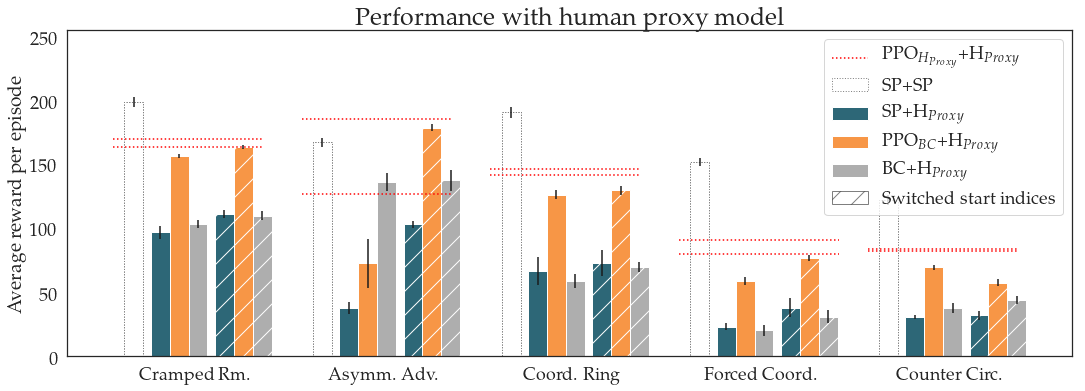

PBT+PBT [216.9, 190.1, 173.8, 169.5, 140.1]
PBT+BC_0 [84.2, 56.6, 70.8, 13.8, 39.8]
PPO_BC_train+BC_test_0 [156.4, 72.6, 126.4, 58.9, 69.5]
BC_train+BC_test_0 [103.5, 136.5, 59.0, 20.5, 38.0]
PBT+BC_1 [113.6, 93.0, 79.9, 28.4, 32.6]
PPO_BC_train+BC_test_1 [163.9, 178.8, 129.8, 76.9, 57.6]
BC_train+BC_test_1 [110.0, 137.5, 70.0, 31.0, 44.0]


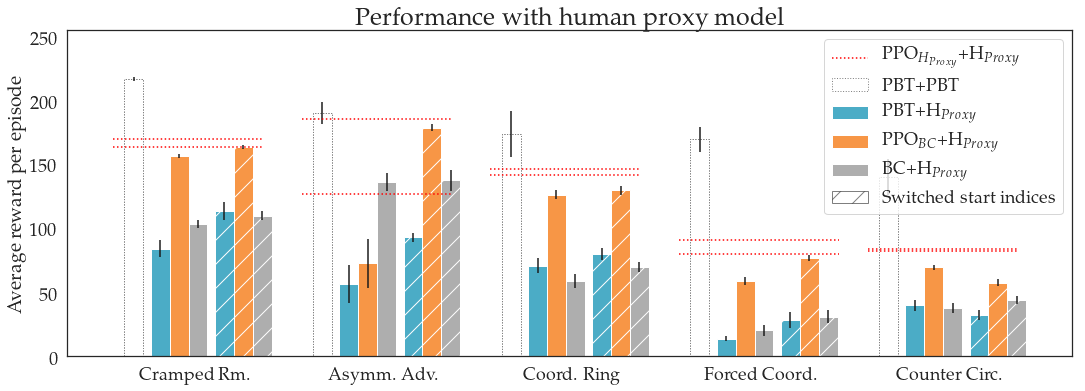

H+H [97.5, 158.33333333333334, 84.61538461538461, 94.0, 66.66666666666667]
ppo_sp_no_advers_0 [91.11111111111111, 115.0, 85.45454545454545, 18.181818181818183, 54.54545454545455]
pbt_no_advers_0 [100.0, 93.33333333333333, 91.11111111111111, 37.5, 31.11111111111111]
ppo_bc_no_advers_0 [137.77777777777777, 95.0, 126.66666666666667, 2.0, 62.5]
ppo_sp_no_advers_1 [97.14285714285714, 151.42857142857142, 82.85714285714286, 75.55555555555556, 46.666666666666664]
pbt_no_advers_1 [103.33333333333333, 156.66666666666666, 105.71428571428571, 17.77777777777778, 36.0]
ppo_bc_no_advers_1 [168.0, 180.0, 116.0, 76.66666666666667, 64.0]


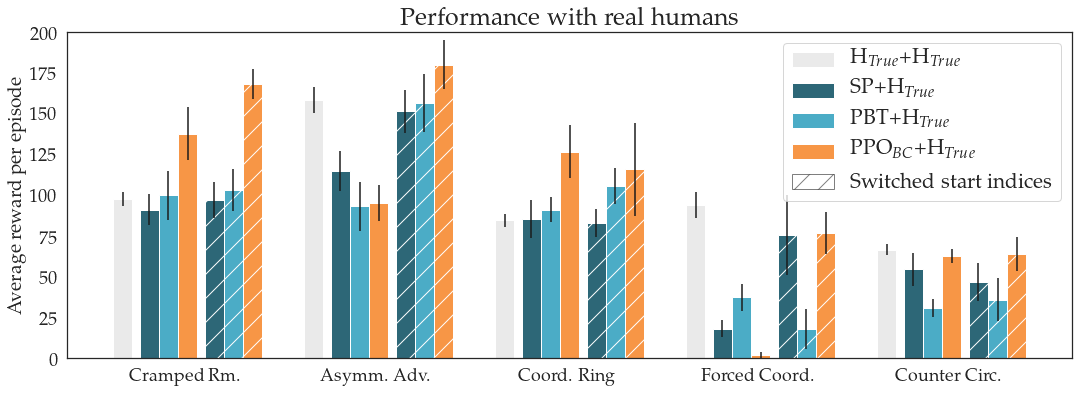

H+H [97.5, 158.33333333333334, 84.61538461538461, 94.0, 66.66666666666667]
ppo_sp_base_0 [76.36363636363636, 115.0, 85.45454545454545, 18.181818181818183, 54.54545454545455]
pbt_base_0 [80.0, 93.33333333333333, 91.11111111111111, 33.333333333333336, 31.11111111111111]
ppo_bc_base_0 [128.0, 84.44444444444444, 106.66666666666667, 2.0, 56.0]
ppo_sp_base_1 [77.77777777777777, 132.5, 66.66666666666667, 75.55555555555556, 46.666666666666664]
pbt_base_1 [91.42857142857143, 134.28571428571428, 97.5, 17.77777777777778, 28.571428571428573]
ppo_bc_base_1 [156.66666666666666, 150.0, 106.66666666666667, 76.66666666666667, 53.333333333333336]


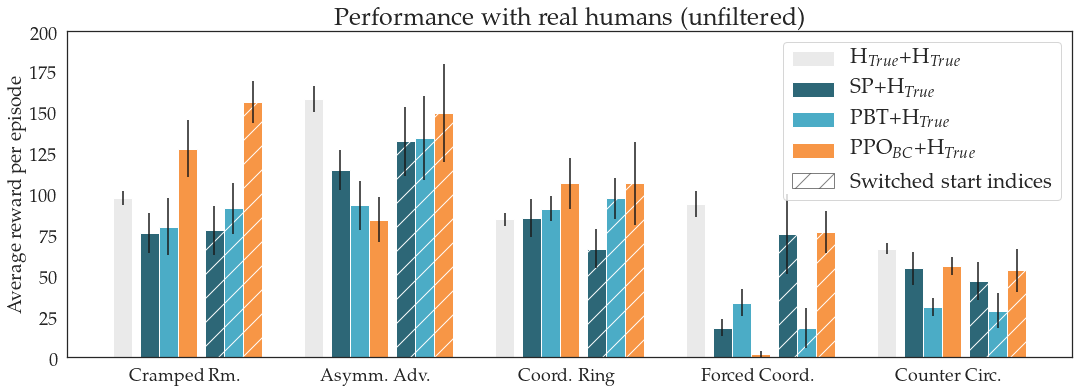

In [160]:
for hist_type, hist_algo_list in histogram_algos_5_layout.items():
    hist_algos, h_line_algo = hist_algo_list
    set_style()

    fig, ax0 = plt.subplots(1, figsize=(18,6))#figsize=(20,6))
    
    if hist_type not in ['humanai', 'humanai_base']:
        plt.rc('legend', fontsize=18)
        plt.rc('axes', titlesize=25)
    else:
        plt.rc('legend', fontsize=21)
        plt.rc('axes', titlesize=25)
    ax0.tick_params(axis='x', labelsize=18.5)
    ax0.tick_params(axis='y', labelsize=18.5)

    if hist_type != "cp":
        N = 5
    else:
        N = 3
        
    ind = np.arange(N)
    width = 0.1
    if hist_type not in ['humanai', 'humanai_base']:
        deltas = [-2.9, -1.5, -0.5, 0.5, 1.9, 2.9, 3.9]
    else:
        deltas = [-2.9, -1.5, -0.5, 0.5, 1.9, 2.9, 3.9]#[-1, 0, 1, 2, 2.5, 3]

    for i in range(len(hist_algos)):
        delta, algo = deltas[i], hist_algos[i]
        color, hatch, alpha = get_algorithm_color(algo), get_texture(algo), get_alpha(algo)
        offset = ind + delta * width
        
        if algo == "PPO+BC_test":
            continue
        
        print(algo, mean_by_algo[algo])
        if algo in ["PPO_SP+PPO_SP", "PBT+PBT", "CP+CP"]:
            ax0.bar(offset, mean_by_algo[algo], width, color='none', edgecolor='gray', lw=1., zorder = 0, linestyle=':')
            ax0.bar(offset, mean_by_algo[algo], width, label=algos_to_name[algo], hatch="", yerr=std_by_algo[algo], color='none', edgecolor='gray', linestyle=':')
        else:
            ax0.bar(offset, mean_by_algo[algo], width, label=algos_to_name[algo], yerr=std_by_algo[algo], color=color, hatch=hatch, alpha=alpha)

    if h_line_algo is not None:
        for h_line in h_line_algo:
            ax0.hlines(final_data['simple'][h_line][0], xmin=-0.4, xmax=0.4, colors="red", label=algos_to_name[h_line], linestyle=':')
            ax0.hlines(final_data['unident_s'][h_line][0], xmin=0.6, xmax=1.4, colors="red", linestyle=':')
            ax0.hlines(final_data['random1'][h_line][0], xmin=1.6, xmax=2.4, colors="red", linestyle=':')
            ax0.hlines(final_data['random0'][h_line][0], xmin=2.6, xmax=3.45, colors="red", linestyle=':')
            ax0.hlines(final_data['random3'][h_line][0], xmin=3.6, xmax=4.4, colors="red", linestyle=':')

    ax0.set_ylabel('Average reward per episode')
    ax0.set_title(graph_title(hist_type))

    ax0.set_xticks(ind + width / 3)
    ax0.set_xticklabels(('Cramped Rm.', 'Asymm. Adv.', 'Coord. Ring', 'Forced Coord.', 'Counter Circ.'))
    
    ax0.tick_params(axis='x', labelsize=18)

    if hist_type not in ['humanai', 'humanai_base']:
        handles, labels = ax0.get_legend_handles_labels()
        handles = switch_indices(0, 1, handles)
        labels = switch_indices(0, 1, labels)
        ax0.legend(handles, labels)
        
    # where some data has already been plotted to ax
    handles, labels = ax0.get_legend_handles_labels()

    # manually define a new patch 
    patch = Patch(facecolor='white', edgecolor='black', hatch='/', alpha=0.5, label='Switched start indices')

    # handles is a list, so append manual patch
    handles.append(patch) 

    # plot the legend
    ax0.legend(handles=handles, loc='best')

    ax0.set_ylim(0, y_lim(hist_type))

    plt.savefig("data/images/" + hist_type + "_experiments.eps", format='eps', bbox_inches='tight')
    plt.show()

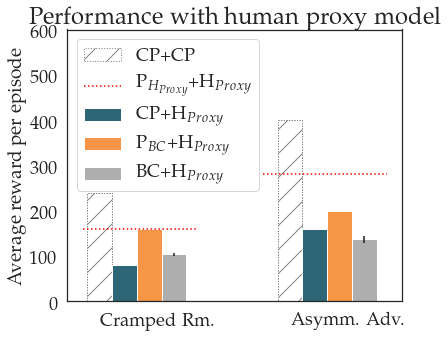

In [44]:
for hist_type, hist_algo_list in histogram_algos_2_layout.items():
    hist_algos, h_line_algo = hist_algo_list
    set_style()

    fig, ax0 = plt.subplots(1, figsize=(6,5))#figsize=(20,6))

    N = 2

    plt.rc('legend', fontsize=18.5)
    plt.rc('axes', titlesize=24)
    ax0.tick_params(axis='x', labelsize=18.5)
    ax0.tick_params(axis='y', labelsize=18.5)
        
    ind = np.arange(N)
    width = 0.13
    deltas = [-2, -1, 0, 1, 2, 3]

    for i in range(len(hist_algos)):
        delta, algo = deltas[i], hist_algos[i]
        color, hatch, alpha = get_algorithm_color(algo), get_texture(algo), get_alpha(algo)
        offset = ind + delta * width
        
        if algo == "PPO+BC_test":
            continue
        
        if algo in ["PPO_SP+PPO_SP", "PBT+PBT", "CP+CP"]:
            ax0.bar(offset, mean_by_algo[algo][:N], width, color='none', edgecolor='gray', lw=1., zorder = 0, linestyle=':')
            ax0.bar(offset, mean_by_algo[algo][:N], width, label=algos_to_name[algo], hatch="/", yerr=std_by_algo[algo][:N], color='none', edgecolor='gray', linestyle=':')
        else:
            ax0.bar(offset, mean_by_algo[algo][:N], width, label=algos_to_name[algo], yerr=std_by_algo[algo][:N], color=color, hatch=hatch, alpha=alpha)

    
    ax0.hlines(final_data['simple'][h_line_algo][0], xmin=-0.35, xmax=0.25, colors="red", label=algos_to_name[h_line_algo], linestyle=':')
    ax0.hlines(final_data['unident_s'][h_line_algo][0], xmin=0.6, xmax=1.25, colors="red", linestyle=':')
#     ax0.hlines(final_data['random1'][h_line_algo][0], xmin=1.6, xmax=2.25, colors="red", linestyle=':')

    ax0.set_ylabel('Average reward per episode')
    ax0.set_title('Performance with human proxy model')

    ax0.set_xticks(ind + width / 3)
    ax0.set_xticklabels(('Cramped Rm.', 'Asymm. Adv.', 'Coord. Ring', 'Forced Coord.', 'Counter Circ.'))
    ax0.legend(loc='best')

    handles, labels = ax0.get_legend_handles_labels()
    handles = switch_indices(0, 1, handles)
    labels = switch_indices(0, 1, labels)
    ax0.legend(handles, labels)

    ax0.set_ylim(0, y_lim(hist_type))

    plt.savefig("data/images/planning_experiments.eps", format='eps', bbox_inches='tight')
    plt.show()

# Off distribution loss

In [19]:
from human_aware_rl.experiments.losses_experiments import *

In [20]:
hh_losses_data = defaultdict(lambda: defaultdict(lambda: defaultdict(list))) #

In [21]:
layouts = ['simple', 'unident_s', 'random1', 'random0', 'random3']

In [63]:
for layout in layouts:
    data_path = "data/human/filtered_humanai_trials.pkl"
    trajs = get_trajs_from_data(data_path, [layout], ordered_trajs=True, human_ai_trajs=True)
    print("BC MODELS")
    bc_evaluation = evaluate_layout_loss_for_bc_models(best_bc_model_paths, layout, trajs, eps=1e-3)
    print("PPO_SP")
    ppo_sp_path = ppo_sp_model_paths[layout]
    ppo_sp_evaluation = evaluate_layout_loss_for_ppo_models(ppo_sp_path, layout, trajs, eps=1e-3, seeds=ppo_sp_seeds)
    print("PBT")
    pbt_evaluation = evaluate_layout_loss_for_pbt_models(pbt_model_paths, layout, trajs, eps=1e-3, seeds=pbt_seeds)
    
    # Put in right format
    for model_name, seed_dict in pbt_evaluation.items():
        hh_losses_data[layout]['PBT']['loss'].append(np.mean(seed_dict['losses']))
        hh_losses_data[layout]['PBT']['acc'].append(np.mean(seed_dict['accuracies']))
    for model_name, seed_dict in ppo_sp_evaluation.items():
        hh_losses_data[layout]['PPO_SP']['loss'].append(np.mean(seed_dict['losses']))
        hh_losses_data[layout]['PPO_SP']['acc'].append(np.mean(seed_dict['accuracies']))
    hh_losses_data[layout]['BC_Train']['loss'] = np.mean(bc_evaluation['train']['losses'])
    hh_losses_data[layout]['BC_Train']['acc'] = np.mean(bc_evaluation['train']['accuracies'])
    hh_losses_data[layout]['BC_Test']['loss'] = np.mean(bc_evaluation['test']['losses'])
    hh_losses_data[layout]['BC_Test']['acc'] = np.mean(bc_evaluation['test']['accuracies'])

Loading data from data/human/clean_humanai_trials.pkl
Layout simple is missing from worker A2P065E9CYMYJL:3PM8NZGV8YG6F14LVG1DX1GEGLSQXA
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/simple_am.pkl
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/simple_am.pkl
Layout simple is missing from worker A5TI9UQEPLNWI:3YGXWBAF70HBNY6S6NYDGLUZJBX4CF
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/simple_am.pkl
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/simple_am.pkl
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/simple_am.pkl
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHA


  0%|          | 0/44 [00:00<?, ?it/s]

Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/simple_am.pkl


100%|██████████| 44/44 [00:10<00:00,  4.46it/s]


PPO_SP
INFO:tensorflow:Restoring parameters from data/ppo_runs/ppo_sp_simple/seed2229/best/variables/variables


100%|██████████| 44/44 [00:33<00:00,  1.33it/s]


INFO:tensorflow:Restoring parameters from data/ppo_runs/ppo_sp_simple/seed7649/best/variables/variables


100%|██████████| 44/44 [00:34<00:00,  1.31it/s]


INFO:tensorflow:Restoring parameters from data/ppo_runs/ppo_sp_simple/seed7225/best/variables/variables


100%|██████████| 44/44 [00:33<00:00,  1.30it/s]


INFO:tensorflow:Restoring parameters from data/ppo_runs/ppo_sp_simple/seed9807/best/variables/variables


100%|██████████| 44/44 [00:33<00:00,  1.28it/s]


INFO:tensorflow:Restoring parameters from data/ppo_runs/ppo_sp_simple/seed386/best/variables/variables


100%|██████████| 44/44 [00:33<00:00,  1.30it/s]


PBT
INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_simple/seed_8015/agent0/best/variables/variables


100%|██████████| 44/44 [00:33<00:00,  1.29it/s]


INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_simple/seed_3554/agent0/best/variables/variables


100%|██████████| 44/44 [00:33<00:00,  1.30it/s]


INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_simple/seed_581/agent0/best/variables/variables


100%|██████████| 44/44 [00:37<00:00,  1.09s/it]


INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_simple/seed_5608/agent0/best/variables/variables


100%|██████████| 44/44 [00:43<00:00,  1.24it/s]


INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_simple/seed_4221/agent0/best/variables/variables


100%|██████████| 44/44 [00:36<00:00,  1.18it/s]


Loading data from data/human/clean_humanai_trials.pkl
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/unident_s_am.pkl
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/unident_s_am.pkl
Layout unident_s is missing from worker A17K1CHOI773VZ:3KB8R4ZV1E78P976NO4JEQLKRVVBGR
Layout unident_s is missing from worker A5TI9UQEPLNWI:3YGXWBAF70HBNY6S6NYDGLUZJBX4CF
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/unident_s_am.pkl
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/unident_s_am.pkl
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/unident_s_am.pkl
Loaded MediumLevelPlanner from /Users/micah/D


  0%|          | 0/43 [00:00<?, ?it/s]

Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/unident_s_am.pkl


100%|██████████| 43/43 [00:11<00:00,  3.68it/s]


PPO_SP
INFO:tensorflow:Restoring parameters from data/ppo_runs/ppo_sp_unident_s/seed2229/best/variables/variables


100%|██████████| 43/43 [01:07<00:00,  1.61s/it]


INFO:tensorflow:Restoring parameters from data/ppo_runs/ppo_sp_unident_s/seed7649/best/variables/variables


100%|██████████| 43/43 [01:04<00:00,  1.54s/it]


INFO:tensorflow:Restoring parameters from data/ppo_runs/ppo_sp_unident_s/seed7225/best/variables/variables


100%|██████████| 43/43 [01:02<00:00,  1.46s/it]


INFO:tensorflow:Restoring parameters from data/ppo_runs/ppo_sp_unident_s/seed9807/best/variables/variables


100%|██████████| 43/43 [01:10<00:00,  1.80s/it]


INFO:tensorflow:Restoring parameters from data/ppo_runs/ppo_sp_unident_s/seed386/best/variables/variables


100%|██████████| 43/43 [01:16<00:00,  1.67s/it]


PBT
INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_unident_s/seed_8015/agent0/best/variables/variables


100%|██████████| 43/43 [01:08<00:00,  1.55s/it]


INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_unident_s/seed_3554/agent0/best/variables/variables


100%|██████████| 43/43 [01:01<00:00,  1.43s/it]


INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_unident_s/seed_581/agent0/best/variables/variables


100%|██████████| 43/43 [01:01<00:00,  1.45s/it]


INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_unident_s/seed_5608/agent0/best/variables/variables


100%|██████████| 43/43 [01:01<00:00,  1.43s/it]


INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_unident_s/seed_4221/agent0/best/variables/variables


100%|██████████| 43/43 [01:01<00:00,  1.44s/it]


Loading data from data/human/clean_humanai_trials.pkl
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random1_am.pkl
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random1_am.pkl
Layout random1 is missing from worker A17K1CHOI773VZ:3KB8R4ZV1E78P976NO4JEQLKRVVBGR
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random1_am.pkl
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random1_am.pkl
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random1_am.pkl
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random1_am.pk


  0%|          | 0/45 [00:00<?, ?it/s]

Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random1_am.pkl


100%|██████████| 45/45 [00:10<00:00,  4.50it/s]


PPO_SP
INFO:tensorflow:Restoring parameters from data/ppo_runs/ppo_sp_random1/seed2229/best/variables/variables


100%|██████████| 45/45 [00:38<00:00,  1.16it/s]


INFO:tensorflow:Restoring parameters from data/ppo_runs/ppo_sp_random1/seed7649/best/variables/variables


100%|██████████| 45/45 [00:39<00:00,  1.13it/s]


INFO:tensorflow:Restoring parameters from data/ppo_runs/ppo_sp_random1/seed7225/best/variables/variables


100%|██████████| 45/45 [00:39<00:00,  1.16it/s]


INFO:tensorflow:Restoring parameters from data/ppo_runs/ppo_sp_random1/seed9807/best/variables/variables


100%|██████████| 45/45 [00:40<00:00,  1.16it/s]


INFO:tensorflow:Restoring parameters from data/ppo_runs/ppo_sp_random1/seed386/best/variables/variables


100%|██████████| 45/45 [00:39<00:00,  1.12it/s]


PBT
INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_random1/seed_8015/agent0/best/variables/variables


100%|██████████| 45/45 [00:39<00:00,  1.15it/s]


INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_random1/seed_3554/agent0/best/variables/variables


100%|██████████| 45/45 [00:44<00:00,  1.04it/s]


INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_random1/seed_581/agent0/best/variables/variables


100%|██████████| 45/45 [00:49<00:00,  1.14s/it]


INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_random1/seed_5608/agent0/best/variables/variables


100%|██████████| 45/45 [00:45<00:00,  1.15it/s]


INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_random1/seed_4221/agent0/best/variables/variables


100%|██████████| 45/45 [00:47<00:00,  1.11it/s]


Loading data from data/human/clean_humanai_trials.pkl
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random0_am.pkl
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random0_am.pkl
Layout random0 is missing from worker A17K1CHOI773VZ:3KB8R4ZV1E78P976NO4JEQLKRVVBGR
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random0_am.pkl
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random0_am.pkl
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random0_am.pkl
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random0_am.pk


  0%|          | 0/53 [00:00<?, ?it/s]

Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random0_am.pkl


100%|██████████| 53/53 [00:13<00:00,  4.44it/s]


PPO_SP
INFO:tensorflow:Restoring parameters from data/ppo_runs/ppo_sp_random0/seed2229/best/variables/variables


100%|██████████| 53/53 [00:57<00:00,  1.02s/it]


INFO:tensorflow:Restoring parameters from data/ppo_runs/ppo_sp_random0/seed7649/best/variables/variables


100%|██████████| 53/53 [00:55<00:00,  1.06it/s]


INFO:tensorflow:Restoring parameters from data/ppo_runs/ppo_sp_random0/seed7225/best/variables/variables


100%|██████████| 53/53 [00:46<00:00,  1.11it/s]


INFO:tensorflow:Restoring parameters from data/ppo_runs/ppo_sp_random0/seed9807/best/variables/variables


100%|██████████| 53/53 [00:47<00:00,  1.12it/s]


INFO:tensorflow:Restoring parameters from data/ppo_runs/ppo_sp_random0/seed386/best/variables/variables


100%|██████████| 53/53 [00:45<00:00,  1.08it/s]


PBT
INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_random0/seed_8015/agent0/best/variables/variables


100%|██████████| 53/53 [00:55<00:00,  1.03s/it]


INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_random0/seed_3554/agent0/best/variables/variables


100%|██████████| 53/53 [00:48<00:00,  1.06it/s]


INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_random0/seed_581/agent0/best/variables/variables


100%|██████████| 53/53 [00:51<00:00,  1.04s/it]


INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_random0/seed_5608/agent0/best/variables/variables


100%|██████████| 53/53 [01:02<00:00,  1.06s/it]


INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_random0/seed_4221/agent0/best/variables/variables


100%|██████████| 53/53 [01:02<00:00,  1.08s/it]


Loading data from data/human/clean_humanai_trials.pkl
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random3_am.pkl
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random3_am.pkl
Layout random3 is missing from worker A17K1CHOI773VZ:3KB8R4ZV1E78P976NO4JEQLKRVVBGR
Layout random3 is missing from worker A5TI9UQEPLNWI:3YGXWBAF70HBNY6S6NYDGLUZJBX4CF
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random3_am.pkl
Layout random3 is missing from worker A2H5UA2MUBT4QX:3QFUFYSY9YFIQAQ2XPOEORF2GOP4FQ
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random3_am.pkl
Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data


  0%|          | 0/47 [00:00<?, ?it/s]

Loaded MediumLevelPlanner from /Users/micah/Developer/Research/CHAI/hr_coordination/overcooked_ai/overcooked_ai_py/data/planners/random3_am.pkl


100%|██████████| 47/47 [00:13<00:00,  3.04it/s]


PPO_SP
INFO:tensorflow:Restoring parameters from data/ppo_runs/ppo_sp_random3/seed2229/best/variables/variables


100%|██████████| 47/47 [01:11<00:00,  1.59s/it]


INFO:tensorflow:Restoring parameters from data/ppo_runs/ppo_sp_random3/seed7649/best/variables/variables


100%|██████████| 47/47 [01:09<00:00,  1.40s/it]


INFO:tensorflow:Restoring parameters from data/ppo_runs/ppo_sp_random3/seed7225/best/variables/variables


100%|██████████| 47/47 [01:13<00:00,  1.62s/it]


INFO:tensorflow:Restoring parameters from data/ppo_runs/ppo_sp_random3/seed9807/best/variables/variables


100%|██████████| 47/47 [01:15<00:00,  1.44s/it]


INFO:tensorflow:Restoring parameters from data/ppo_runs/ppo_sp_random3/seed386/best/variables/variables


100%|██████████| 47/47 [01:11<00:00,  1.61s/it]


PBT
INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_random3/seed_8015/agent0/best/variables/variables


100%|██████████| 47/47 [01:09<00:00,  1.44s/it]


INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_random3/seed_3554/agent0/best/variables/variables


100%|██████████| 47/47 [01:14<00:00,  1.52s/it]


INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_random3/seed_581/agent0/best/variables/variables


100%|██████████| 47/47 [01:03<00:00,  1.28s/it]


INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_random3/seed_5608/agent0/best/variables/variables


100%|██████████| 47/47 [01:02<00:00,  1.31s/it]


INFO:tensorflow:Restoring parameters from data/pbt_runs/pbt_random3/seed_4221/agent0/best/variables/variables


100%|██████████| 47/47 [01:18<00:00,  2.09s/it]


In [67]:
hh_losses_data

{'simple': {'PBT': {'loss': [3.092122113260605,
    3.635533617150513,
    5.175039284640436,
    5.23812689968643,
    5.3233699964362025],
   'acc': [0.18590314521205878,
    0.1755767622476829,
    0.176615192032372,
    0.18653311375775178,
    0.16782943847997667]},
  'PPO_SP': {'loss': [4.338686316840526,
    2.086303700878783,
    2.4412814365583904,
    4.379322852564331,
    4.791108479323646],
   'acc': [0.16639048728770234,
    0.28234988877843875,
    0.27909006453571583,
    0.17519665188853667,
    0.16288625234724677]},
  'BC_Train': {'loss': 1.144024370231537, 'acc': 0.627519986681615},
  'BC_Test': {'loss': 1.1166421544410519, 'acc': 0.6207940547061904}},
 'unident_s': {'PBT': {'loss': [4.729602513100345,
    4.8248984856970125,
    4.898555237258628,
    4.937485807120901,
    4.739306825199411],
   'acc': [0.19008993758433892,
    0.17938810773607125,
    0.19439099253354017,
    0.14563971243662885,
    0.18610892201929038]},
  'PPO_SP': {'loss': [4.053347943275864,

In [66]:
for k, v in hh_losses_data.items():
    hh_losses_data[k] = dict(v)
    for kk, vv in v.items():
        hh_losses_data[k][kk] = dict(vv)
hh_losses_data = dict(hh_losses_data)

In [69]:
save_pickle(hh_losses_data, "data/human/anonymized/hh_losses_data")

In [23]:
hh_losses_data = load_pickle("data/human/anonymized/hh_losses_data")

In [24]:
hh_losses_data

{'simple': {'PBT': {'loss': [3.092122113260605,
    3.635533617150513,
    5.175039284640436,
    5.23812689968643,
    5.3233699964362025],
   'acc': [0.18590314521205878,
    0.1755767622476829,
    0.176615192032372,
    0.18653311375775178,
    0.16782943847997667]},
  'PPO_SP': {'loss': [4.338686316840526,
    2.086303700878783,
    2.4412814365583904,
    4.379322852564331,
    4.791108479323646],
   'acc': [0.16639048728770234,
    0.28234988877843875,
    0.27909006453571583,
    0.17519665188853667,
    0.16288625234724677]},
  'BC_Train': {'loss': 1.144024370231537, 'acc': 0.627519986681615},
  'BC_Test': {'loss': 1.1166421544410519, 'acc': 0.6207940547061904}},
 'unident_s': {'PBT': {'loss': [4.729602513100345,
    4.8248984856970125,
    4.898555237258628,
    4.937485807120901,
    4.739306825199411],
   'acc': [0.19008993758433892,
    0.17938810773607125,
    0.19439099253354017,
    0.14563971243662885,
    0.18610892201929038]},
  'PPO_SP': {'loss': [4.053347943275864,

In [25]:
final_human_loss_data = defaultdict(lambda: defaultdict(dict))
final_human_accuracy_data = defaultdict(lambda: defaultdict(dict))

In [26]:
for layout, layout_data in hh_losses_data.items():
    for algo_name, algo_data in layout_data.items():
        if type(algo_data['loss']) is list:
            final_human_loss_data[layout][algo_name] = (
                np.mean(algo_data['loss']), 
                np.std(algo_data['loss']) / np.sqrt(len(algo_data['loss']))
            )
            final_human_accuracy_data[layout][algo_name] = (
                np.mean(algo_data['acc']), 
                np.std(algo_data['acc']) / np.sqrt(len(algo_data['acc']))
            )
        else:
            final_human_loss_data[layout][algo_name] = (np.mean(algo_data['loss']), 0)
            final_human_accuracy_data[layout][algo_name] = (np.mean(algo_data['acc']), 0)

In [27]:
final_human_loss_data, final_human_accuracy_data

(defaultdict(<function __main__.<lambda>()>,
             {'simple': defaultdict(dict,
                          {'PBT': (4.4928383822348374, 0.4198863338610349),
                           'PPO_SP': (3.607340557233136, 0.4982118733658647),
                           'BC_Train': (1.144024370231537, 0),
                           'BC_Test': (1.1166421544410519, 0)}),
              'unident_s': defaultdict(dict,
                          {'PBT': (4.82596977367526, 0.037149825542651116),
                           'PPO_SP': (3.7860146561129113, 0.2934731818532773),
                           'BC_Train': (1.1163189204092394, 0),
                           'BC_Test': (1.1759090168323687, 0)}),
              'random1': defaultdict(dict,
                          {'PBT': (3.93308374839608, 0.266572594065601),
                           'PPO_SP': (4.116262912241701, 0.19036528710468886),
                           'BC_Train': (1.3852539426214714, 0),
                           'BC_Test': (1.39

In [28]:
def get_texture(alg):
    if alg == 'PBT+PBT':
        return '/'
    elif alg == 'CP+CP':
        return '/'
    else:
        return ''
    
def get_alpha(alg):
    if alg == "avg_bc_test+bc_train":
        return 0.3
    else:
        return 1

def switch_indices(idx0, idx1, lst):
    lst = list(lst)
    lst[idx1], lst[idx0] = lst[idx0], lst[idx1]
    return lst

def means_and_stds_by_algo(full_data):
    mean_by_algo = defaultdict(list)
    std_by_algo = defaultdict(list)
    for layout, layout_algo_dict in full_data.items():
        for k in layout_algo_dict.keys():
            if type(layout_algo_dict[k]) is list or type(layout_algo_dict[k]) is tuple:
                mean, std = layout_algo_dict[k]
            else:
                mean, std = layout_algo_dict[k], 0
            mean_by_algo[k].append(mean)
            std_by_algo[k].append(std)
    return mean_by_algo, std_by_algo

def y_lim(hist_type):
    if hist_type == "cp":
        return 500
    return 280

In [29]:
def algos_to_name(algo_name):
    if algo_name == "PPO_SP":
        return "SP"
    elif algo_name == "BC_Train":
        return "BC"
    elif algo_name == "BC_Test":
        return "H$_{Proxy}$"
    display_name = "".join(algo_name.split("_"))
    return display_name

def get_algorithm_color_losses(alg):
    opt_baseline_col = "#eaeaea"
    ours_col = '#fcd5b5'# orange #'#f79646'
    ours_other_col = "#F79646"
    other_col = '#4BACC6' # thiel
    other_other_col = "#2d6777"
    human_baseline_col = "#aeaeae"#"#c1c1c1"
    if alg == 'PBT':
        return other_col#opt_baseline_col
    elif alg == 'PPO_SP':
        return other_other_col #'#35ce47'#'#0000cc'
    elif alg == 'BC_Train':
        return ours_other_col #"#3884c9"
    elif alg == 'BC_Test':
        return ours_col #'#35ce47'#'#00cc00'
    else:
        raise ValueError(alg, "not recognized")
        
def get_texture_losses(alg):
#     if alg == 'PPO_SP':
#         return '/'
#     elif alg == 'BC_Test':
#         return '/'
#     else:
    return ''

mean_by_algo_loss, std_by_algo_loss = means_and_stds_by_algo(final_human_loss_data)
mean_by_algo_acc, std_by_algo_acc = means_and_stds_by_algo(final_human_accuracy_data)

In [30]:
final_human_loss_data, mean_by_algo_loss

(defaultdict(<function __main__.<lambda>()>,
             {'simple': defaultdict(dict,
                          {'PBT': (4.4928383822348374, 0.4198863338610349),
                           'PPO_SP': (3.607340557233136, 0.4982118733658647),
                           'BC_Train': (1.144024370231537, 0),
                           'BC_Test': (1.1166421544410519, 0)}),
              'unident_s': defaultdict(dict,
                          {'PBT': (4.82596977367526, 0.037149825542651116),
                           'PPO_SP': (3.7860146561129113, 0.2934731818532773),
                           'BC_Train': (1.1163189204092394, 0),
                           'BC_Test': (1.1759090168323687, 0)}),
              'random1': defaultdict(dict,
                          {'PBT': (3.93308374839608, 0.266572594065601),
                           'PPO_SP': (4.116262912241701, 0.19036528710468886),
                           'BC_Train': (1.3852539426214714, 0),
                           'BC_Test': (1.39

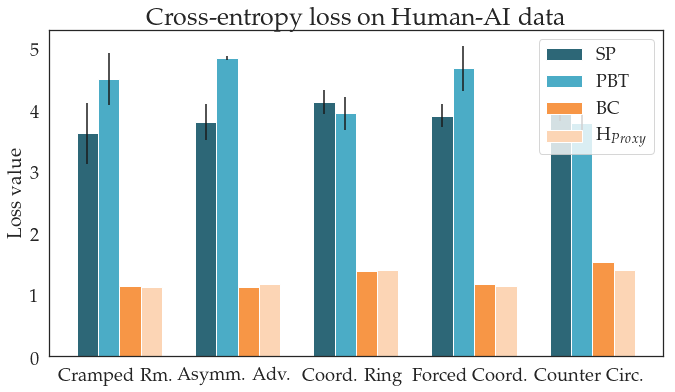

In [32]:
human_loss_algos = [a for a in list(mean_by_algo_loss.keys()) if a != "PPO_BC"]
human_loss_algos = ['PPO_SP', 'PBT', 'BC_Train', 'BC_Test']

set_style()

fig, ax0 = plt.subplots(1, figsize=(11,6))#figsize=(20,6))

plt.rc('legend', fontsize=18)
plt.rc('axes', titlesize=25)
ax0.tick_params(axis='x', labelsize=18.5)
ax0.tick_params(axis='y', labelsize=18.5)

N = 5
ind = np.arange(N)
width = 0.18

deltas_drl_pbt = [-1, 0, 1, 2]

for i in range(len(human_loss_algos)):
    delta, algo = deltas_drl_pbt[i], human_loss_algos[i]
    color, hatch, alpha = get_algorithm_color_losses(algo), get_texture_losses(algo), get_alpha(algo)
    offset = ind + delta * width
    ax0.bar(offset, mean_by_algo_loss[algo], width, label=algos_to_name(algo), yerr=std_by_algo_loss[algo], color=color, hatch=hatch, alpha=alpha)

ax0.set_ylabel('Loss value')
ax0.set_title('Cross-entropy loss on Human-AI data')

ax0.set_xticks(ind + width / 3)
ax0.set_xticklabels(('Cramped Rm.', 'Asymm. Adv.', 'Coord. Ring', 'Forced Coord.', 'Counter Circ.'))
ax0.legend(loc='best')

# ax0.set_ylim(0, 3)

# handles, labels = ax0.get_legend_handles_labels()
# handles = switch_indices(0, 1, handles)
# labels = switch_indices(0, 1, labels)
# ax0.legend(handles, labels)
# ax1.xaxis.set_ticks(np.arange(start, end, stepsize))
plt.savefig("data/images/hai_losses.eps", format='eps', bbox_inches='tight')
plt.show()

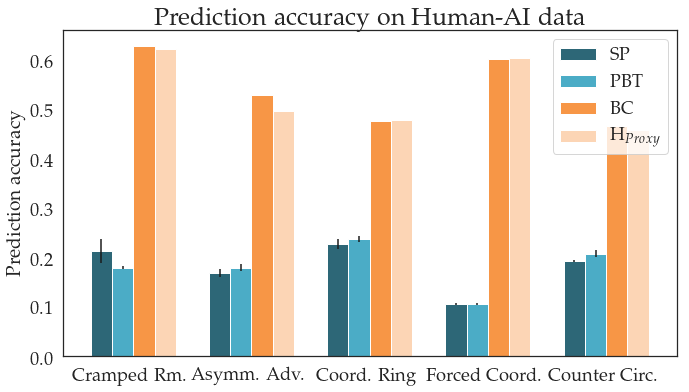

In [33]:
human_acc_algos = [a for a in list(mean_by_algo_acc.keys()) if a != "PPO_BC"]
human_acc_algos = ['PPO_SP', 'PBT', 'BC_Train', 'BC_Test']

set_style()

fig, ax0 = plt.subplots(1, figsize=(11,6))#figsize=(20,6))


plt.rc('legend', fontsize=18)
plt.rc('axes', titlesize=25)
ax0.tick_params(axis='x', labelsize=18.5)
ax0.tick_params(axis='y', labelsize=18.5)


N = 5
ind = np.arange(N)
width = 0.18

deltas_drl_pbt = [-1, 0, 1, 2]

for i in range(len(human_acc_algos)):
    delta, algo = deltas_drl_pbt[i], human_acc_algos[i]
    color, hatch, alpha = get_algorithm_color_losses(algo), get_texture_losses(algo), get_alpha(algo)
    offset = ind + delta * width
    ax0.bar(offset, mean_by_algo_acc[algo], width, label=algos_to_name(algo), yerr=std_by_algo_acc[algo], color=color, hatch=hatch, alpha=alpha)

ax0.set_ylabel('Prediction accuracy')
ax0.set_title('Prediction accuracy on Human-AI data')

ax0.set_xticks(ind + width / 3)
ax0.set_xticklabels(('Cramped Rm.', 'Asymm. Adv.', 'Coord. Ring', 'Forced Coord.', 'Counter Circ.'))
ax0.legend(loc='best')

# ax0.set_ylim(0, 3)

# handles, labels = ax0.get_legend_handles_labels()
# handles = switch_indices(0, 1, handles)
# labels = switch_indices(0, 1, labels)
# ax0.legend(handles, labels)
# ax1.xaxis.set_ticks(np.arange(start, end, stepsize))
plt.savefig("data/images/hai_accuracies.eps", format='eps', bbox_inches='tight')
plt.show()